Part 1: Descriptive analysis

Load libraries

In [1]:
library(tidyverse) # data manipulation
library(dplyr) # data manipulation
library(ggplot2) # data visualization
library(ggjoy) # data visualization: joy plots
library(visdat) # data visualization: missing values
library(GGally) # data visualization: pairwise plots

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggjoy' was built under R version 3.6.3"Loading required package: ggridges
Warning message:
"package 'ggridges' was built under R version 3.6.3"The ggjoy package has been deprecated. Please switch over to the
ggridges package, which provides the same functionality. Porting
guidelines can be found

Import data

In [2]:
book_1 <- read.csv('Book1.csv', stringsAsFactors = FALSE)
book_2 <- read.csv('Book2.csv', stringsAsFactors = FALSE)
book_3 <- read.csv('Book3.csv', stringsAsFactors = FALSE)
book_4 <- read.csv('Book4.csv', stringsAsFactors = FALSE)

In [3]:
dataset <- rbind(book_1, book_2, book_3, book_4)

In [4]:
head(dataset)

Date,Time,Northbound,Speed_N,Roadworks_N,Congestion_N,Incidents_N,Adverse_weather_N,Major_organized_events_N,Abnormal_loads_N,Southbound,Speed_S,Roadworks_S,Congestion_S,Incidents_S,Adverse_weather_S,Major_organized_events_S,Abnormal_loads_S
14/03/2022,07:00:00,J1J2,70,0,0,0,0,0,0,J2J1,39,0,0,0,0,0,0
14/03/2022,07:00:00,J2J4,70,0,0,0,0,0,0,J4J2,65,0,0,0,0,0,0
14/03/2022,07:00:00,J4J5,68,1,0,0,0,0,0,J5J4,51,0,0,0,0,0,0
14/03/2022,07:00:00,J5J6,70,0,0,0,0,0,0,J6J5,59,0,0,0,0,0,0
14/03/2022,07:00:00,J6J6A,69,0,0,0,0,0,0,J6AJ6,68,0,0,0,0,0,0
14/03/2022,07:00:00,J6AJ7,65,0,0,0,0,0,0,J7J6A,57,0,0,0,0,0,0


In [5]:
str(dataset)

'data.frame':	9911 obs. of  18 variables:
 $ Date                    : chr  "14/03/2022" "14/03/2022" "14/03/2022" "14/03/2022" ...
 $ Time                    : chr  "07:00:00" "07:00:00" "07:00:00" "07:00:00" ...
 $ Northbound              : chr  "J1J2" "J2J4" "J4J5" "J5J6" ...
 $ Speed_N                 : int  70 70 68 70 69 65 53 62 65 62 ...
 $ Roadworks_N             : int  0 0 1 0 0 0 0 0 0 0 ...
 $ Congestion_N            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Incidents_N             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Adverse_weather_N       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Major_organized_events_N: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Abnormal_loads_N        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Southbound              : chr  "J2J1" "J4J2" "J5J4" "J6J5" ...
 $ Speed_S                 : int  39 65 51 59 68 57 54 44 32 41 ...
 $ Roadworks_S             : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Congestion_S            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Incidents_S             : int  0 0 0 0 0 0 0 0 0 0 

**Handling missing data**

In [6]:
# most entries were left empty on Roadworks, Congestions, Incidents,  Adverse weather, Major organized events,
# abnormal loads when there is no event
sum(is.na(dataset)) 

[1] 81393

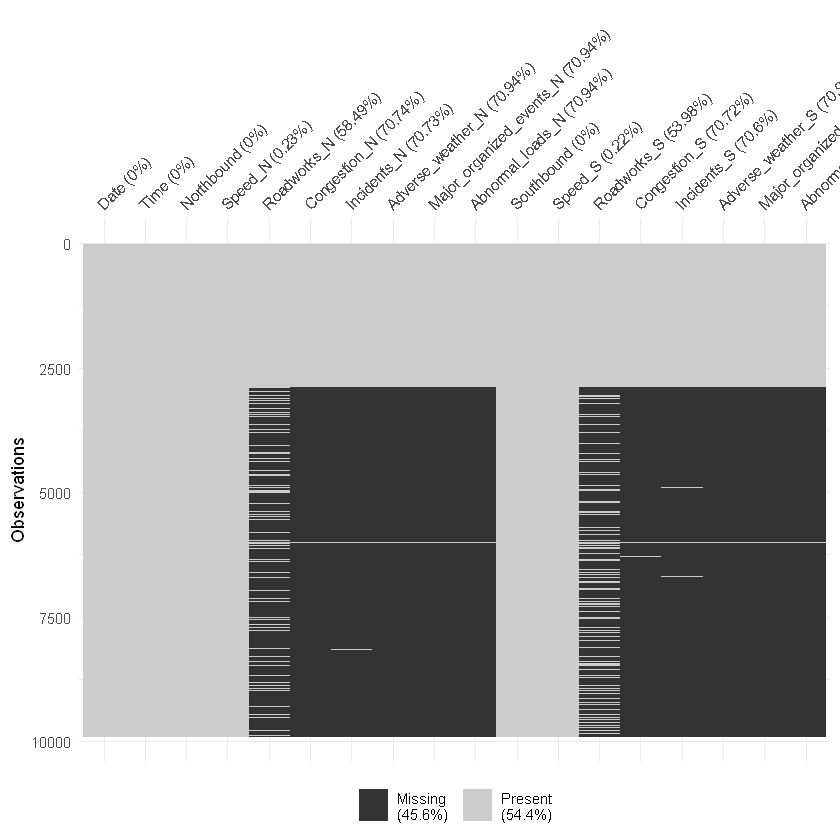

In [7]:
vis_miss(dataset)

In [622]:
dataset$Speed_N <- as.numeric(dataset$Speed_N)
dataset$Speed_S <- as.numeric(dataset$Speed_S)

In [623]:
median_Speed_N <- median(dataset$Speed_N, na.rm = TRUE)
median_Speed_N
median_Speed_S <- median(dataset$Speed_S, na.rm = TRUE)
median_Speed_S

[1] 66

[1] 66

In [624]:
# Replace NAs with the median
dataset$Speed_N <- ifelse(is.na(dataset$Speed_N) == TRUE, median_Speed_N, dataset$Speed_N)
dataset$Speed_S <- ifelse(is.na(dataset$Speed_S) == TRUE, median_Speed_S, dataset$Speed_S)

In [625]:
# recheck for NAs
sum(is.na(dataset$Speed_N))
sum(is.na(dataset$Speed_S))

[1] 0

[1] 0

In [626]:
# replace all other NAs to 0
dataset[is.na(dataset)] = 0

In [627]:
# reconfirm if there are still NAs
sum(is.na(dataset))

[1] 0

In [628]:
str(dataset)

'data.frame':	9911 obs. of  18 variables:
 $ Date                    : chr  "14/03/2022" "14/03/2022" "14/03/2022" "14/03/2022" ...
 $ Time                    : chr  "07:00:00" "07:00:00" "07:00:00" "07:00:00" ...
 $ Northbound              : chr  "J1J2" "J2J4" "J4J5" "J5J6" ...
 $ Speed_N                 : num  70 70 68 70 69 65 53 62 65 62 ...
 $ Roadworks_N             : num  0 0 1 0 0 0 0 0 0 0 ...
 $ Congestion_N            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Incidents_N             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Adverse_weather_N       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Major_organized_events_N: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Abnormal_loads_N        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Southbound              : chr  "J2J1" "J4J2" "J5J4" "J6J5" ...
 $ Speed_S                 : num  39 65 51 59 68 57 54 44 32 41 ...
 $ Roadworks_S             : num  0 0 0 0 0 0 1 0 0 0 ...
 $ Congestion_S            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Incidents_S             : num  0 0 0 0 0 0 0 0 0 0 

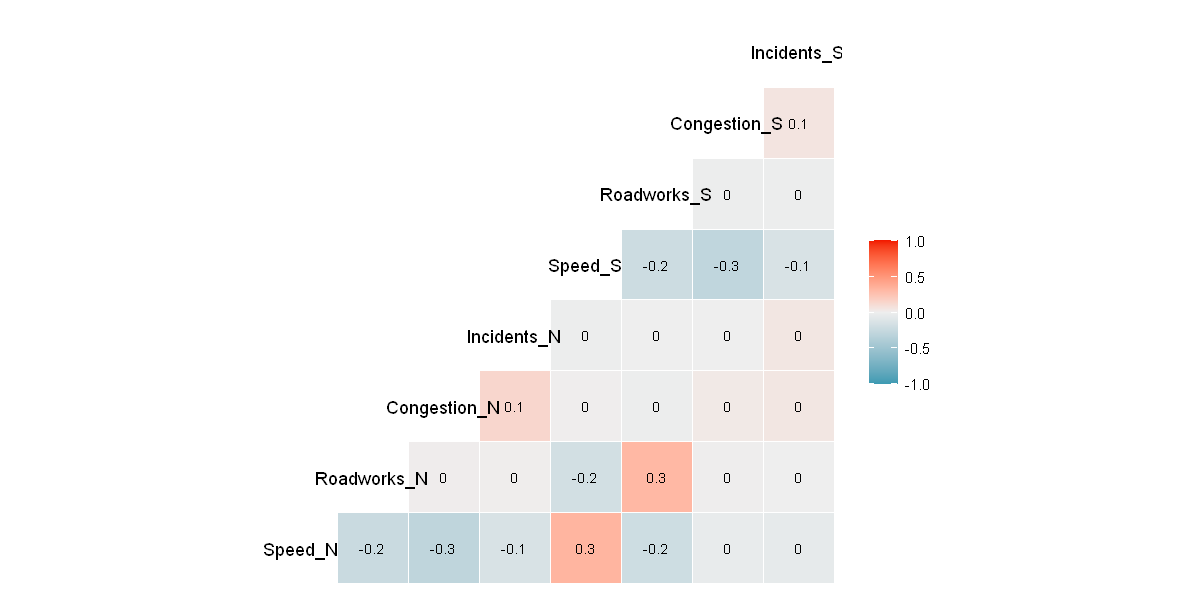

In [551]:
# get the correlation matrix before converting Roadworks, congestion etc to factors
dataset_matrix <- as.matrix(dataset[ , c('Speed_N','Roadworks_N', 'Congestion_N', 'Incidents_N', 'Speed_S','Roadworks_S', 
                                        'Congestion_S', 'Incidents_S')])
ggcorr(dataset_matrix, label = TRUE, label_size = 3)

**Feature engineering**

In [629]:
# format DateTime column as a Date object
dataset$DateTime <- as.character(paste(dataset$Date, dataset$Time, sep = ' '))
dataset$DateTime <- as.POSIXct(dataset$DateTime, format = "%d/%m/%Y %H:%M:%S")

In [630]:
# Create weekdays column
dataset$Day_of_the_week <- weekdays(as.Date(dataset$Date))

In [631]:
# creating column for whether a day is a weekday or weekend
weekday <- c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday')
weekend <- c('Saturday', 'Sunday')
dataset$Part_of_the_week <- ifelse(dataset$Day_of_the_week %in% weekday, 'Weekday', 'Weekend')

In [632]:
# creating column for holidays and observances
# https://www.timeanddate.com/holidays/uk/
holidays_obs <- c('17/03/2022', '18/03/2022', '20/03/2022', '27/03/2022', '03/04/2022', '10/04/2022')
dataset$Holidays_Obs <- ifelse(dataset$Date %in% holidays_obs, 'yes', 'no')

In [633]:
# creating time brackets from sampling technique
night <- c('22:00:00','22:30:00', '23:00:00', '23:30:00')
lateevening <- c('19:00:00', '19:30:00', '20:00:00', '20:30:00', '21:00:00', '21:30:00')
evening <- c('16:00:00', '16:30:00', '17:00:00', '17:30:00', '18:00:00', '18:30:00')
afternoon <- c('12:00:00', '12:30:00', '13:00:00', '13:30:00', '14:00:00', '14:30:00', '15:00:00', '15:30:00')
latemorning <- c('09:00:00', '09:30:00','10:00:00', '10:30:00', '11:00:00', '11:30:00')
morning <- c('06:00:00', '06:30:00', '07:00:00', '07:30:00', '08:00:00', '08:30:00')
earlymorning <- c('04:00:00', '04:30:00', '05:00:00', '05:30:00')
midnight <- c('00:00:00', '00:30:00', '01:00:00', '01:30:00', '02:00:00', '02:30:00', '03:00:00', '03:30:00')

In [634]:
# Create Timeframe column
dataset$Timeframe <- ifelse(dataset$Time %in% night == TRUE, 'Night', 
                           ifelse(dataset$Time %in% lateevening == TRUE,'Late Evening', 
                                  ifelse(dataset$Time %in% evening == TRUE, 'Evening', 
                                         ifelse(dataset$Time %in% afternoon == TRUE, 'Afternoon',
                                                ifelse(dataset$Time %in% latemorning == TRUE, 'Late Morning',
                                                       ifelse(dataset$Time %in% morning, 'Morning', 
                                                              ifelse(dataset$Time %in% earlymorning == TRUE, 'Early Morning',
                                                                     'Midnight')))))))

In [635]:
# Create speed bracket
dataset$Speed_bracket_N <- ifelse(dataset$Speed_N <= 10, 'Very Slow', 
                               ifelse(dataset$Speed_N > 10 & dataset$Speed_N < 31, 'Slow',
                                      ifelse(dataset$Speed_N >30 & dataset$Speed_N < 50, 'Moderate','Fast')))

dataset$Speed_bracket_S <- ifelse(dataset$Speed_S <= 10, 'Very Slow', 
                               ifelse(dataset$Speed_S > 10 & dataset$Speed_S < 31, 'Slow',
                                      ifelse(dataset$Speed_S > 30 & dataset$Speed_S < 50, 'Moderate','Fast')))

In [636]:
daytime <- c('Morning', 'Late Morning', 'Afternoon', 'Evening')
dataset$Day_Night <- ifelse(dataset$Timeframe %in% daytime, 'Daytime', 'Nighttime')

In [637]:
tail(dataset, 100)

,Date,Time,Northbound,Speed_N,Roadworks_N,Congestion_N,Incidents_N,Adverse_weather_N,Major_organized_events_N,Abnormal_loads_N,...,Major_organized_events_S,Abnormal_loads_S,DateTime,Day_of_the_week,Part_of_the_week,Holidays_Obs,Timeframe,Speed_bracket_N,Speed_bracket_S,Day_Night
9812,08/04/2022,22:30:00,J7J8,59,0,0,0,0,0,0,...,0,0,2022-04-08 22:30:00,Sunday,Weekend,no,Night,Fast,Fast,Nighttime
9813,08/04/2022,22:30:00,J8J9,61,0,0,0,0,0,0,...,0,0,2022-04-08 22:30:00,Sunday,Weekend,no,Night,Fast,Fast,Nighttime
9814,08/04/2022,22:30:00,J9J10,60,0,0,0,0,0,0,...,0,0,2022-04-08 22:30:00,Sunday,Weekend,no,Night,Fast,Fast,Nighttime
9815,08/04/2022,22:30:00,J10J11,59,1,0,0,0,0,0,...,0,0,2022-04-08 22:30:00,Sunday,Weekend,no,Night,Fast,Fast,Nighttime
9816,08/04/2022,22:30:00,J11J11A,58,1,0,0,0,0,0,...,0,0,2022-04-08 22:30:00,Sunday,Weekend,no,Night,Fast,Fast,Nighttime
9817,08/04/2022,22:30:00,J11AJ12,61,0,0,0,0,0,0,...,0,0,2022-04-08 22:30:00,Sunday,Weekend,no,Night,Fast,Fast,Nighttime
9818,08/04/2022,22:30:00,J12J13,61,1,0,0,0,0,0,...,0,0,2022-04-08 22:30:00,Sunday,Weekend,no,Night,Fast,Fast,Nighttime
9819,08/04/2022,22:30:00,J13J14,61,1,0,0,0,0,0,...,0,0,2022-04-08 22:30:00,Sunday,Weekend,no,Night,Fast,Fast,Nighttime
9820,08/04/2022,22:30:00,J14J15,58,1,0,0,0,0,0,...,0,0,2022-04-08 22:30:00,Sunday,Weekend,no,Night,Fast,Fast,Nighttime
9821,08/04/2022,22:30:00,J15J15A,57,0,0,0,0,0,0,...,0,0,2022-04-08 22:30:00,Sunday,Weekend,no,Night,Fast,Fast,Nighttime


In [638]:
str(dataset)

'data.frame':	9911 obs. of  26 variables:
 $ Date                    : chr  "14/03/2022" "14/03/2022" "14/03/2022" "14/03/2022" ...
 $ Time                    : chr  "07:00:00" "07:00:00" "07:00:00" "07:00:00" ...
 $ Northbound              : chr  "J1J2" "J2J4" "J4J5" "J5J6" ...
 $ Speed_N                 : num  70 70 68 70 69 65 53 62 65 62 ...
 $ Roadworks_N             : num  0 0 1 0 0 0 0 0 0 0 ...
 $ Congestion_N            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Incidents_N             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Adverse_weather_N       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Major_organized_events_N: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Abnormal_loads_N        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Southbound              : chr  "J2J1" "J4J2" "J5J4" "J6J5" ...
 $ Speed_S                 : num  39 65 51 59 68 57 54 44 32 41 ...
 $ Roadworks_S             : num  0 0 0 0 0 0 1 0 0 0 ...
 $ Congestion_S            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Incidents_S             : num  0 0 0 0 0 0 0 0 0 0 

**Correcting the variable types of the features**

In [639]:
dataset$Timeframe <- as.factor(dataset$Timeframe)
dataset$Day_of_the_week <- as.factor(dataset$Day_of_the_week)
dataset$Part_of_the_week <- as.factor(dataset$Part_of_the_week)
dataset$Holidays_Obs <- as.factor(dataset$Holidays_Obs)
dataset$Speed_bracket_N <- as.factor(dataset$Speed_bracket_N)
dataset$Speed_bracket_S <- as.factor(dataset$Speed_bracket_S)
dataset$Day_Night <- as.factor(dataset$Day_Night)

In [640]:
# Timeframe and Day_of_the_week should be ordered factors
dataset$Timeframe <- factor(dataset$Timeframe, ordered = TRUE, levels = c( 'Morning', 'Late Morning', 'Afternoon', 
                                                                          'Evening', 'Late Evening', 'Night', 
                                                                         'Midnight', 'Early Morning'))
dataset$Day_of_the_week <- factor(dataset$Day_of_the_week, ordered = TRUE, levels = c('Monday', 'Tuesday', 'Wednesday', 
                                                                                     'Thursday', 'Friday', 'Saturday',
                                                                                     'Sunday'))
dataset$Speed_bracket_N <- factor(dataset$Speed_bracket_N, ordered = TRUE, levels = c('Very Slow', 'Slow', 'Moderate', 'Fast'))
dataset$Speed_bracket_S <- factor(dataset$Speed_bracket_S, ordered = TRUE, levels = c('Very Slow','Slow', 'Moderate', 'Fast'))

In [641]:
dataset$Northbound <- as.factor(dataset$Northbound)
dataset$Northbound <- factor(dataset$Northbound, ordered = TRUE, levels = c('J1J2', 'J2J4', 'J4J5', 'J5J6', 'J6J6A',
                             'J6AJ7', 'J7J8', 'J8J9', 'J9J10', 'J10J11', 'J11J11A', 'J11AJ12', 'J12J13', 'J13J14','J14J15', 
                            'J15J15A', 'J15AJ16', 'J16J17','J17J18', 'J18J19', 'J19J20', 'J20J21','J21J21A', 'J21AJ22', 
                            'J22J23', 'J23J23A', 'J23AJ24','J24J24A', 'J24AJ25', 'J25J26', 'J26J27','J27J28', 'J28J29', 'J29J29A', 
                            'J29AJ30', 'J30J31', 'J31J32', 'J32J33', 'J33J34', 'J34J35', 'J35J35A', 'J35AJ36', 'J36J37',
                            'J37J38', 'J38J39', 'J39J40', 'J40J41', 'J41J42', 'J42J43/44', 'J43/44J45', 'J45J46', 'J46J47',
                                                                            'J47J48'))

dataset$Southbound <- as.factor(dataset$Southbound)
dataset$Southbound <- factor(dataset$Southbound, ordered = TRUE, levels = c('J48J47', 'J47J46', 'J46J45', 'J45J43/44',
                            'J43/44J42', 'J42J41', 'J41J40', 'J40J39', 'J39J38', 'J38J37', 'J37J36', 'J36J35A', 'J35AJ35',
                            'J35J34', 'J34J33', 'J33J32', 'J32J31', 'J31J30', 'J30J29A', 'J29AJ29', 'J29J28', 'J28J27',
                            'J27J26', 'J26J25', 'J25J24A', 'J24AJ24', 'J24J23A', 'J23AJ23', 'J23J22', 'J22J21A', 'J21AJ21',
                            'J21J20', 'J20J19', 'J19J18', 'J18J17', 'J17J16', 'J16J15A', 'J15AJ15', 'J15J14', 'J14J13',
                            'J13J12', 'J12J11A', 'J11AJ11', 'J11J10', 'J10J9', 'J9J8', 'J8J7', 'J7J6A', 'J6AJ6', 'J6J5',
                                                                                'J5J4', 'J4J2', 'J2J1'))

In [642]:
# get the total count of presence of congestion, roadwork and incidents on Northbound route
counts_N <- dataset %>%
group_by(Northbound, Date) %>%
summarise(sum_roadworks_N = sum(Roadworks_N), sum_congestion_N = sum(Congestion_N), sum_incidents_N = sum(Incidents_N))

counts_S <- dataset%>%
group_by(Southbound, Date) %>%
summarise(sum_roadworks_S = sum(Roadworks_S), sum_congestion_S = sum(Congestion_S), sum_incidents_S = sum(Incidents_S))

counts_NN <- dataset %>%
group_by(Northbound, Date, Day_Night) %>%
summarise(sum_roadworks_N = sum(Roadworks_N), sum_congestion_N = sum(Congestion_N), sum_incidents_N = sum(Incidents_N))

counts_SS <- dataset%>%
group_by(Southbound, Date, Day_Night) %>%
summarise(sum_roadworks_S = sum(Roadworks_S), sum_congestion_S = sum(Congestion_S), sum_incidents_S = sum(Incidents_S))

`summarise()` has grouped output by 'Northbound'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Southbound'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Northbound', 'Date'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Southbound', 'Date'. You can override using the `.groups` argument.


In [643]:
counts_N
counts_SS

Northbound,Date,sum_roadworks_N,sum_congestion_N,sum_incidents_N
J1J2,01/04/2022,0,0,0
J1J2,02/04/2022,0,0,0
J1J2,03/04/2022,0,0,0
J1J2,04/04/2022,0,0,0
J1J2,05/04/2022,0,0,0
J1J2,06/04/2022,0,0,0
J1J2,07/04/2022,0,0,0
J1J2,08/04/2022,0,0,0
J1J2,09/04/2022,0,0,0
J1J2,10/04/2022,0,0,0


Southbound,Date,Day_Night,sum_roadworks_S,sum_congestion_S,sum_incidents_S
J48J47,01/04/2022,Daytime,0,0,0
J48J47,01/04/2022,Nighttime,2,0,0
J48J47,02/04/2022,Daytime,0,0,0
J48J47,02/04/2022,Nighttime,0,0,0
J48J47,03/04/2022,Daytime,0,0,0
J48J47,03/04/2022,Nighttime,0,0,0
J48J47,04/04/2022,Daytime,0,0,0
J48J47,04/04/2022,Nighttime,0,0,0
J48J47,05/04/2022,Daytime,0,0,0
J48J47,05/04/2022,Nighttime,0,0,0


In [644]:
counts_N$sum_roadworks_N <- ifelse(counts_N$sum_roadworks_N > 0, 1, 0)
counts_N$sum_congestion_N <- ifelse(counts_N$sum_congestion_N > 0, 1, 0)
counts_N$sum_incidents_N <- ifelse(counts_N$sum_incidents_N > 0, 1, 0)
counts_N

counts_S$sum_roadworks_S <- ifelse(counts_S$sum_roadworks_S > 0, 1, 0)
counts_S$sum_congestion_S <- ifelse(counts_S$sum_congestion_S > 0, 1, 0)
counts_S$sum_incidents_S <- ifelse(counts_S$sum_incidents_S > 0, 1, 0)
counts_S

counts_NN$sum_roadworks_N <- ifelse(counts_NN$sum_roadworks_N > 0, 1, 0)
counts_NN$sum_congestion_N <- ifelse(counts_NN$sum_congestion_N > 0, 1, 0)
counts_NN$sum_incidents_N <- ifelse(counts_NN$sum_incidents_N > 0, 1, 0)
counts_NN

counts_SS$sum_roadworks_S <- ifelse(counts_SS$sum_roadworks_S > 0, 1, 0)
counts_SS$sum_congestion_S <- ifelse(counts_SS$sum_congestion_S > 0, 1, 0)
counts_SS$sum_incidents_S <- ifelse(counts_SS$sum_incidents_S > 0, 1, 0)
counts_SS

Northbound,Date,sum_roadworks_N,sum_congestion_N,sum_incidents_N
J1J2,01/04/2022,0,0,0
J1J2,02/04/2022,0,0,0
J1J2,03/04/2022,0,0,0
J1J2,04/04/2022,0,0,0
J1J2,05/04/2022,0,0,0
J1J2,06/04/2022,0,0,0
J1J2,07/04/2022,0,0,0
J1J2,08/04/2022,0,0,0
J1J2,09/04/2022,0,0,0
J1J2,10/04/2022,0,0,0


Southbound,Date,sum_roadworks_S,sum_congestion_S,sum_incidents_S
J48J47,01/04/2022,1,0,0
J48J47,02/04/2022,0,0,0
J48J47,03/04/2022,0,0,0
J48J47,04/04/2022,0,0,0
J48J47,05/04/2022,0,0,0
J48J47,06/04/2022,0,0,0
J48J47,07/04/2022,0,0,0
J48J47,08/04/2022,0,0,0
J48J47,09/04/2022,0,0,0
J48J47,10/04/2022,0,0,0


Northbound,Date,Day_Night,sum_roadworks_N,sum_congestion_N,sum_incidents_N
J1J2,01/04/2022,Daytime,0,0,0
J1J2,01/04/2022,Nighttime,0,0,0
J1J2,02/04/2022,Daytime,0,0,0
J1J2,02/04/2022,Nighttime,0,0,0
J1J2,03/04/2022,Daytime,0,0,0
J1J2,03/04/2022,Nighttime,0,0,0
J1J2,04/04/2022,Daytime,0,0,0
J1J2,04/04/2022,Nighttime,0,0,0
J1J2,05/04/2022,Daytime,0,0,0
J1J2,05/04/2022,Nighttime,0,0,0


Southbound,Date,Day_Night,sum_roadworks_S,sum_congestion_S,sum_incidents_S
J48J47,01/04/2022,Daytime,0,0,0
J48J47,01/04/2022,Nighttime,1,0,0
J48J47,02/04/2022,Daytime,0,0,0
J48J47,02/04/2022,Nighttime,0,0,0
J48J47,03/04/2022,Daytime,0,0,0
J48J47,03/04/2022,Nighttime,0,0,0
J48J47,04/04/2022,Daytime,0,0,0
J48J47,04/04/2022,Nighttime,0,0,0
J48J47,05/04/2022,Daytime,0,0,0
J48J47,05/04/2022,Nighttime,0,0,0


In [645]:
#aggregate roadworks, congestion, and incidents by road
counts_N <- counts_N %>%
group_by(Northbound) %>%
summarise(total_roadworks_N = sum(sum_roadworks_N), total_congestion_N = sum(sum_congestion_N), 
          total_incidents_N = sum(sum_incidents_N))

counts_S <- counts_S %>%
group_by(Southbound) %>%
summarise(total_roadworks_S = sum(sum_roadworks_S), total_congestion_S = sum(sum_congestion_S), 
          total_incidents_S = sum(sum_incidents_S))

counts_NN <- counts_NN %>%
group_by(Northbound, Day_Night) %>%
summarise(total_roadworks_N = sum(sum_roadworks_N), total_congestion_N = sum(sum_congestion_N), 
          total_incidents_N = sum(sum_incidents_N))

counts_SS <- counts_SS %>%
group_by(Southbound, Day_Night) %>%
summarise(total_roadworks_S = sum(sum_roadworks_S), total_congestion_S = sum(sum_congestion_S), 
          total_incidents_S = sum(sum_incidents_S))

`summarise()` has grouped output by 'Northbound'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Southbound'. You can override using the `.groups` argument.


In [646]:
head(counts_N, 10)
head(counts_NN, 10)

Northbound,total_roadworks_N,total_congestion_N,total_incidents_N
J1J2,2,0,0
J2J4,5,1,0
J4J5,27,1,0
J5J6,11,0,0
J6J6A,5,0,1
J6AJ7,4,0,0
J7J8,1,0,1
J8J9,10,0,0
J9J10,7,0,0
J10J11,17,1,0


Northbound,Day_Night,total_roadworks_N,total_congestion_N,total_incidents_N
J1J2,Daytime,0,0,0
J1J2,Nighttime,2,0,0
J2J4,Daytime,2,0,0
J2J4,Nighttime,4,1,0
J4J5,Daytime,27,1,0
J4J5,Nighttime,26,1,0
J5J6,Daytime,4,0,0
J5J6,Nighttime,8,0,0
J6J6A,Daytime,2,0,1
J6J6A,Nighttime,4,0,0


In [647]:
dataset$Roadworks_N <- as.factor(dataset$Roadworks_N)
dataset$Congestion_N <- as.factor(dataset$Congestion_N)
dataset$Incidents_N <- as.factor(dataset$Incidents_N)
dataset$Adverse_weather_N <- as.factor(dataset$Adverse_weather_N)
dataset$Major_organized_events_N <- as.factor(dataset$Major_organized_events_N)
dataset$Abnormal_loads_N <- as.factor(dataset$Abnormal_loads_N)

dataset$Roadworks_S <- as.factor(dataset$Roadworks_S)
dataset$Congestion_S <- as.factor(dataset$Congestion_S)
dataset$Incidents_S <- as.factor(dataset$Incidents_S)
dataset$Adverse_weather_S <- as.factor(dataset$Adverse_weather_S)
dataset$Major_organized_events_S <- as.factor(dataset$Major_organized_events_S)
dataset$Abnormal_loads_S <- as.factor(dataset$Abnormal_loads_S)

In [648]:
# drop Adverse_weather, Major_organized_events, Abnormal_loads as there are no 'yes' event 
drops <- c('Adverse_weather_N', 'Major_organized_events_N', 'Abnormal_loads_N','Adverse_weather_S',
           'Major_organized_events_S', 'Abnormal_loads_S')
dataset <- dataset[ , !(names(dataset) %in% drops)]

Exploratory data analysis

In [611]:
head(dataset, 100)

Date,Time,Northbound,Speed_N,Roadworks_N,Congestion_N,Incidents_N,Southbound,Speed_S,Roadworks_S,Congestion_S,Incidents_S,DateTime,Day_of_the_week,Part_of_the_week,Holidays_Obs,Timeframe,Speed_bracket_N,Speed_bracket_S,Day_Night
14/03/2022,07:00:00,J1J2,70,0,0,0,J2J1,39,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Moderate,Daytime
14/03/2022,07:00:00,J2J4,70,0,0,0,J4J2,65,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime
14/03/2022,07:00:00,J4J5,68,1,0,0,J5J4,51,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime
14/03/2022,07:00:00,J5J6,70,0,0,0,J6J5,59,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime
14/03/2022,07:00:00,J6J6A,69,0,0,0,J6AJ6,68,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime
14/03/2022,07:00:00,J6AJ7,65,0,0,0,J7J6A,57,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime
14/03/2022,07:00:00,J7J8,53,0,0,0,J8J7,54,1,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime
14/03/2022,07:00:00,J8J9,62,0,0,0,J9J8,44,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Moderate,Daytime
14/03/2022,07:00:00,J9J10,65,0,0,0,J10J9,32,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Moderate,Daytime
14/03/2022,07:00:00,J10J11,62,0,0,0,J11J10,41,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Moderate,Daytime


In [612]:
str(dataset)

'data.frame':	9964 obs. of  20 variables:
 $ Date            : chr  "14/03/2022" "14/03/2022" "14/03/2022" "14/03/2022" ...
 $ Time            : chr  "07:00:00" "07:00:00" "07:00:00" "07:00:00" ...
 $ Northbound      : Ord.factor w/ 53 levels "J1J2"<"J2J4"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Speed_N         : num  70 70 68 70 69 65 53 62 65 62 ...
 $ Roadworks_N     : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 1 1 1 ...
 $ Congestion_N    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Incidents_N     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Southbound      : Ord.factor w/ 53 levels "J48J47"<"J47J46"<..: 53 52 51 50 49 48 47 46 45 44 ...
 $ Speed_S         : num  39 65 51 59 68 57 54 44 32 41 ...
 $ Roadworks_S     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 1 1 ...
 $ Congestion_S    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Incidents_S     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ DateTime        : POSIXct, format: "2022-03-14 07:00

In [650]:
summary(dataset)

     Date               Time             Northbound      Speed_N     
 Length:9911        Length:9911        J1J2   : 187   Min.   : 2.00  
 Class :character   Class :character   J2J4   : 187   1st Qu.:62.00  
 Mode  :character   Mode  :character   J4J5   : 187   Median :66.00  
                                       J5J6   : 187   Mean   :64.18  
                                       J6J6A  : 187   3rd Qu.:69.00  
                                       J6AJ7  : 187   Max.   :70.00  
                                       (Other):8789                  
 Roadworks_N Congestion_N Incidents_N     Southbound      Speed_S     
 0:8202      0:9876       0:9875      J48J47   : 187   Min.   : 2.00  
 1:1709      1:  35       1:  36      J47J46   : 187   1st Qu.:61.00  
                                      J46J45   : 187   Median :66.00  
                                      J45J43/44: 187   Mean   :63.96  
                                      J43/44J42: 187   3rd Qu.:69.00  
              

Picking joint bandwidth of 154000
Picking joint bandwidth of 143000


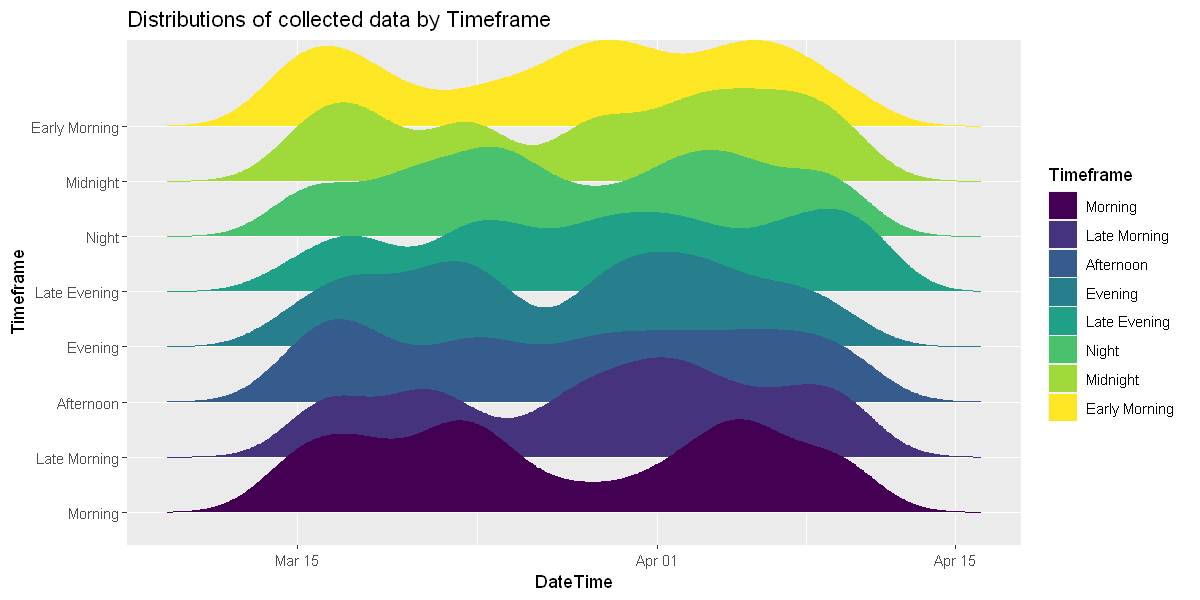

Picking joint bandwidth of 118000


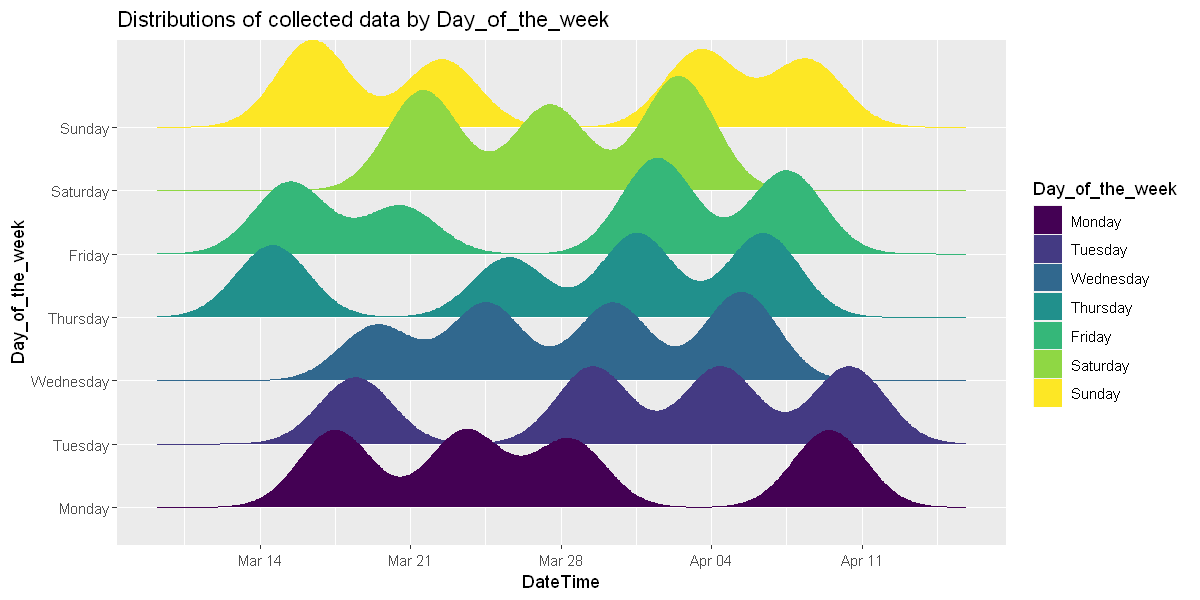

Picking joint bandwidth of 128000


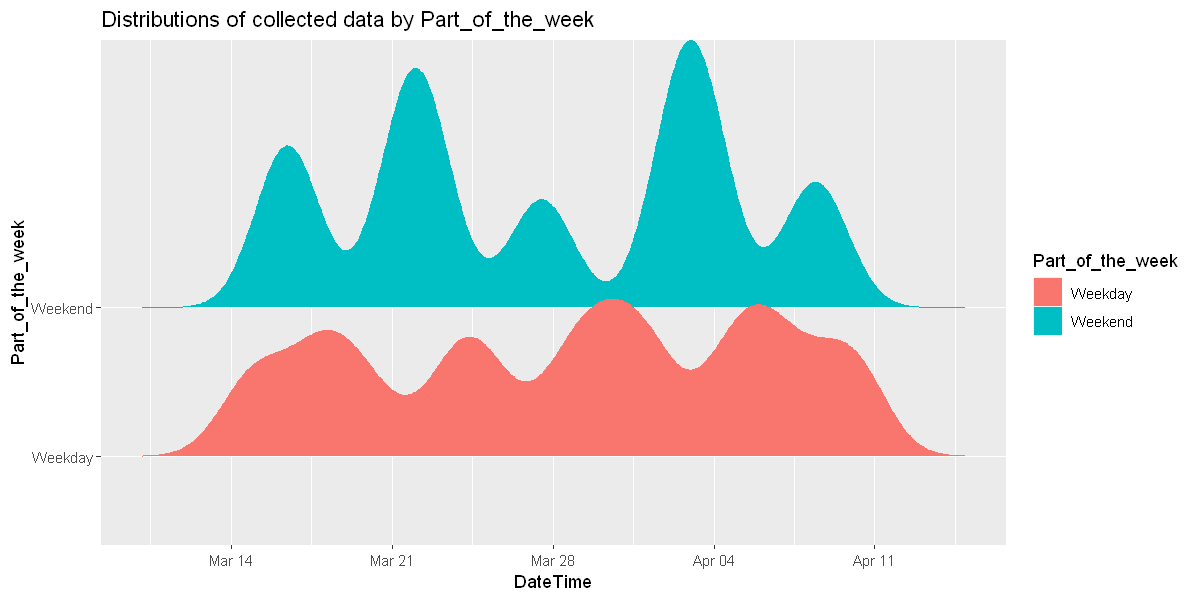

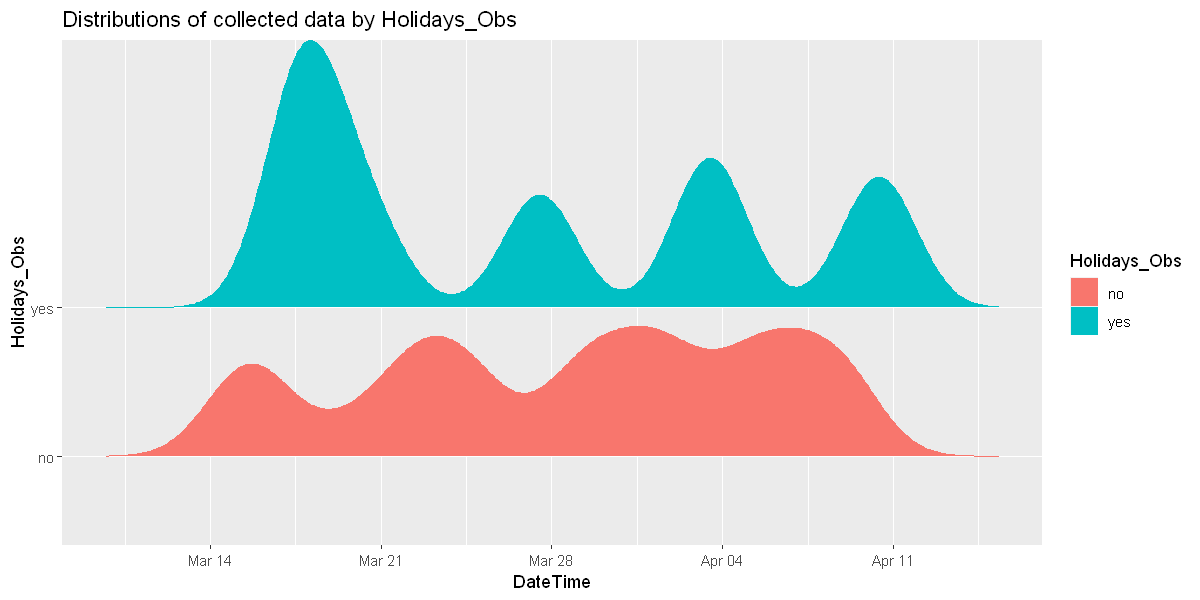

In [651]:
# Looking at the distributions of the collected data
ggplot(dataset, aes(x=DateTime, y=Timeframe, fill = Timeframe, color = Timeframe)) + 
geom_joy() +
labs(title = 'Distributions of collected data by Timeframe')

ggplot(dataset, aes(x=DateTime, y=Day_of_the_week, fill = Day_of_the_week, color = Day_of_the_week)) + 
geom_joy() +
labs(title = 'Distributions of collected data by Day_of_the_week')

ggplot(dataset, aes(x=DateTime, y=Part_of_the_week, fill = Part_of_the_week, color = Part_of_the_week)) + 
geom_joy() +
labs(title = 'Distributions of collected data by Part_of_the_week')

ggplot(dataset, aes(x=DateTime, y=Holidays_Obs, fill = Holidays_Obs, color = Holidays_Obs)) + 
geom_joy() +
labs(title = 'Distributions of collected data by Holidays_Obs')

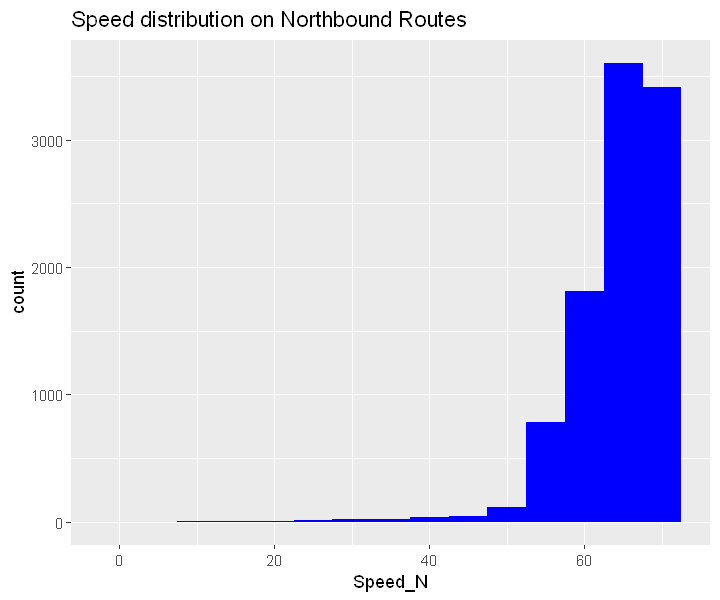

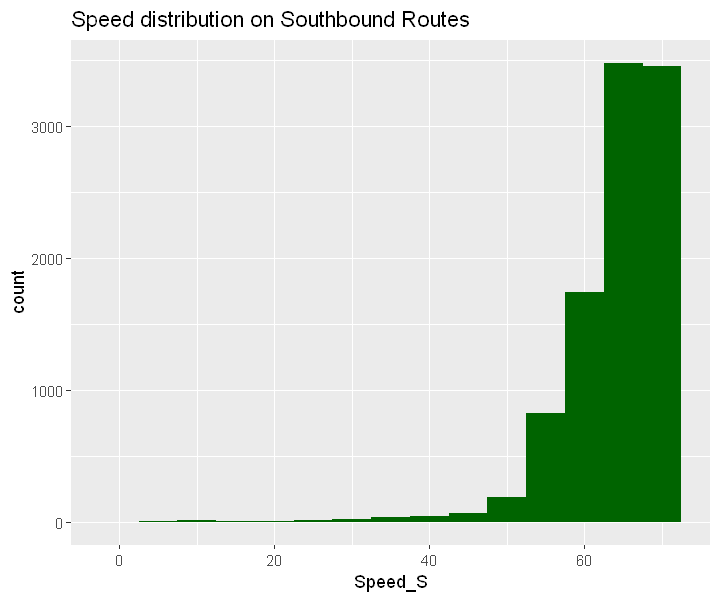

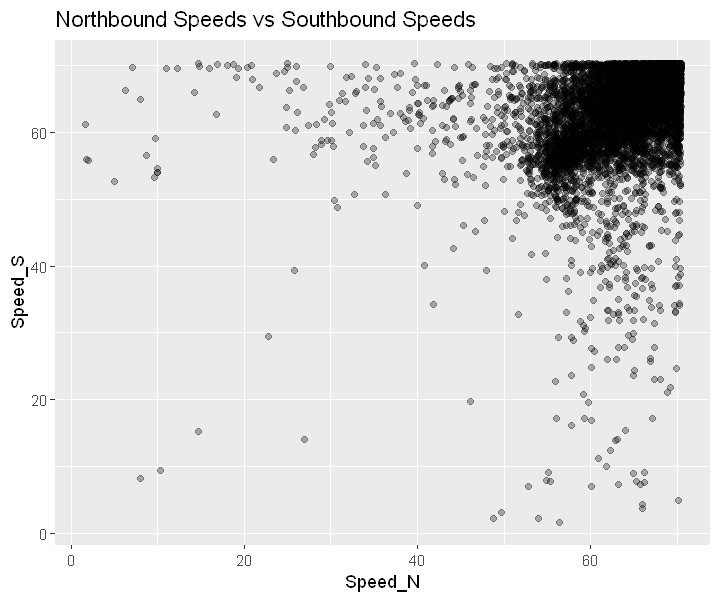

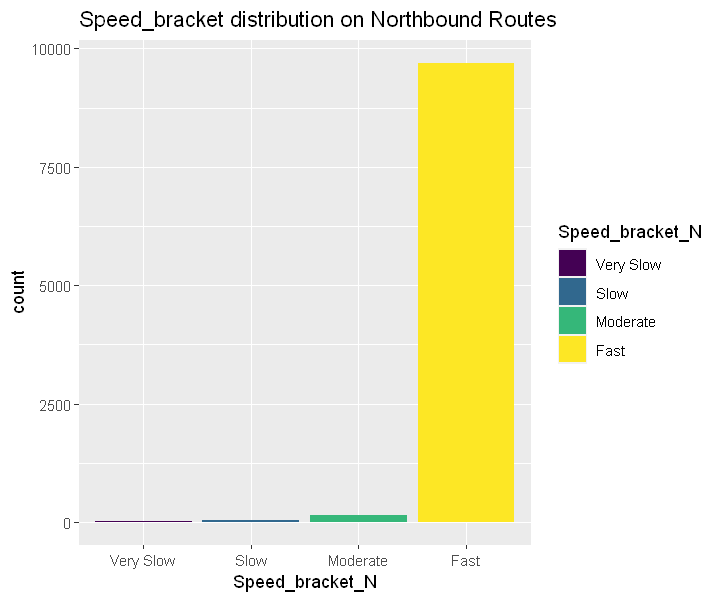

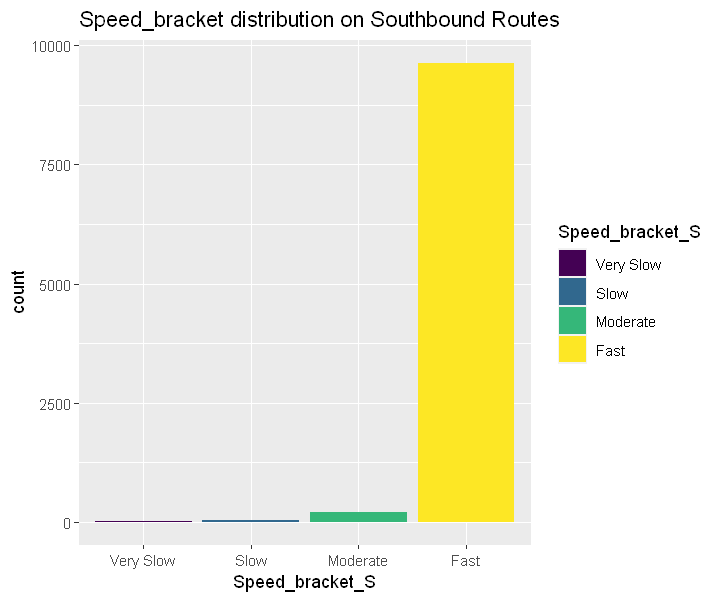

In [653]:
options(repr.plot.width=6, repr.plot.height=5)
ggplot(dataset, aes(Speed_N)) +
geom_histogram(fill = 'blue', binwidth = 5) +
labs(title = 'Speed distribution on Northbound Routes')

ggplot(dataset, aes(Speed_S)) +
geom_histogram(fill = 'Dark green', binwidth = 5) +
labs(title = 'Speed distribution on Southbound Routes')

ggplot(dataset, aes(Speed_N, Speed_S)) +
geom_jitter(alpha = 0.3) +
labs(title = 'Northbound Speeds vs Southbound Speeds')

ggplot(dataset, aes(Speed_bracket_N, fill = Speed_bracket_N)) +
geom_bar() +
labs(title = 'Speed_bracket distribution on Northbound Routes')

ggplot(dataset, aes(Speed_bracket_S, fill = Speed_bracket_S)) +
geom_bar() +
labs(title = 'Speed_bracket distribution on Southbound Routes')

In [654]:
# Slicing the data
congested_traffic_N <- dataset %>%
subset(Congestion_N == 1 )

congested_traffic_S <- dataset %>%
subset(Congestion_S == 1 )

Roadworks_traffic_N <- dataset %>%
subset(Roadworks_N == 1 )

Roadworks_traffic_S <- dataset %>%
subset(Roadworks_S == 1 )

Incident_traffic_N <- dataset %>%
subset(Incidents_N == 1 )

Incident_traffic_S <- dataset %>%
subset(Incidents_S == 1 )

In [655]:
str(congested_traffic_N)

'data.frame':	35 obs. of  20 variables:
 $ Date            : chr  "14/03/2022" "14/03/2022" "17/03/2022" "17/03/2022" ...
 $ Time            : chr  "14:00:00" "17:00:00" "08:00:00" "11:30:00" ...
 $ Northbound      : Ord.factor w/ 53 levels "J1J2"<"J2J4"<..: 19 25 34 33 34 33 34 3 30 2 ...
 $ Speed_N         : num  11 21 27 54 24 54 26 22 40 37 ...
 $ Roadworks_N     : Factor w/ 2 levels "0","1": 1 1 2 1 2 1 2 2 1 1 ...
 $ Congestion_N    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Incidents_N     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Southbound      : Ord.factor w/ 53 levels "J48J47"<"J47J46"<..: 35 29 20 21 20 21 20 51 24 52 ...
 $ Speed_S         : num  70 68 67 67 69 68 68 67 61 69 ...
 $ Roadworks_S     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Congestion_S    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Incidents_S     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ DateTime        : POSIXct, format: "2022-03-14 

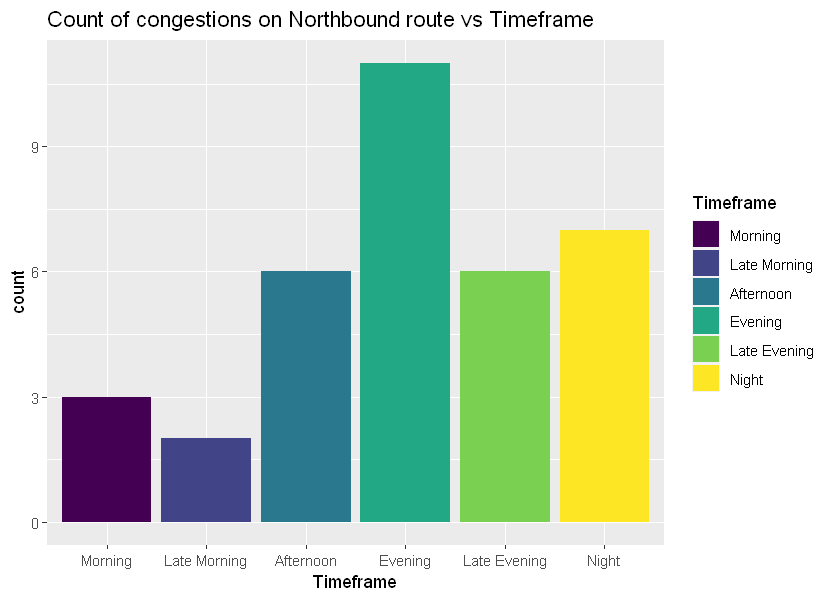

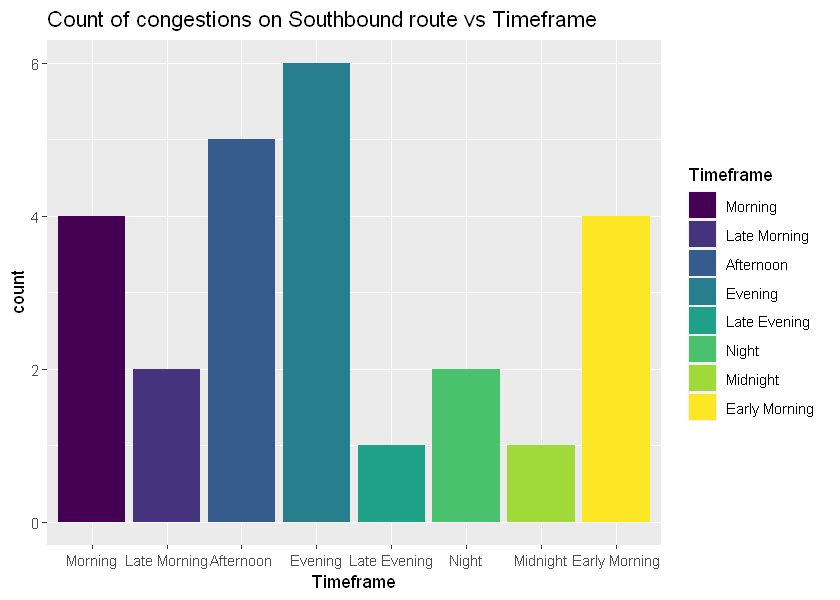

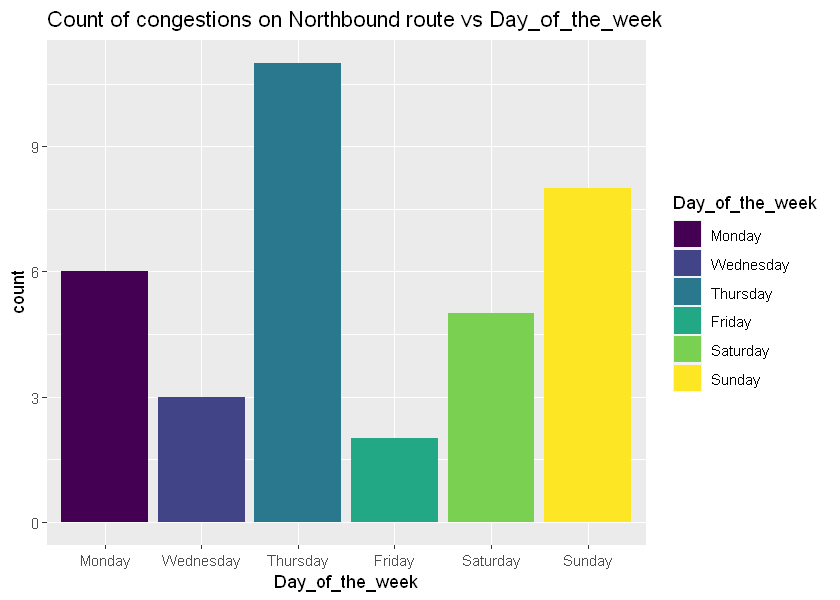

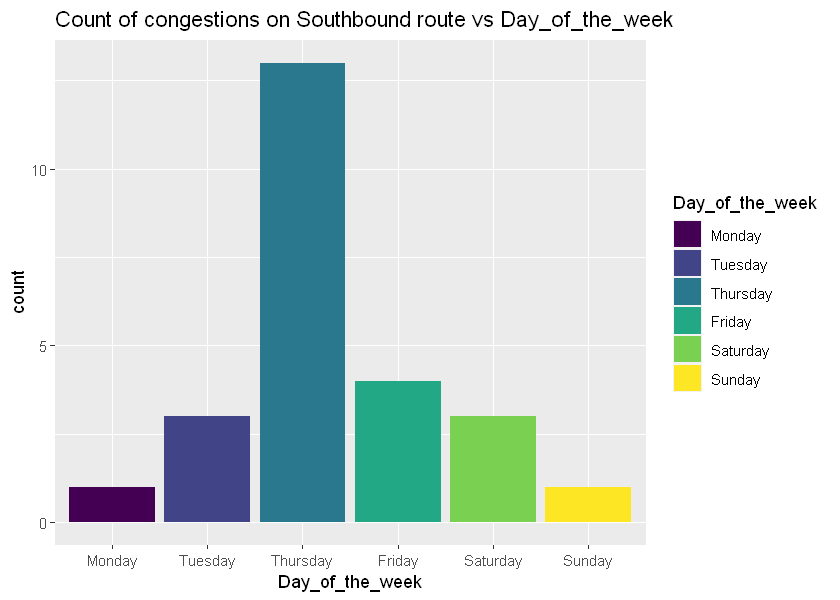

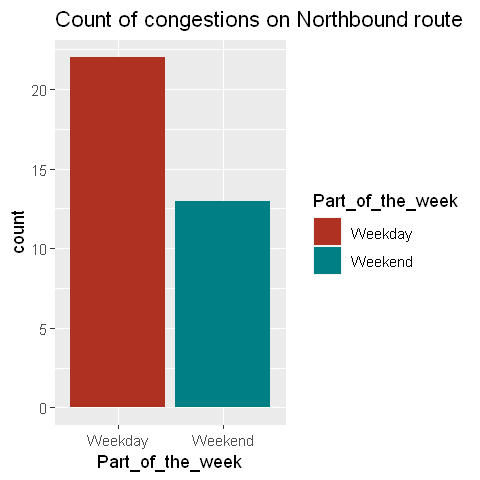

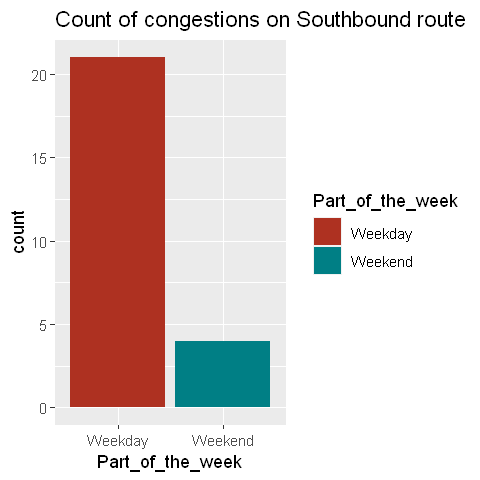

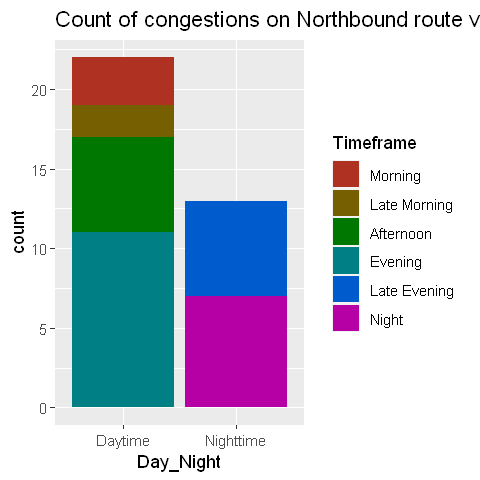

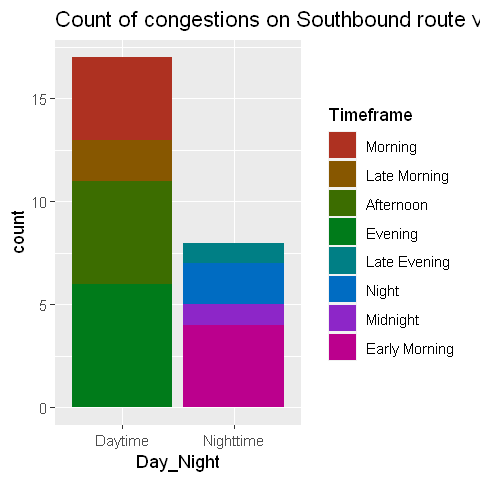

In [656]:
options(repr.plot.width=7, repr.plot.height=5)

ggplot(congested_traffic_N, aes(Timeframe, fill = Timeframe)) +
geom_bar() +
labs(title = 'Count of congestions on Northbound route vs Timeframe')

ggplot(congested_traffic_S, aes(Timeframe, fill = Timeframe)) +
geom_bar()+
labs(title = 'Count of congestions on Southbound route vs Timeframe')

ggplot(congested_traffic_N, aes(Day_of_the_week, fill = Day_of_the_week)) +
geom_bar() +
labs(title = 'Count of congestions on Northbound route vs Day_of_the_week')

ggplot(congested_traffic_S, aes(Day_of_the_week, fill = Day_of_the_week)) +
geom_bar() +
labs(title = 'Count of congestions on Southbound route vs Day_of_the_week')

options(repr.plot.width=4, repr.plot.height=4)
ggplot(congested_traffic_N, aes(Part_of_the_week, fill = Part_of_the_week)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Count of congestions on Northbound route')

ggplot(congested_traffic_S, aes(Part_of_the_week, fill = Part_of_the_week)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Count of congestions on Southbound route')

ggplot(congested_traffic_N, aes(Day_Night, fill = Timeframe)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Count of congestions on Northbound route vs Day_Night')

ggplot(congested_traffic_S, aes(Day_Night, fill = Timeframe)) +
geom_bar()+
scale_fill_hue(l=40) +
labs(title = 'Count of congestions on Southbound route vs Day_Night')


$title
[1] "Count of roadworks on Northbound route vs Timeframe"

attr(,"class")
[1] "labels"

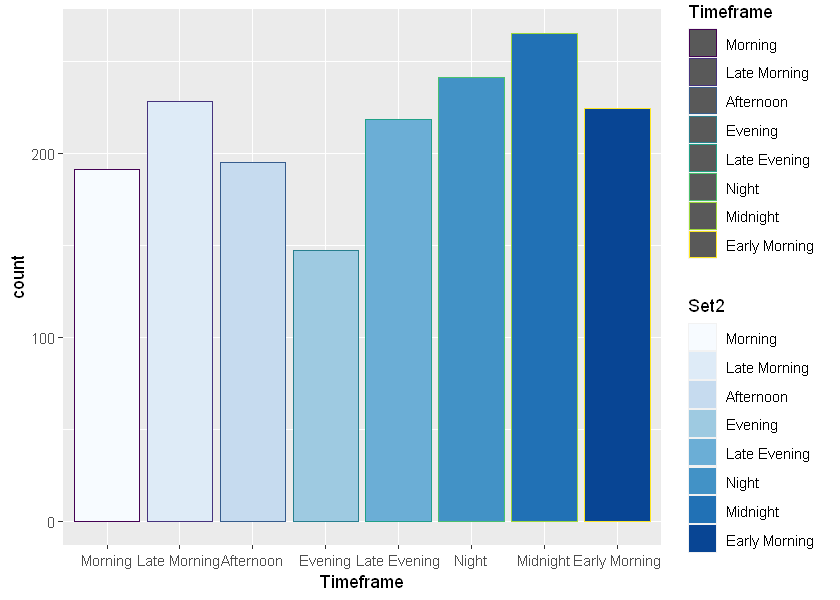

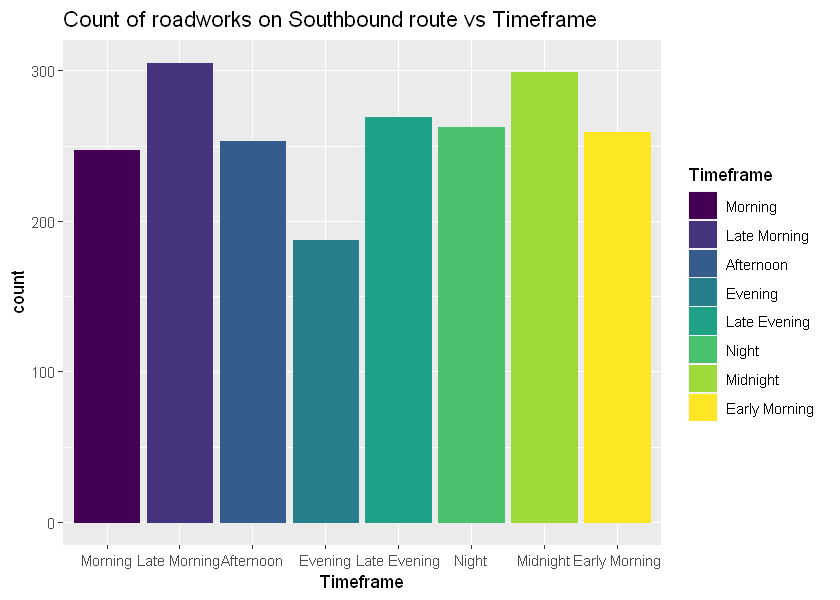

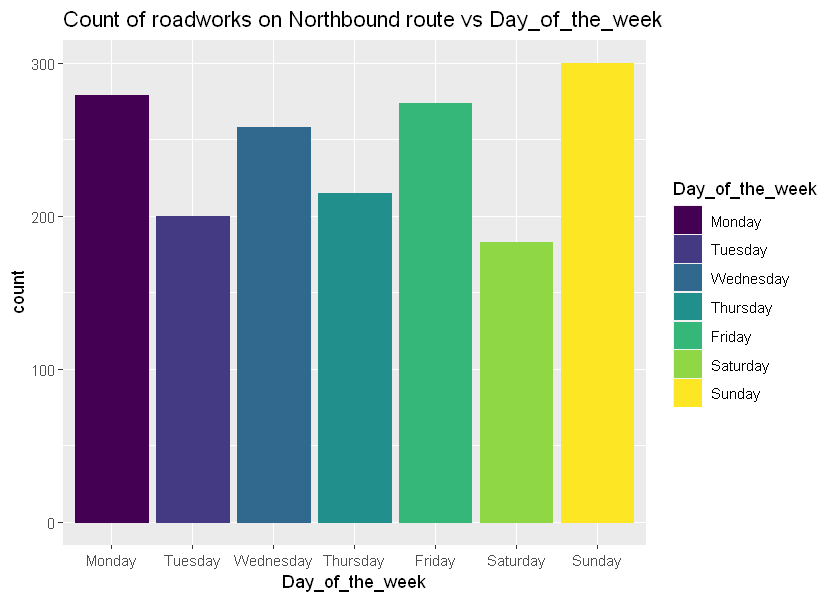

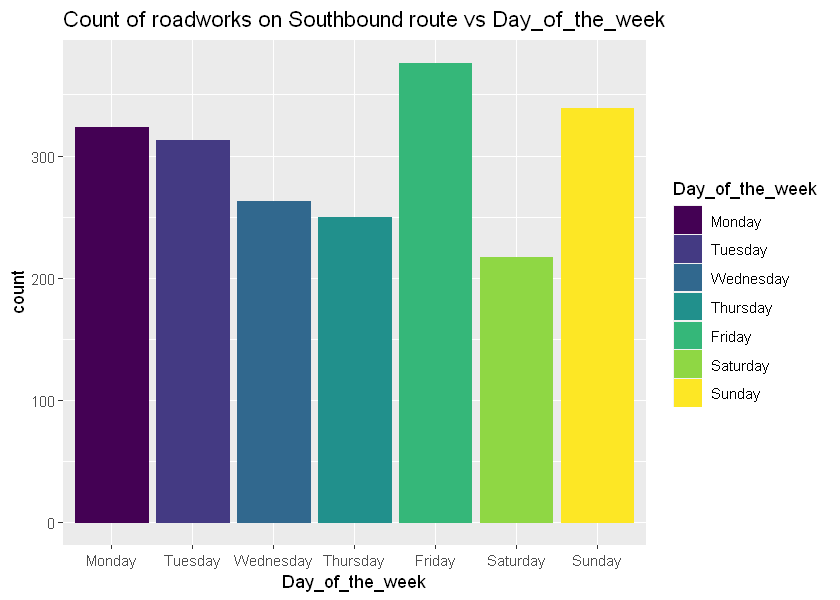

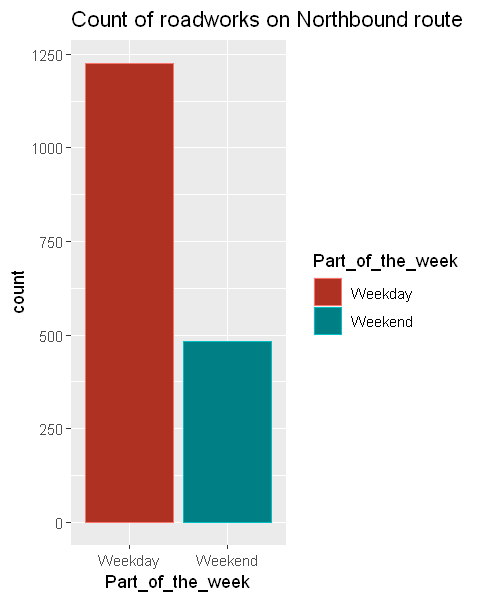

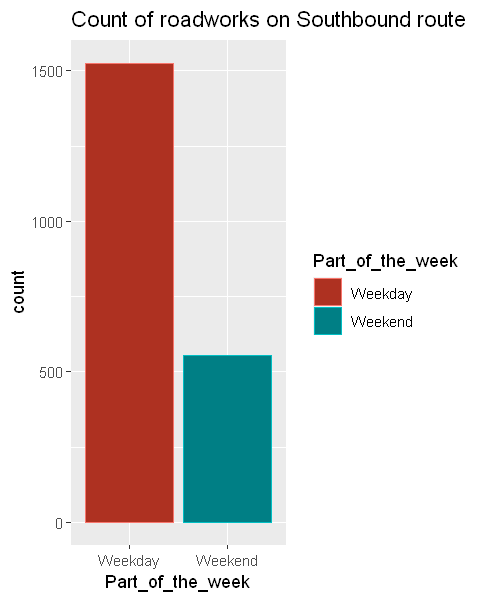

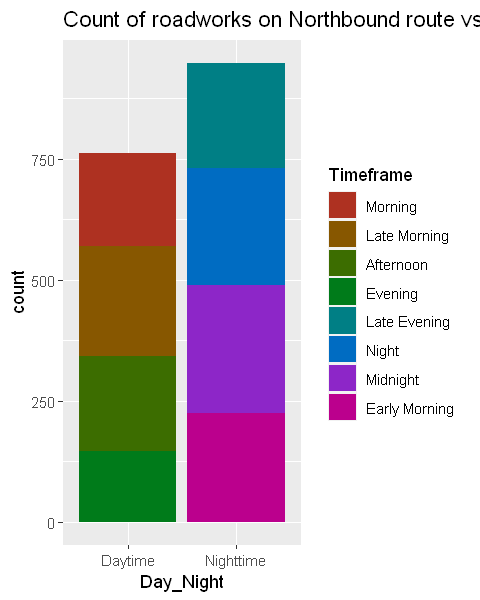

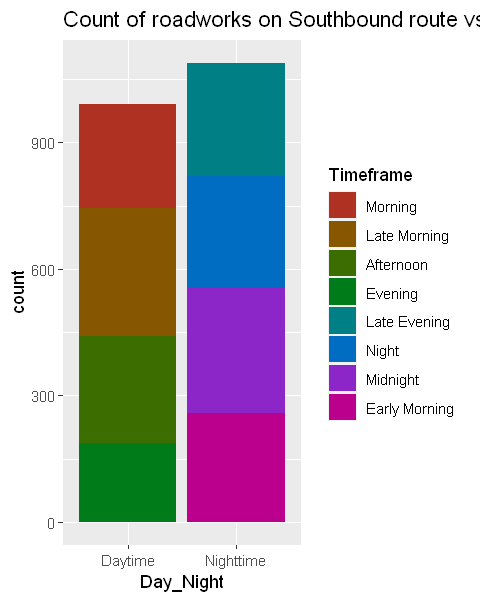

In [658]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(Roadworks_traffic_N, aes(Timeframe, color = Timeframe, fill = Timeframe)) +
geom_bar() +
labs(title = 'Count of roadworks on Northbound route vs Timeframe')

ggplot(Roadworks_traffic_S, aes(Timeframe, color = Timeframe, fill = Timeframe)) +
geom_bar() +
labs(title = 'Count of roadworks on Southbound route vs Timeframe')

ggplot(Roadworks_traffic_N, aes(Day_of_the_week, color = Day_of_the_week, fill = Day_of_the_week)) +
geom_bar() +
labs(title = 'Count of roadworks on Northbound route vs Day_of_the_week')

ggplot(Roadworks_traffic_S, aes(Day_of_the_week, color = Day_of_the_week, fill = Day_of_the_week)) +
geom_bar() +
labs(title = 'Count of roadworks on Southbound route vs Day_of_the_week')

options(repr.plot.width=4, repr.plot.height=5)
ggplot(Roadworks_traffic_N, aes(Part_of_the_week, color = Part_of_the_week, fill = Part_of_the_week)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Count of roadworks on Northbound route')

ggplot(Roadworks_traffic_S, aes(Part_of_the_week, color = Part_of_the_week, fill = Part_of_the_week)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Count of roadworks on Southbound route')

ggplot(Roadworks_traffic_N, aes(Day_Night, fill = Timeframe)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Count of roadworks on Northbound route vs Day_Night')

ggplot(Roadworks_traffic_S, aes(Day_Night, fill = Timeframe)) +
geom_bar()+
scale_fill_hue(l=40) +
labs(title = 'Count of roadworks on Southbound route vs Day_Night')

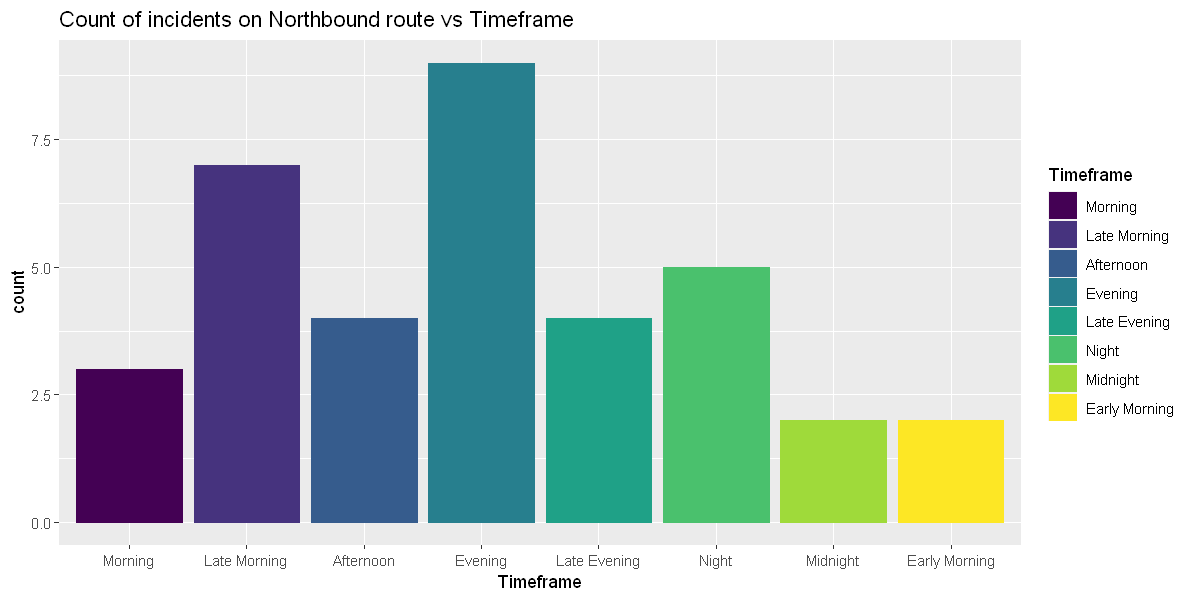

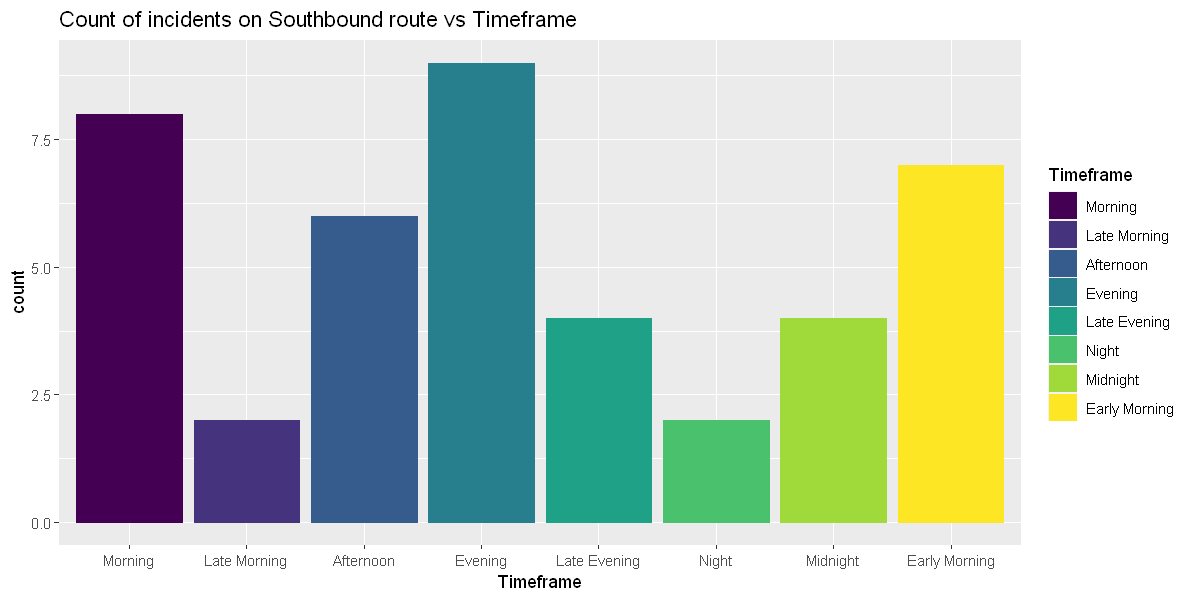

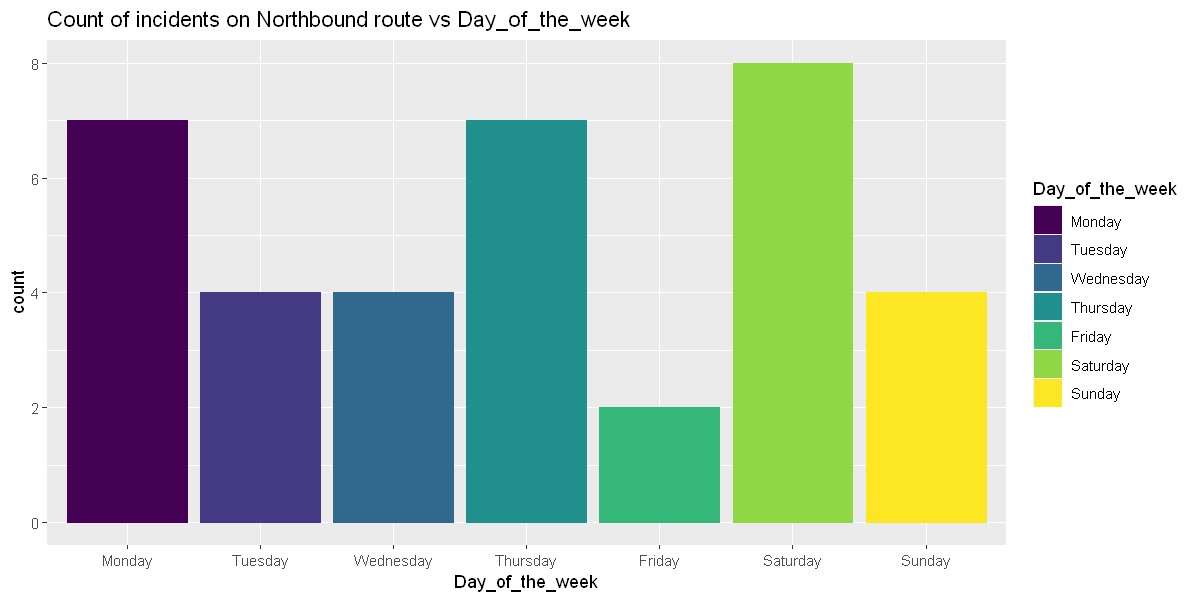

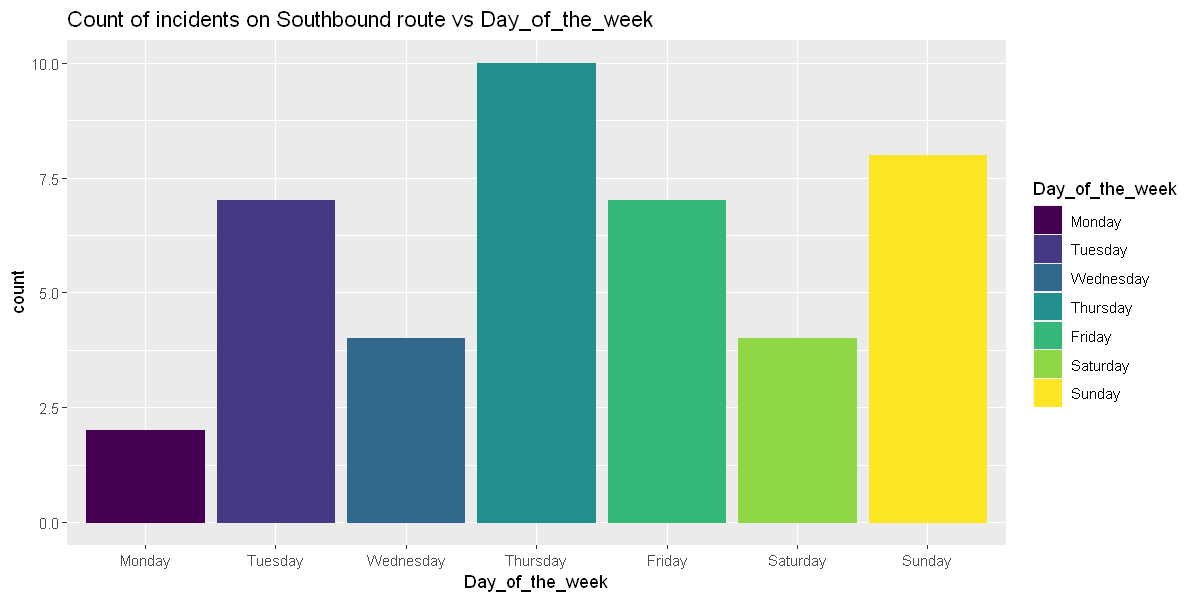

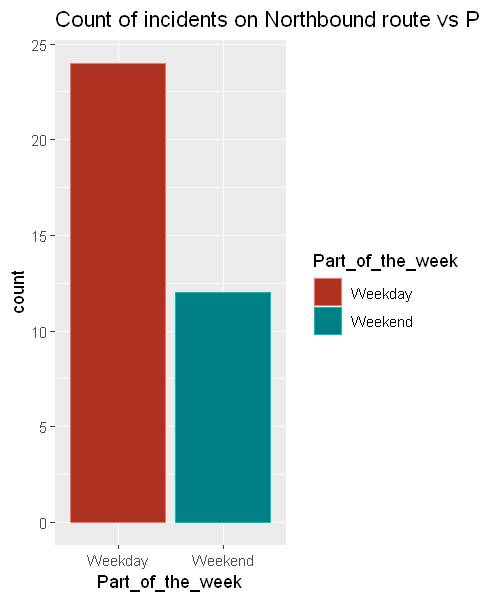

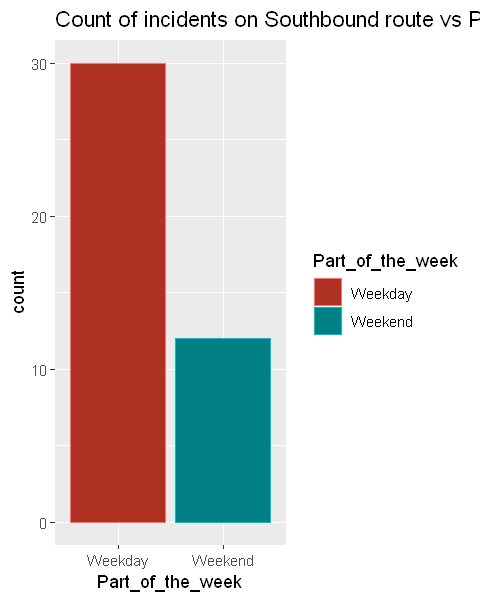

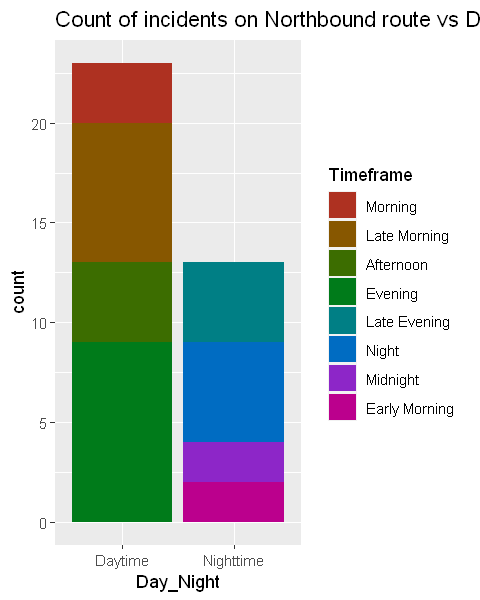

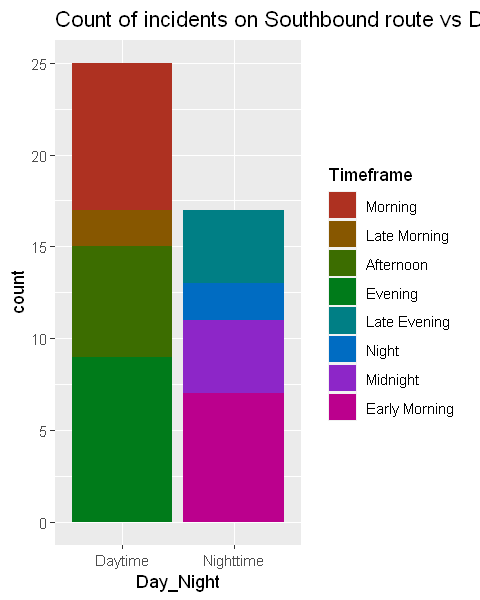

In [659]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot(Incident_traffic_N, aes(Timeframe, color = Timeframe, fill = Timeframe)) +
geom_bar() +
labs(title = 'Count of incidents on Northbound route vs Timeframe')

ggplot(Incident_traffic_S, aes(Timeframe, color = Timeframe, fill = Timeframe)) +
geom_bar() +
labs(title = 'Count of incidents on Southbound route vs Timeframe')

ggplot(Incident_traffic_N, aes(Day_of_the_week, color = Day_of_the_week, fill = Day_of_the_week)) +
geom_bar() +
labs(title = 'Count of incidents on Northbound route vs Day_of_the_week')

ggplot(Incident_traffic_S, aes(Day_of_the_week, color = Day_of_the_week, fill = Day_of_the_week)) +
geom_bar() +
labs(title = 'Count of incidents on Southbound route vs Day_of_the_week')

options(repr.plot.width=4, repr.plot.height=5)
ggplot(Incident_traffic_N, aes(Part_of_the_week, color = Part_of_the_week, fill = Part_of_the_week)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Count of incidents on Northbound route vs Part_of_the_week')

ggplot(Incident_traffic_S, aes(Part_of_the_week, color = Part_of_the_week, fill = Part_of_the_week)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Count of incidents on Southbound route vs Part_of_the_week')

ggplot(Incident_traffic_N, aes(Day_Night, fill = Timeframe)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Count of incidents on Northbound route vs Day_Night')

ggplot(Incident_traffic_S, aes(Day_Night, fill = Timeframe)) +
geom_bar()+
scale_fill_hue(l=40) +
labs(title = 'Count of incidents on Southbound route vs Day_Night')

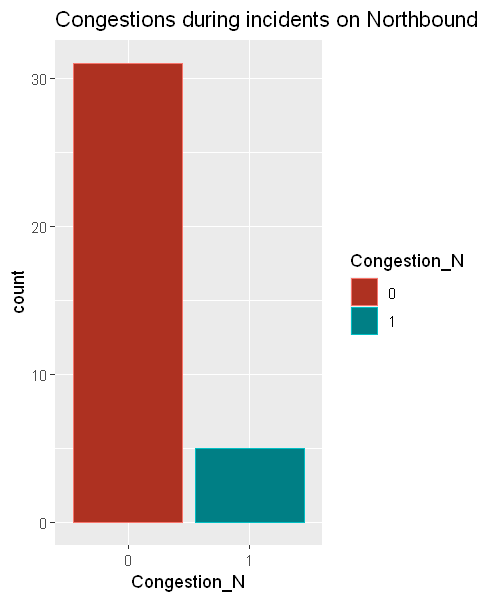

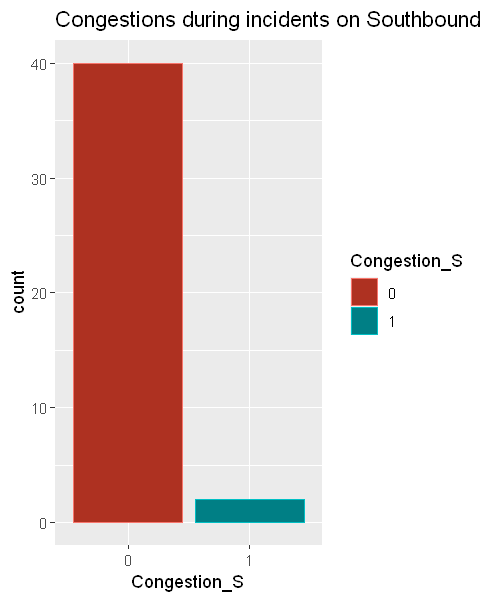

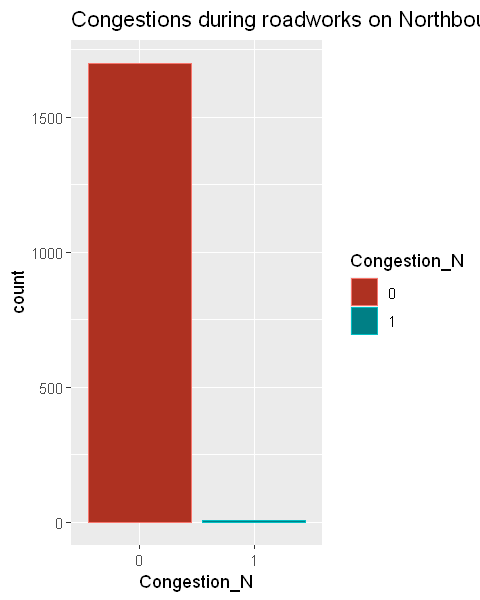

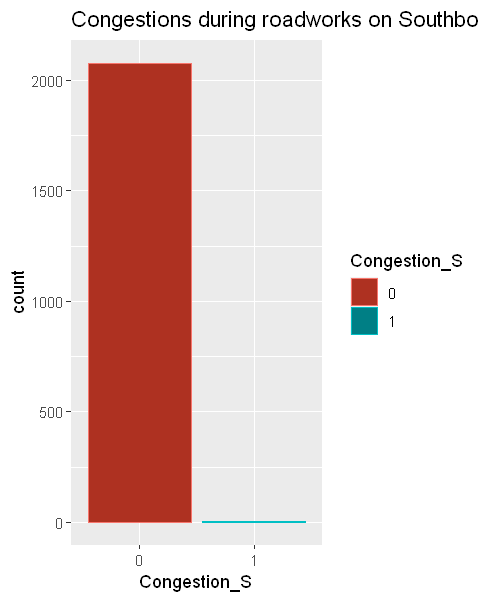

In [660]:
# Relationship between Incident and congestion

ggplot(Incident_traffic_N, aes(Congestion_N, color = Congestion_N, fill = Congestion_N)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Congestions during incidents on Northbound')

ggplot(Incident_traffic_S, aes(Congestion_S, color = Congestion_S, fill = Congestion_S)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Congestions during incidents on Southbound')

# Relationship btw Roadworks and congestion
ggplot(Roadworks_traffic_N, aes(Congestion_N, color = Congestion_N, fill = Congestion_N)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Congestions during roadworks on Northbound')

ggplot(Roadworks_traffic_S, aes(Congestion_S, color = Congestion_S, fill = Congestion_S)) +
geom_bar() +
scale_fill_hue(l=40) +
labs(title = 'Congestions during roadworks on Southbound')

Warning message:
"Using size for a discrete variable is not advised."

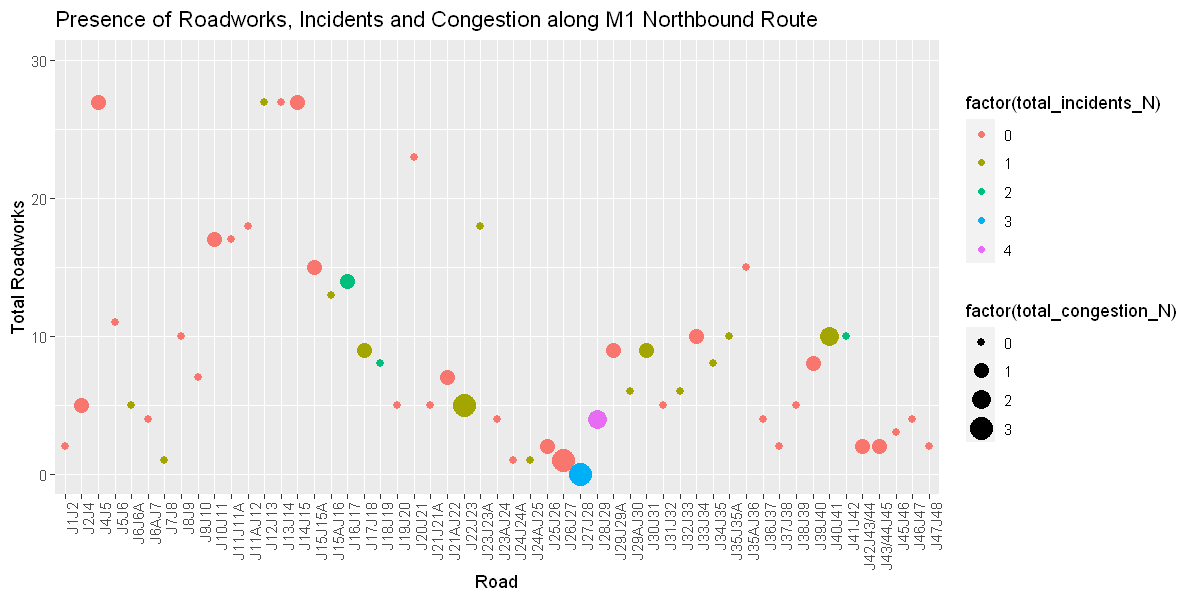

In [661]:
# visualize roadworks, congestion and incidents along M1 Northbound route
options(repr.plot.width=10, repr.plot.height=5)
ggplot(counts_N, aes(Northbound, total_roadworks_N, group = 1, legend = F, size = factor(total_congestion_N), 
                     color = factor(total_incidents_N))) + geom_point() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Presence of Roadworks, Incidents and Congestion along M1 Northbound Route') +
xlab('Road') +
ylab('Total Roadworks') +
ylim(0, 30)

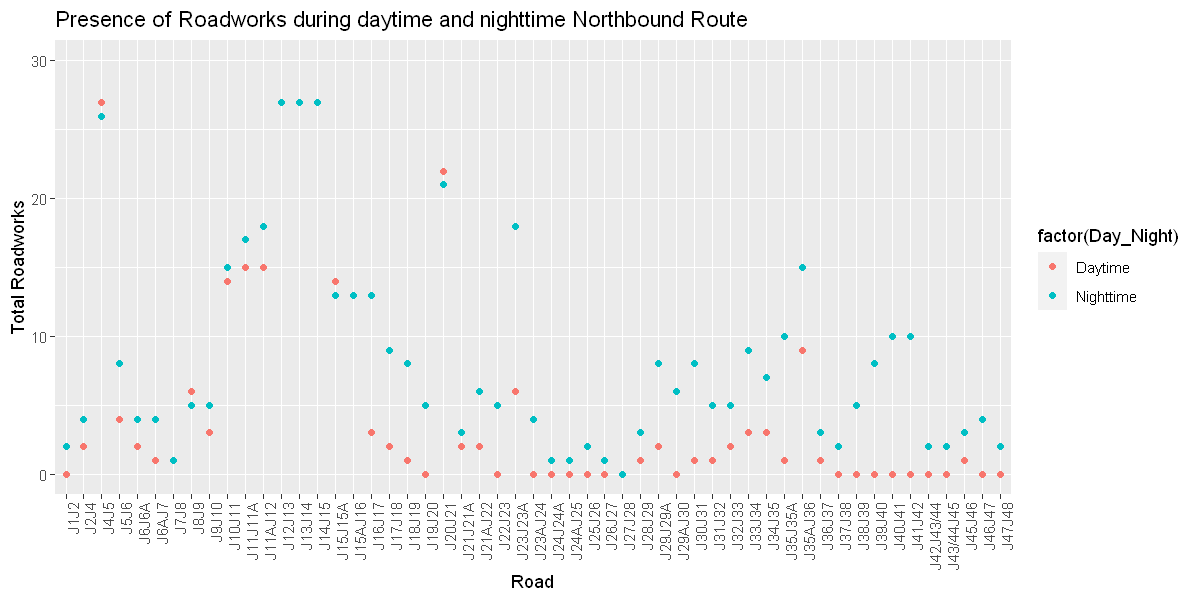

In [662]:
# visualize roadworks along M1 Northbound route during day and night
options(repr.plot.width=10, repr.plot.height=5)
ggplot(counts_NN, aes(Northbound, total_roadworks_N, group = 1, legend = F, 
                     color = factor(Day_Night))) + geom_point() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Presence of Roadworks during daytime and nighttime Northbound Route') +
xlab('Road') +
ylab('Total Roadworks') +
ylim(0, 30)

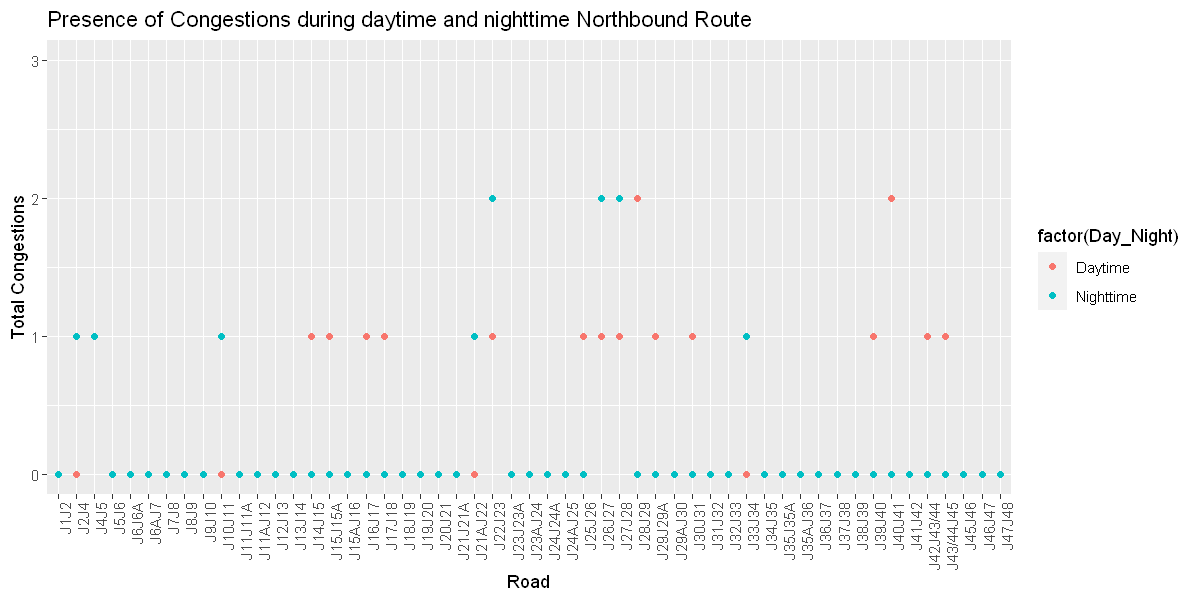

In [663]:
# visualize congestions along M1 Northbound route during day and night
options(repr.plot.width=10, repr.plot.height=5)
ggplot(counts_NN, aes(Northbound, total_congestion_N, group = 1, legend = F, 
                     color = factor(Day_Night))) + geom_point() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Presence of Congestions during daytime and nighttime Northbound Route') +
xlab('Road') +
ylab('Total Congestions') +
ylim(0, 3)

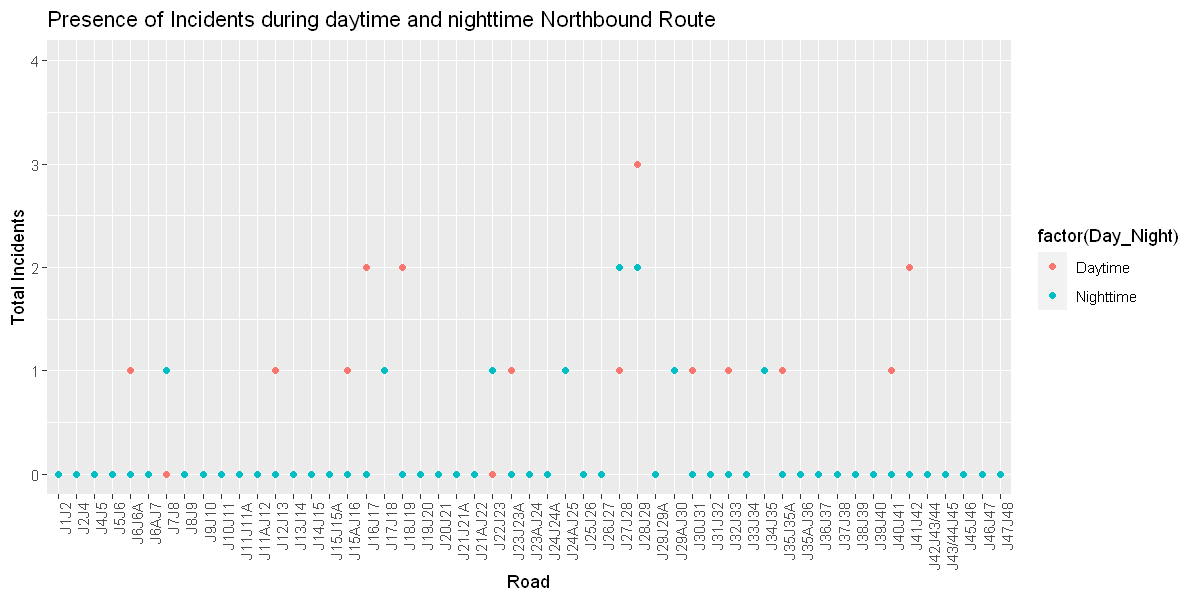

In [664]:
# visualize congestions along M1 Northbound route during day and night
options(repr.plot.width=10, repr.plot.height=5)
ggplot(counts_NN, aes(Northbound, total_incidents_N, group = 1, legend = F, 
                     color = factor(Day_Night))) + geom_point() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Presence of Incidents during daytime and nighttime Northbound Route') +
xlab('Road') +
ylab('Total Incidents') +
ylim(0, 4)

Warning message:
"Using size for a discrete variable is not advised."

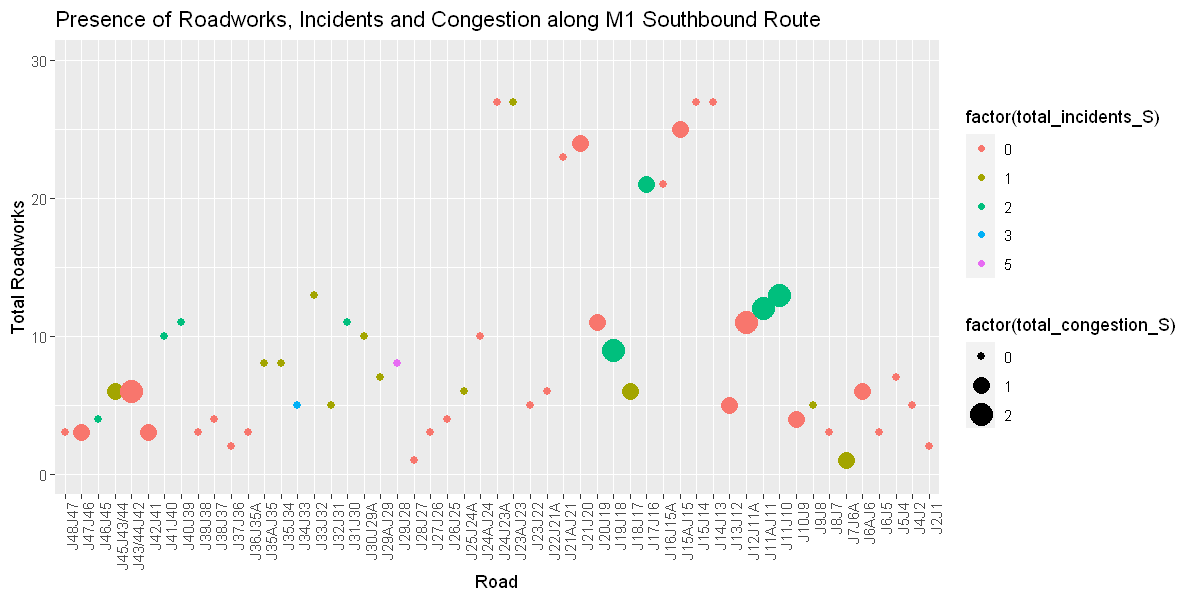

In [666]:
# visualize roadworks, congestion and incidents along M1 Southbound route
ggplot(counts_S, aes(Southbound, total_roadworks_S, group = 1, legend = F, size = factor(total_congestion_S), 
                     color = factor(total_incidents_S))) + geom_point() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Presence of Roadworks, Incidents and Congestion along M1 Southbound Route') +
xlab('Road') +
ylab('Total Roadworks') +
ylim(0, 30)

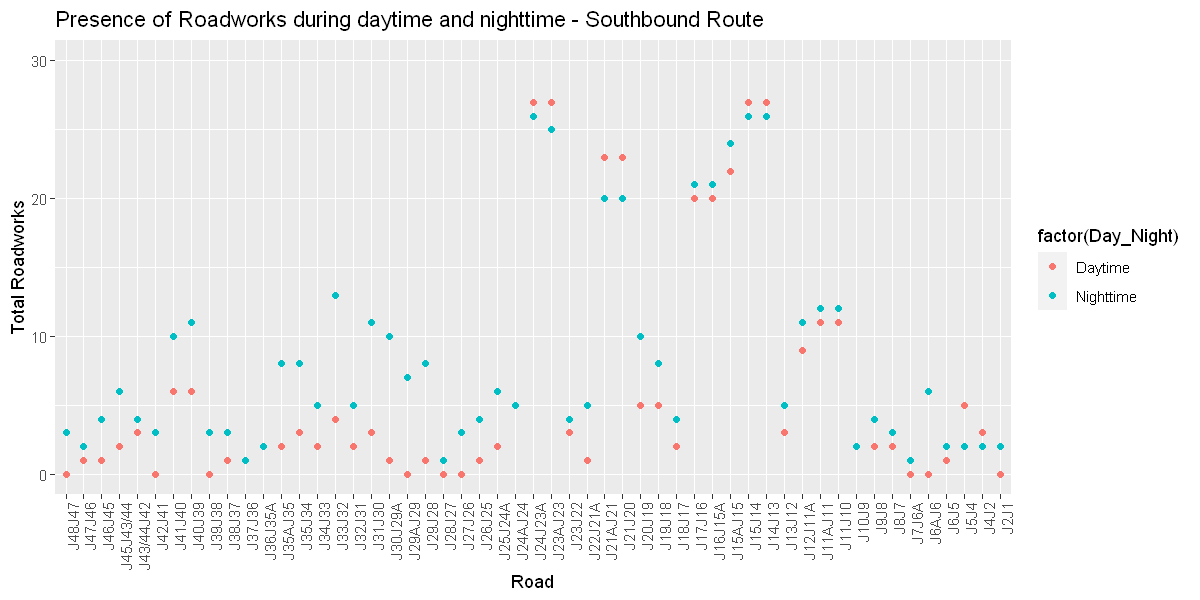

In [667]:
# visualize roadworks along M1 Southbound route during daytime and nighttime
ggplot(counts_SS, aes(Southbound, total_roadworks_S, group = 1, legend = F, 
                     color = factor(Day_Night))) + geom_point() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Presence of Roadworks during daytime and nighttime - Southbound Route') +
xlab('Road') +
ylab('Total Roadworks') +
ylim(0, 30)

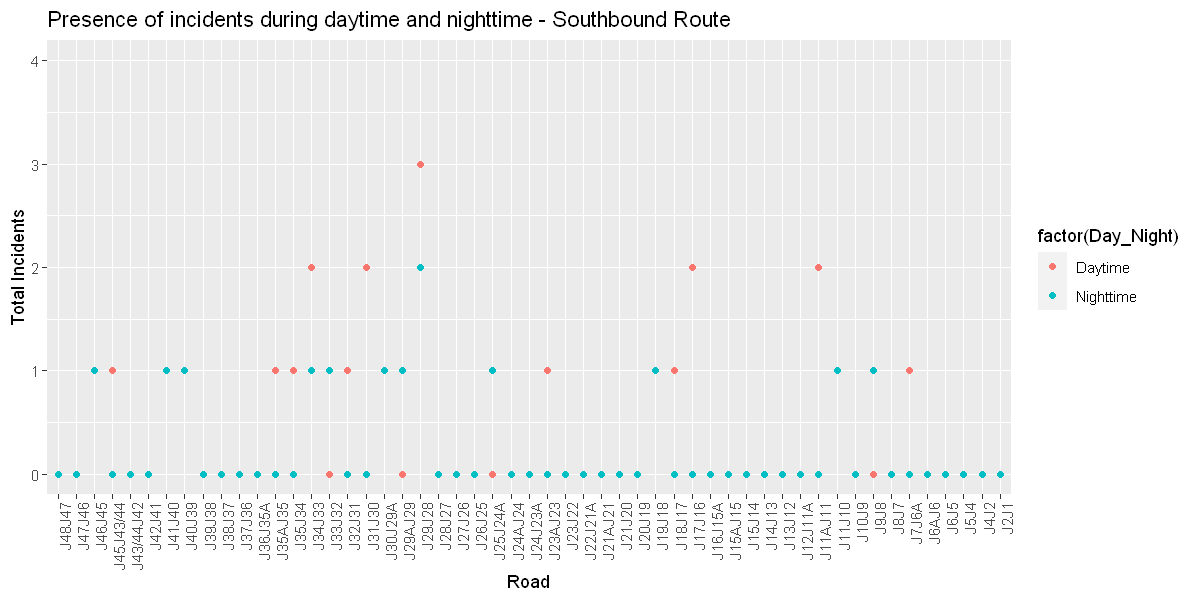

In [668]:
# visualize incidents along M1 Southbound route during daytime and nighttime
ggplot(counts_SS, aes(Southbound, total_incidents_S, group = 1, legend = F, 
                     color = factor(Day_Night))) + geom_point() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Presence of incidents during daytime and nighttime - Southbound Route') +
xlab('Road') +
ylab('Total Incidents') +
ylim(0, 4)

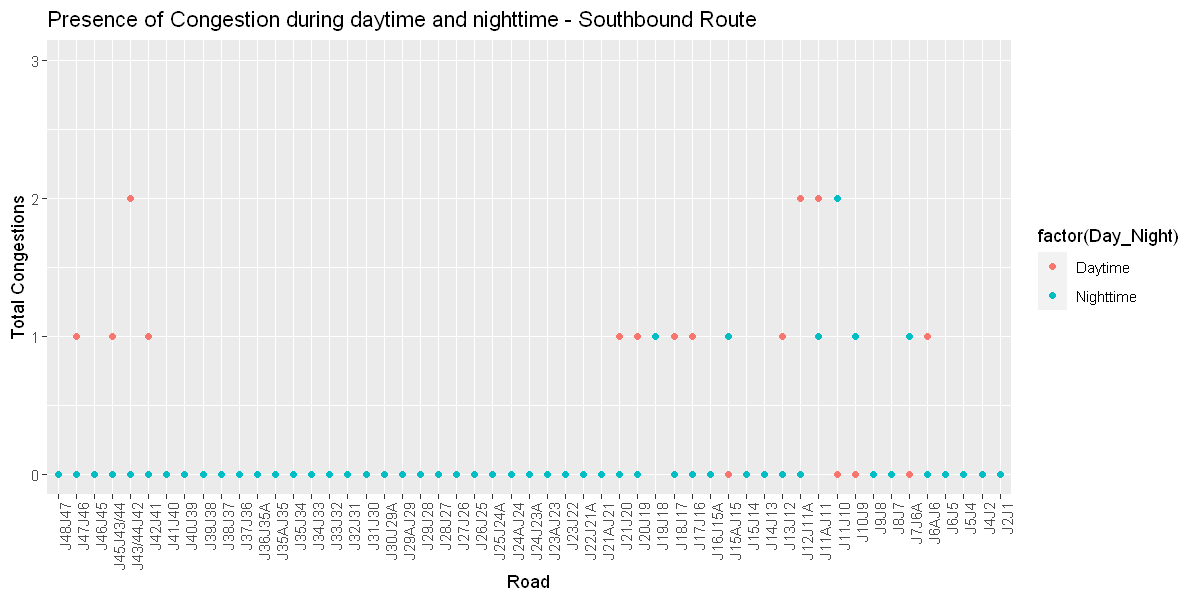

In [669]:
# visualize incidents along M1 Southbound route during daytime and nighttime
ggplot(counts_SS, aes(Southbound, total_congestion_S, group = 1, legend = F, 
                     color = factor(Day_Night))) + geom_point() +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Presence of Congestion during daytime and nighttime - Southbound Route') +
xlab('Road') +
ylab('Total Congestions') +
ylim(0, 3)

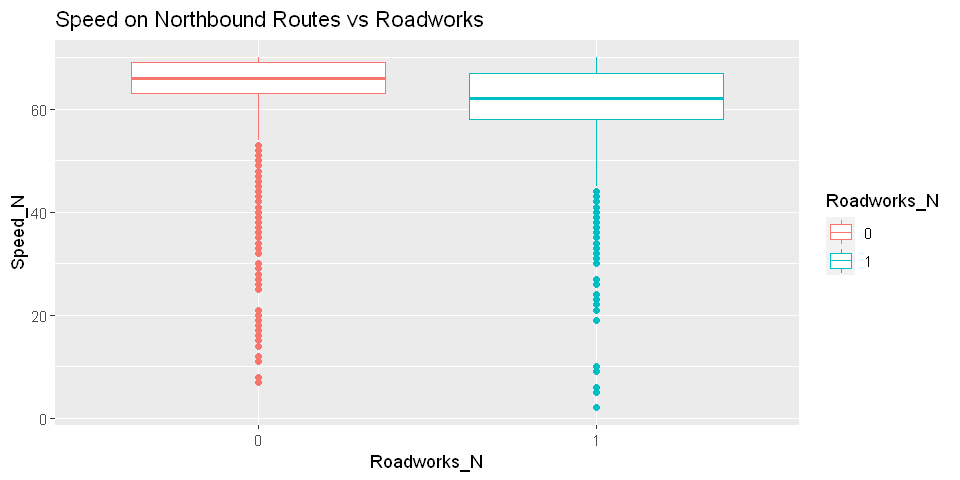

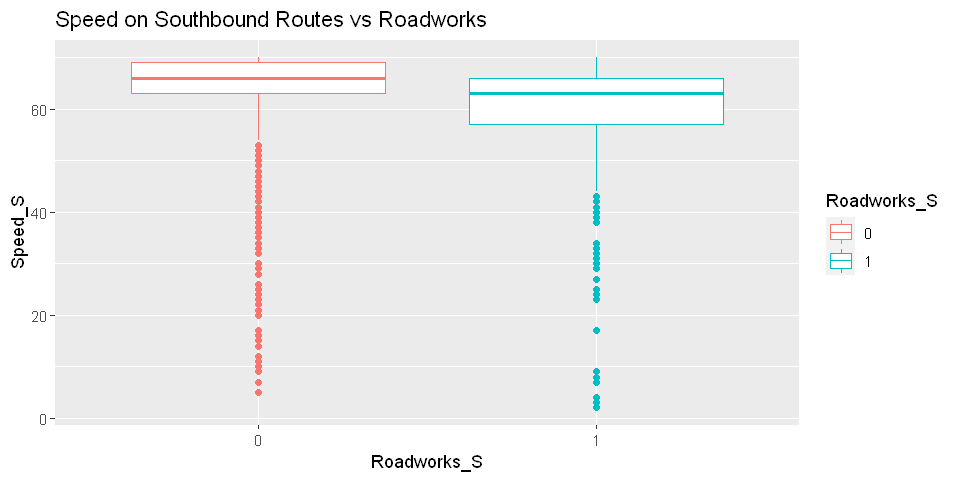

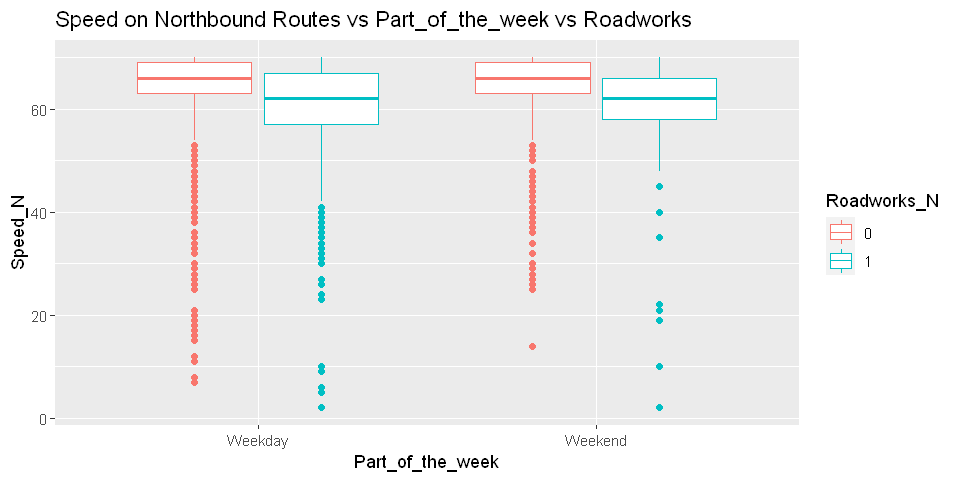

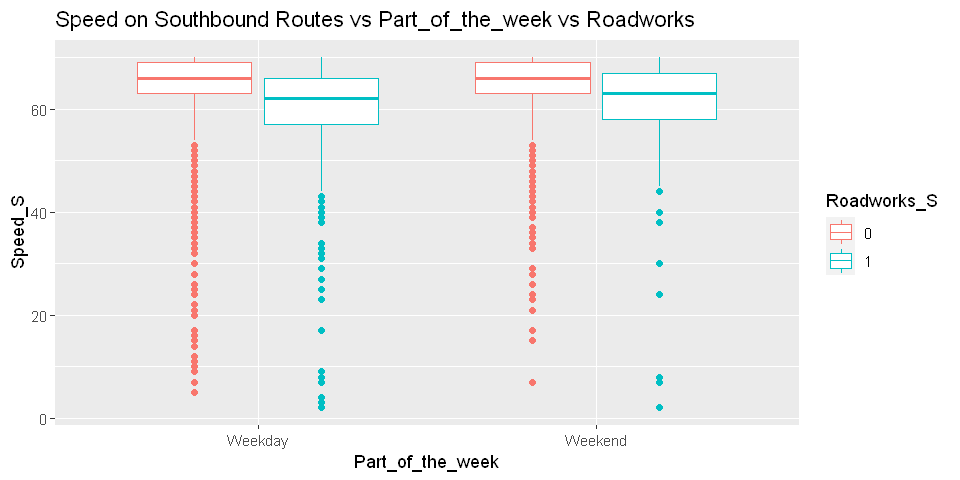

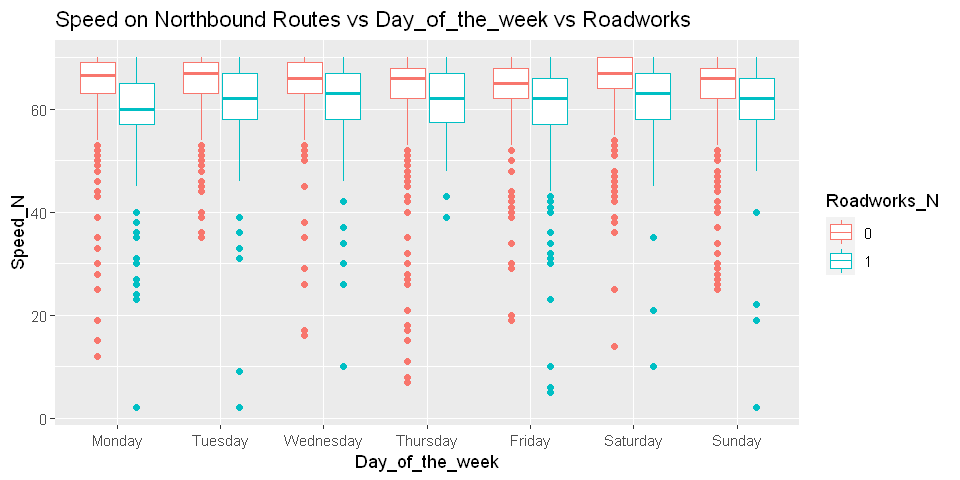

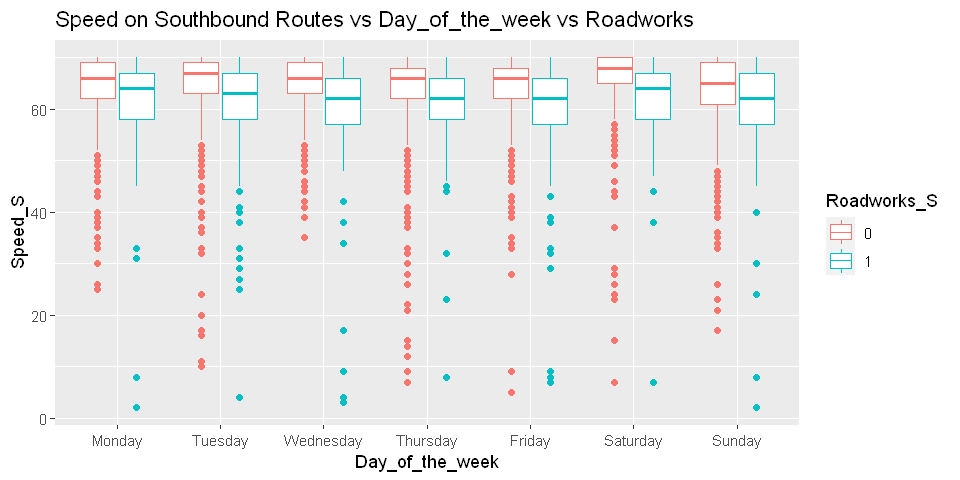

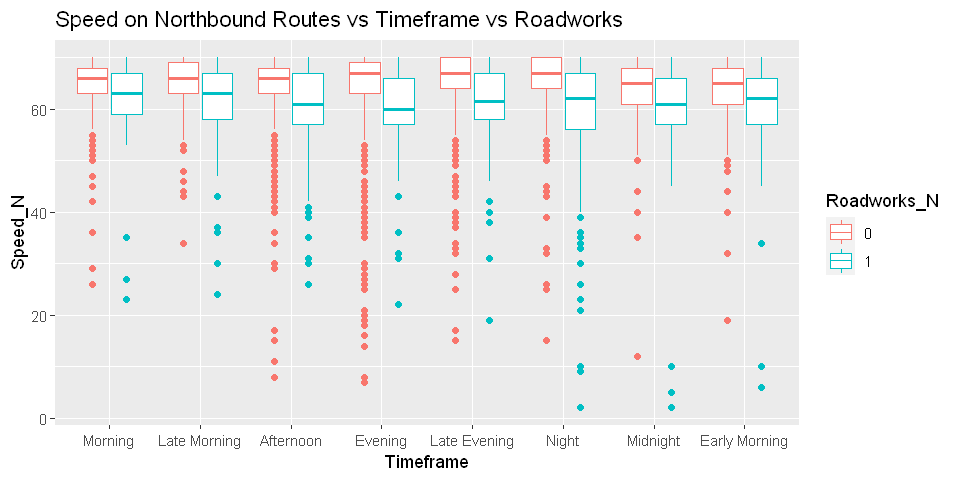

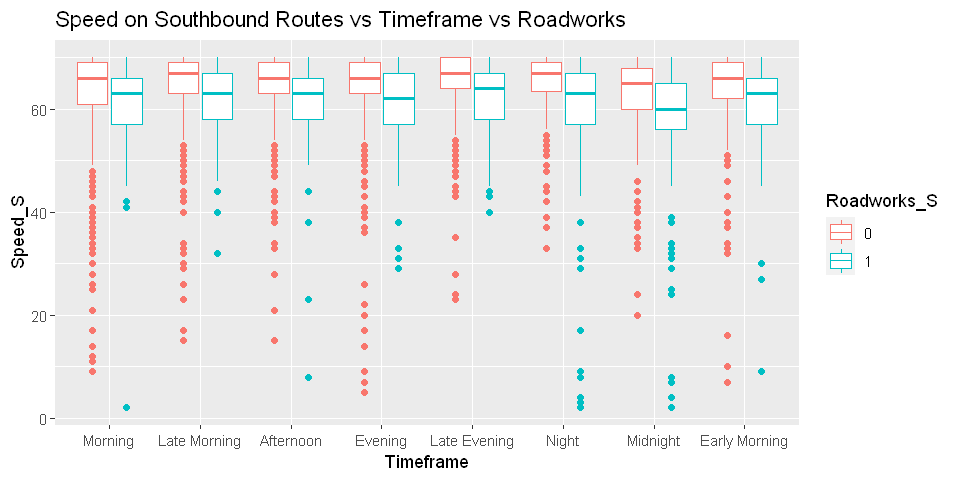

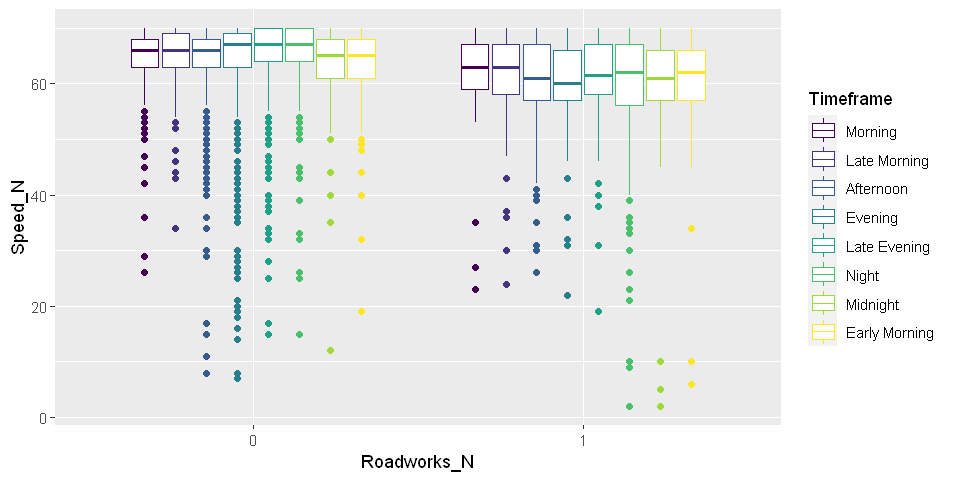

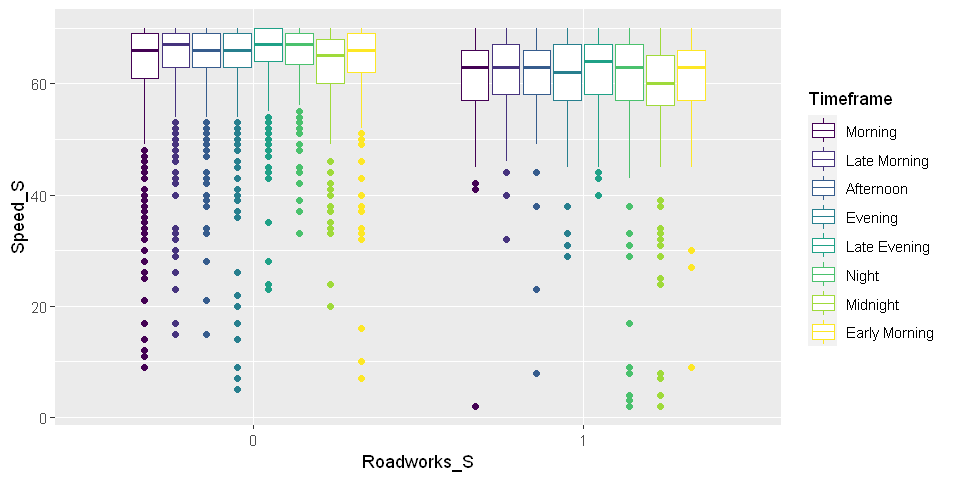

In [671]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(dataset, aes(Roadworks_N, Speed_N, color = Roadworks_N))+
geom_boxplot() +
labs(title = 'Speed on Northbound Routes vs Roadworks')

ggplot(dataset, aes(Roadworks_S, Speed_S, color = Roadworks_S))+
geom_boxplot() +
labs(title = 'Speed on Southbound Routes vs Roadworks')

ggplot(dataset, aes(Part_of_the_week, Speed_N, color=Roadworks_N))+
geom_boxplot() +
labs(title = 'Speed on Northbound Routes vs Part_of_the_week vs Roadworks')

ggplot(dataset, aes(Part_of_the_week, Speed_S, color=Roadworks_S))+
geom_boxplot() +
labs(title = 'Speed on Southbound Routes vs Part_of_the_week vs Roadworks')

ggplot(dataset, aes(Day_of_the_week, Speed_N, color=Roadworks_N))+
geom_boxplot() +
labs(title = 'Speed on Northbound Routes vs Day_of_the_week vs Roadworks')

ggplot(dataset, aes(Day_of_the_week, Speed_S, color=Roadworks_S))+
geom_boxplot() +
labs(title = 'Speed on Southbound Routes vs Day_of_the_week vs Roadworks')

ggplot(dataset, aes(Timeframe, Speed_N, color=Roadworks_N))+
geom_boxplot() +
labs(title = 'Speed on Northbound Routes vs Timeframe vs Roadworks')

ggplot(dataset, aes(Timeframe, Speed_S, color=Roadworks_S))+
geom_boxplot() +
labs(title = 'Speed on Southbound Routes vs Timeframe vs Roadworks')

ggplot(dataset, aes(Roadworks_N, Speed_N, color=Timeframe)) +
geom_boxplot()

ggplot(dataset, aes(Roadworks_S, Speed_S, color=Timeframe)) +
geom_boxplot()

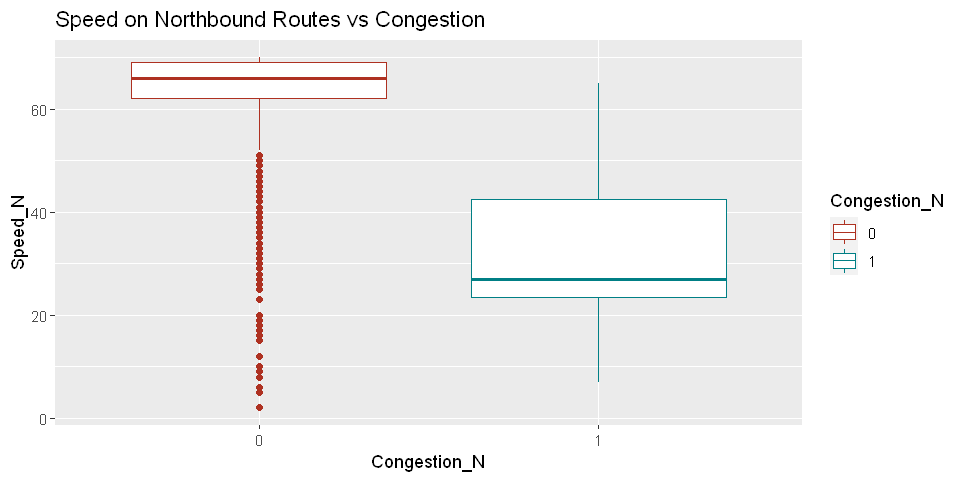

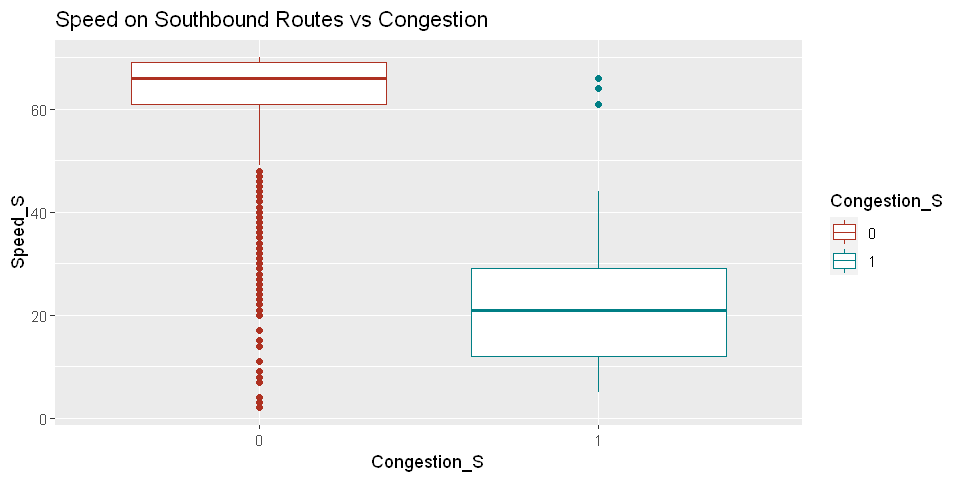

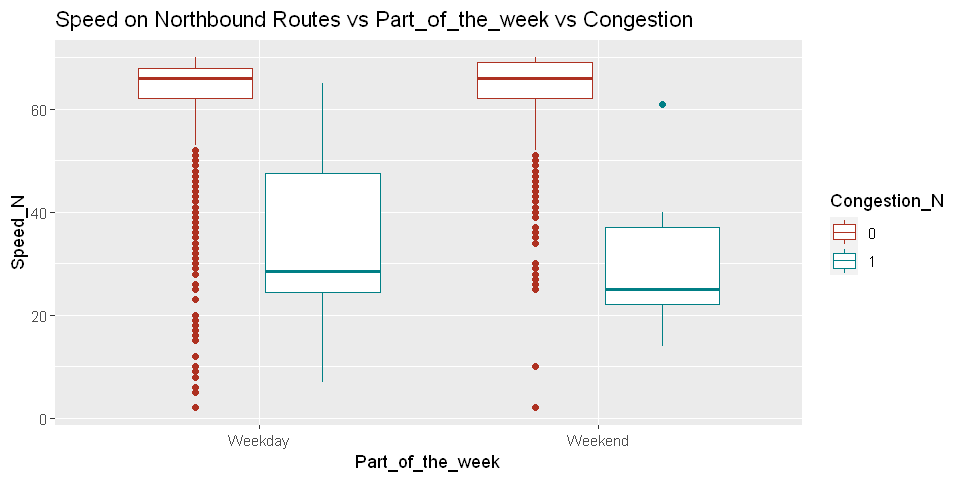

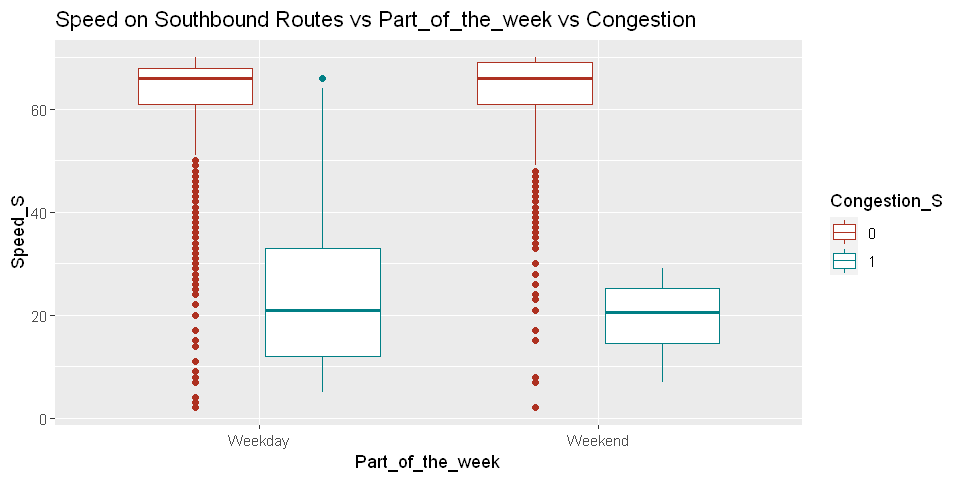

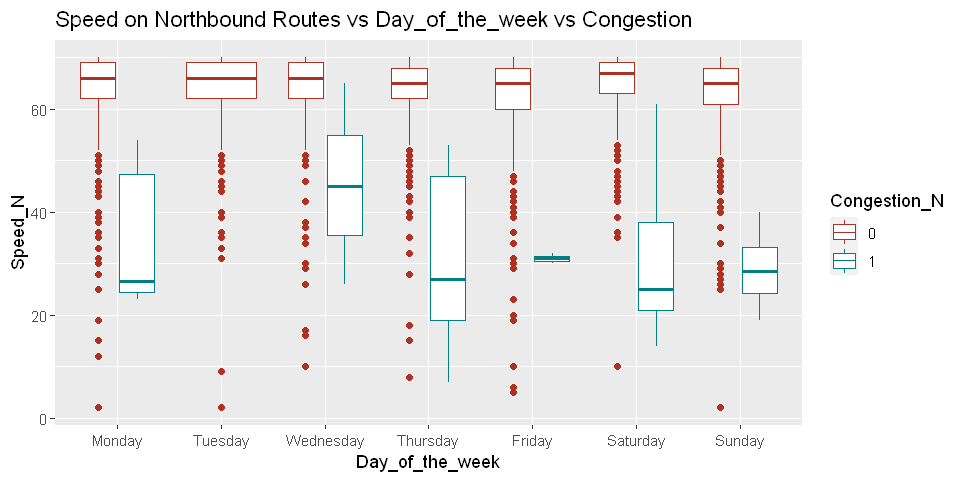

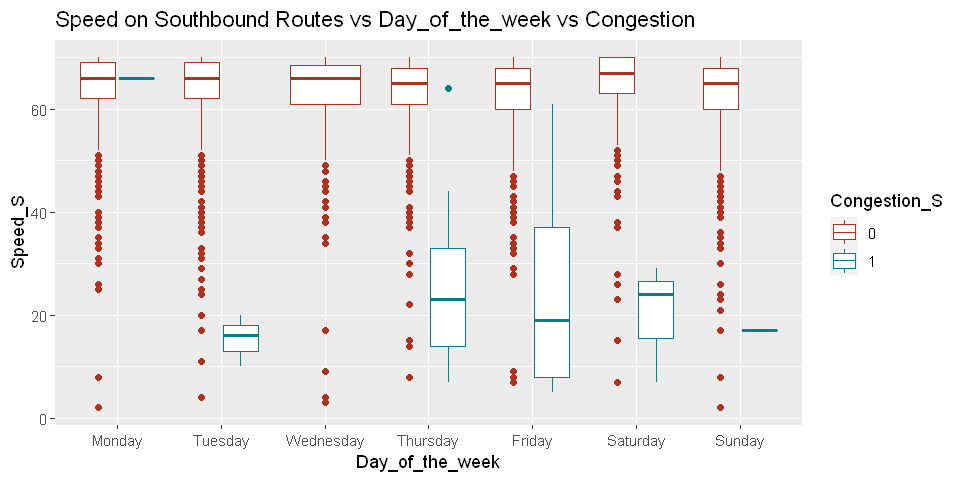

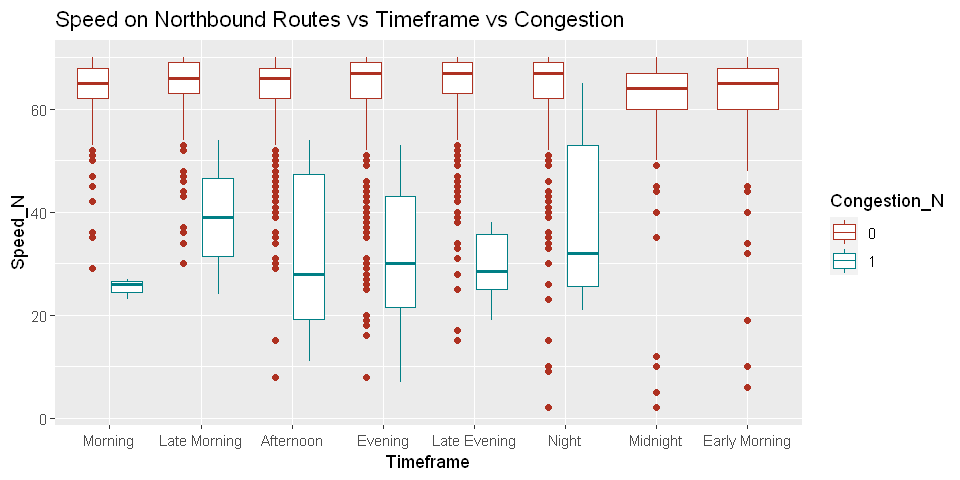

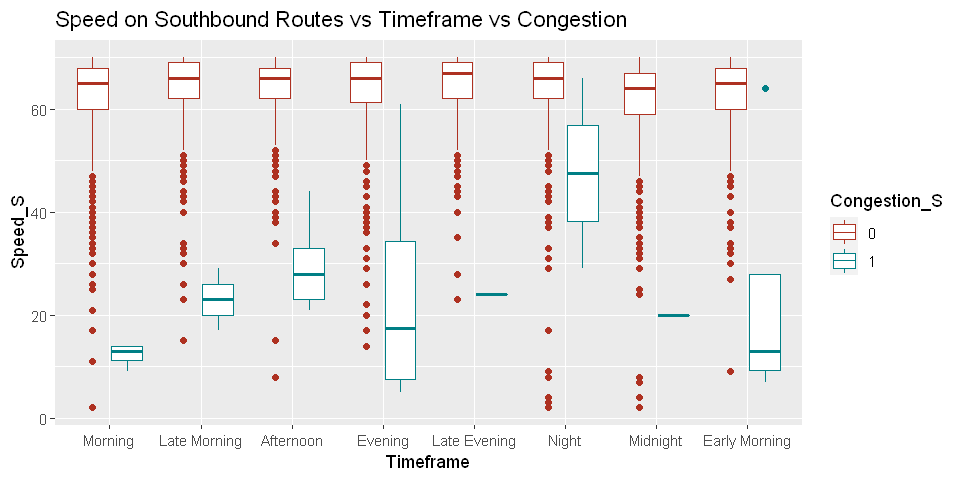

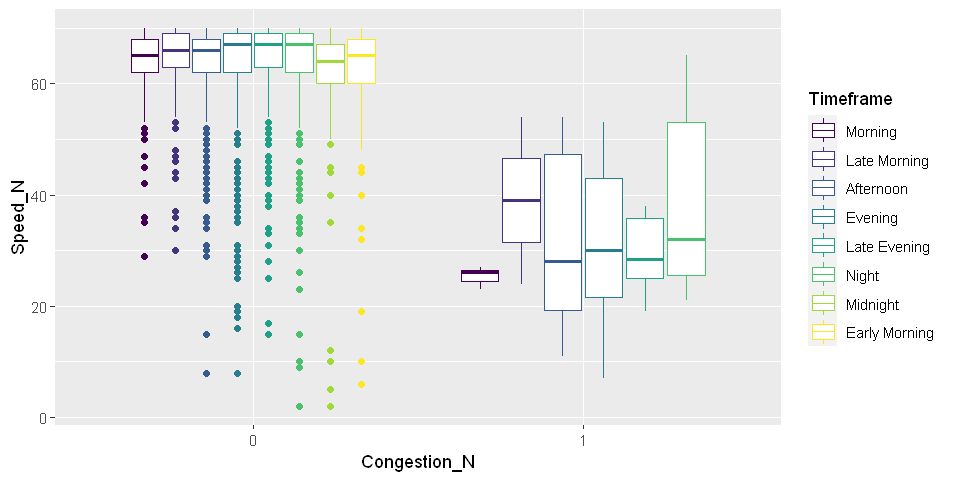

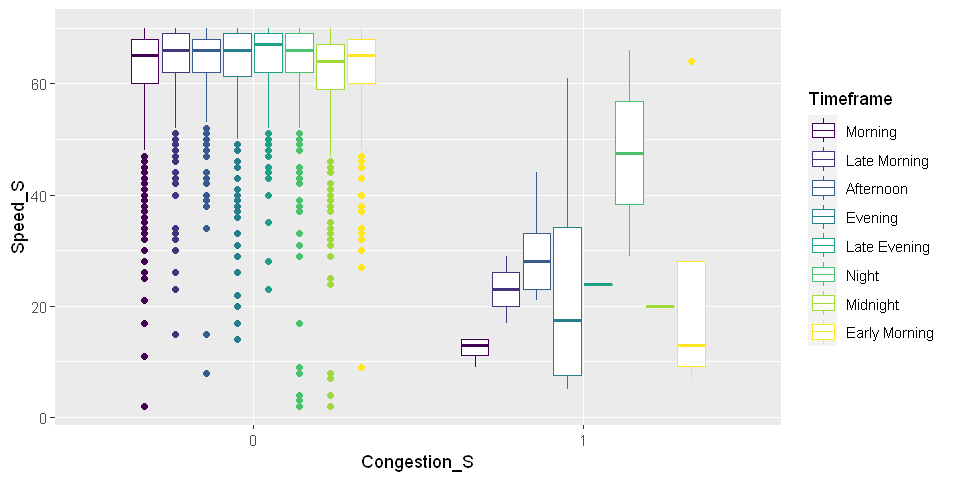

In [675]:
ggplot(dataset, aes(Congestion_N, Speed_N, color = Congestion_N))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Northbound Routes vs Congestion')

ggplot(dataset, aes(Congestion_S, Speed_S, color = Congestion_S))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Southbound Routes vs Congestion')

ggplot(dataset, aes(Part_of_the_week, Speed_N, color=Congestion_N))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Northbound Routes vs Part_of_the_week vs Congestion')

ggplot(dataset, aes(Part_of_the_week, Speed_S, color=Congestion_S))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Southbound Routes vs Part_of_the_week vs Congestion')

ggplot(dataset, aes(Day_of_the_week, Speed_N, color=Congestion_N))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Northbound Routes vs Day_of_the_week vs Congestion')

ggplot(dataset, aes(Day_of_the_week, Speed_S, color=Congestion_S))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Southbound Routes vs Day_of_the_week vs Congestion')

ggplot(dataset, aes(Timeframe, Speed_N, color=Congestion_N))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Northbound Routes vs Timeframe vs Congestion')

ggplot(dataset, aes(Timeframe, Speed_S, color=Congestion_S))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Southbound Routes vs Timeframe vs Congestion')

ggplot(dataset, aes(Congestion_N, Speed_N, color=Timeframe)) +
geom_boxplot()

ggplot(dataset, aes(Congestion_S, Speed_S, color=Timeframe)) +
geom_boxplot()


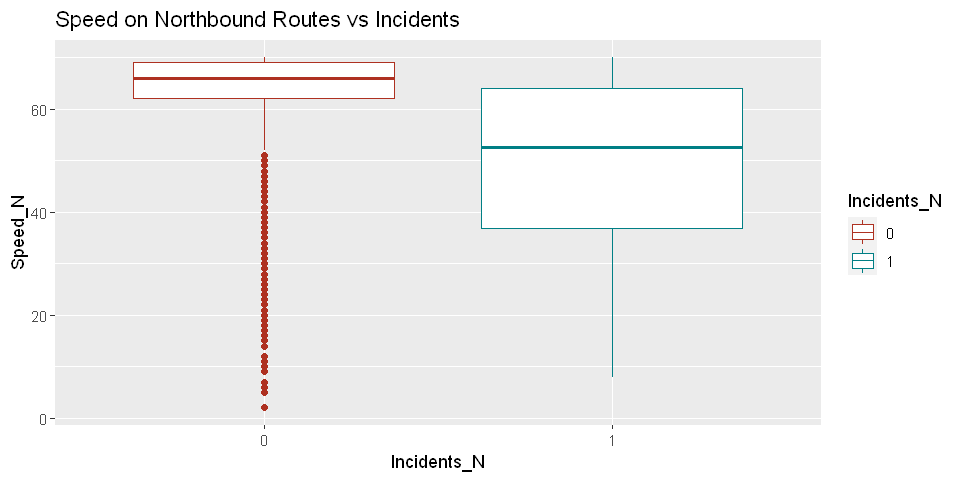

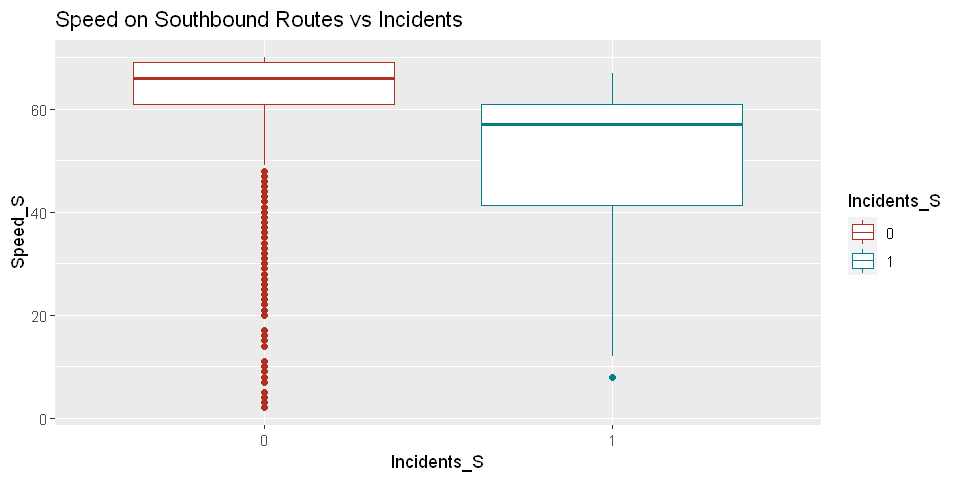

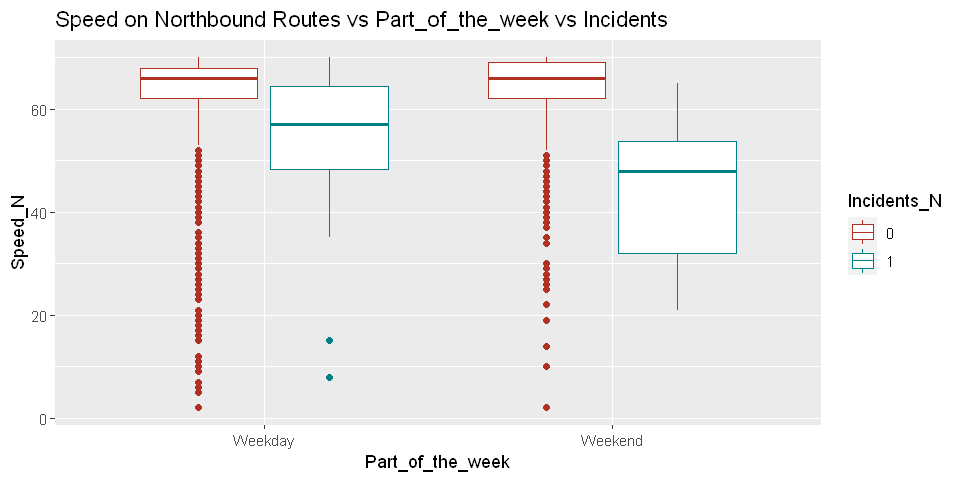

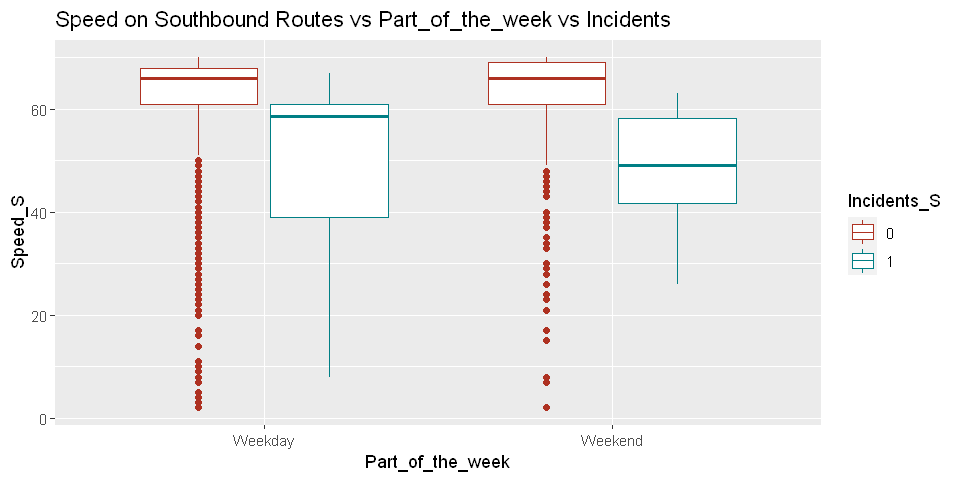

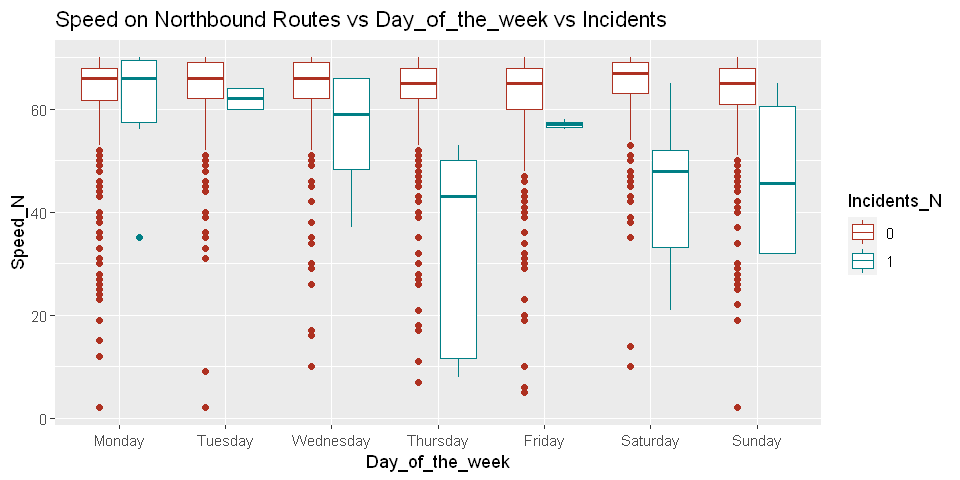

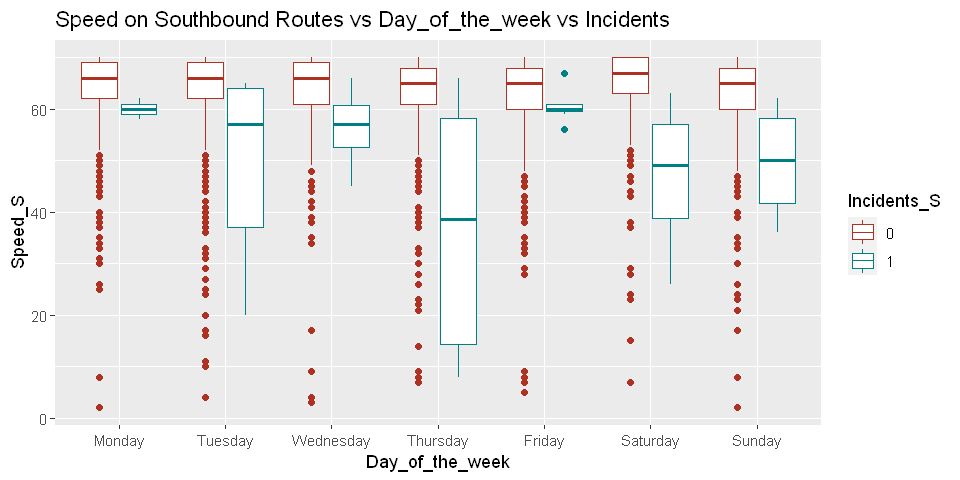

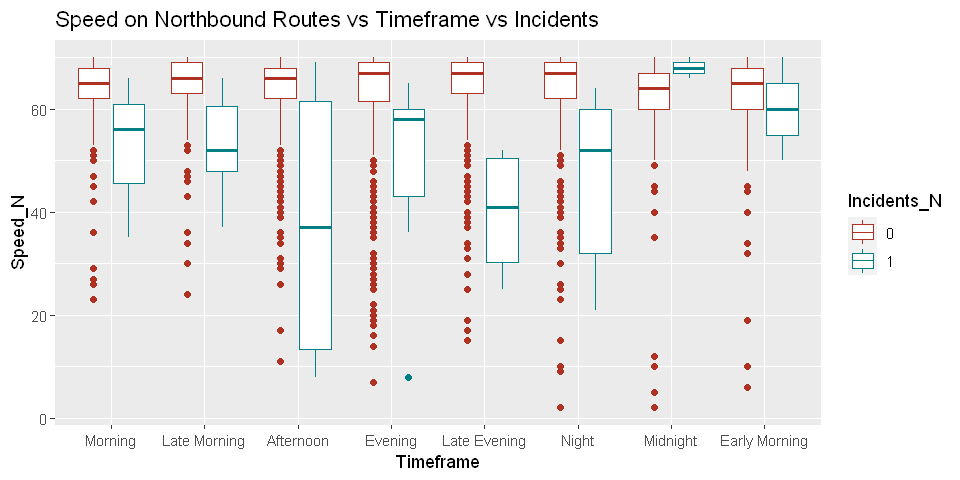

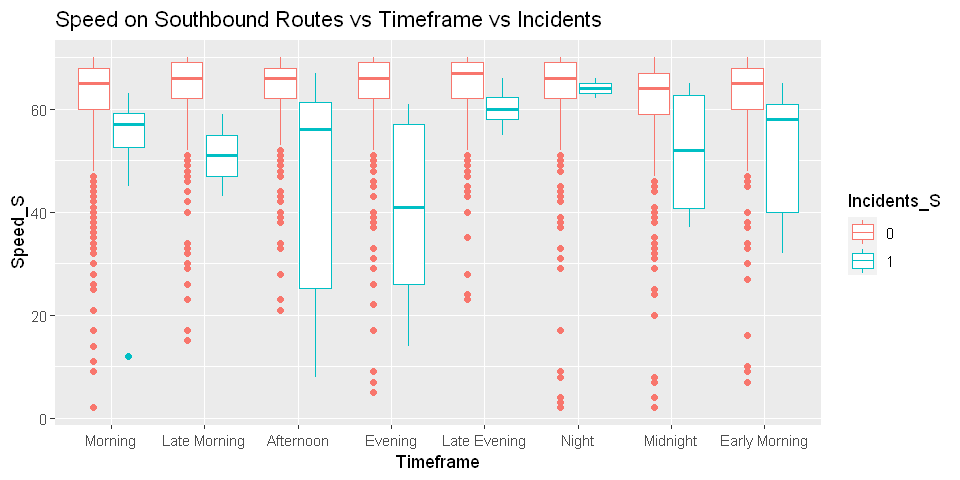

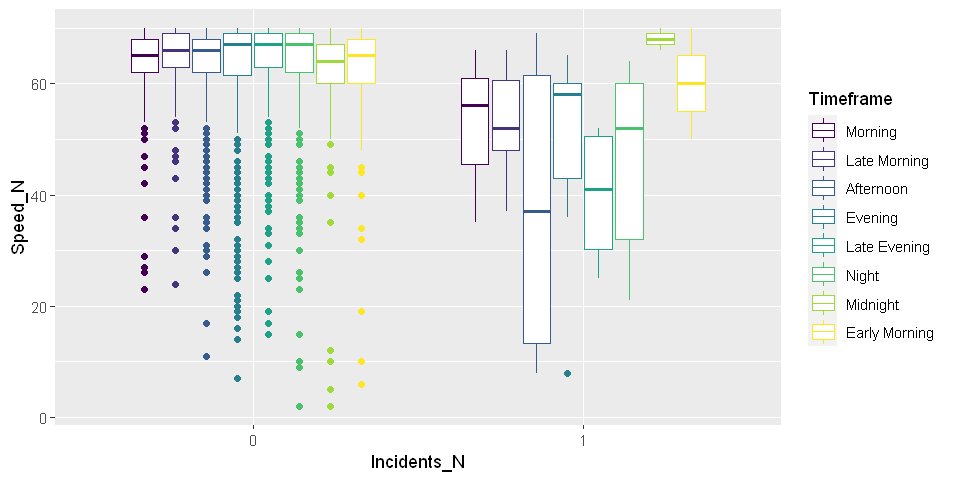

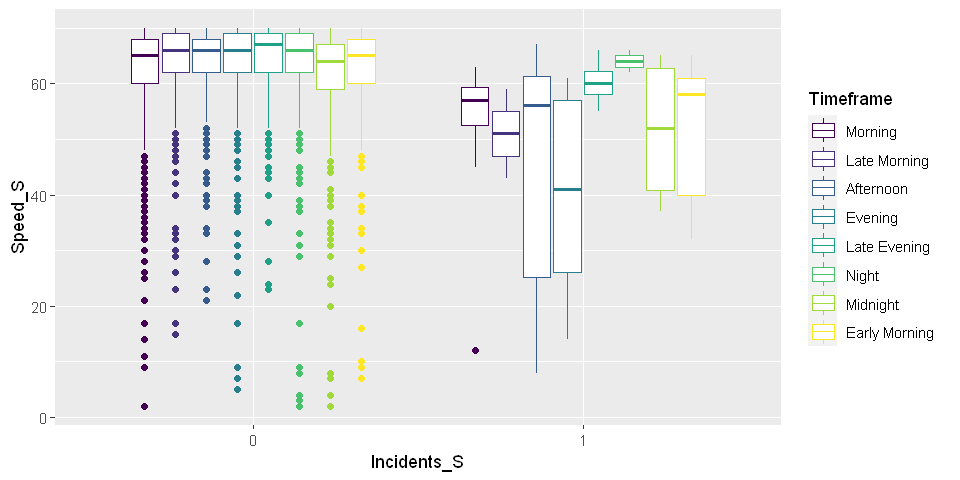

In [677]:
ggplot(dataset, aes(Incidents_N, Speed_N, color = Incidents_N))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Northbound Routes vs Incidents')

ggplot(dataset, aes(Incidents_S, Speed_S, color = Incidents_S))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Southbound Routes vs Incidents')

ggplot(dataset, aes(Part_of_the_week, Speed_N, color=Incidents_N))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Northbound Routes vs Part_of_the_week vs Incidents')

ggplot(dataset, aes(Part_of_the_week, Speed_S, color=Incidents_S))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Southbound Routes vs Part_of_the_week vs Incidents')

ggplot(dataset, aes(Day_of_the_week, Speed_N, color=Incidents_N))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Northbound Routes vs Day_of_the_week vs Incidents')

ggplot(dataset, aes(Day_of_the_week, Speed_S, color=Incidents_S))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speed on Southbound Routes vs Day_of_the_week vs Incidents')

ggplot(dataset, aes(Timeframe, Speed_N, color=Incidents_N))+
geom_boxplot() +
labs(title = 'Speed on Northbound Routes vs Timeframe vs Incidents')

ggplot(dataset, aes(Timeframe, Speed_S, color=Incidents_S))+
geom_boxplot() +
labs(title = 'Speed on Southbound Routes vs Timeframe vs Incidents')

ggplot(dataset, aes(Incidents_N, Speed_N, color=Timeframe)) +
geom_boxplot()

ggplot(dataset, aes(Incidents_S, Speed_S, color=Timeframe)) +
geom_boxplot()

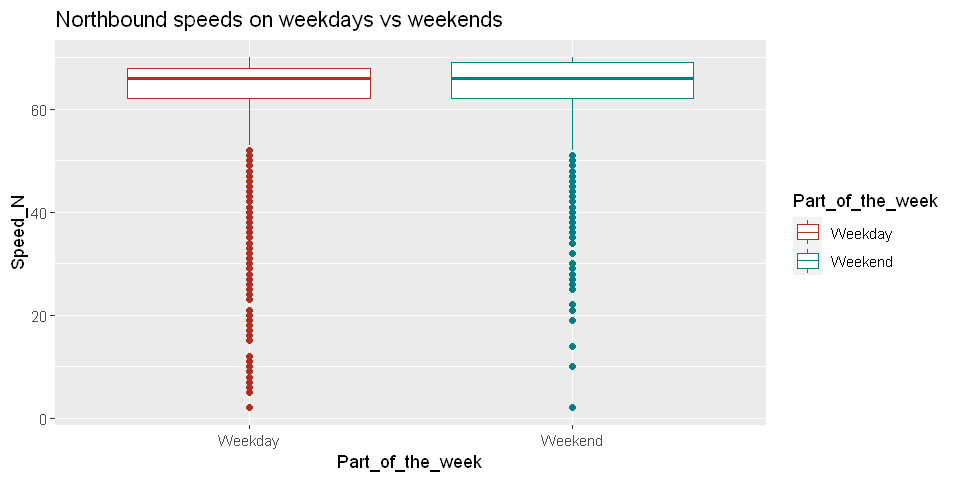

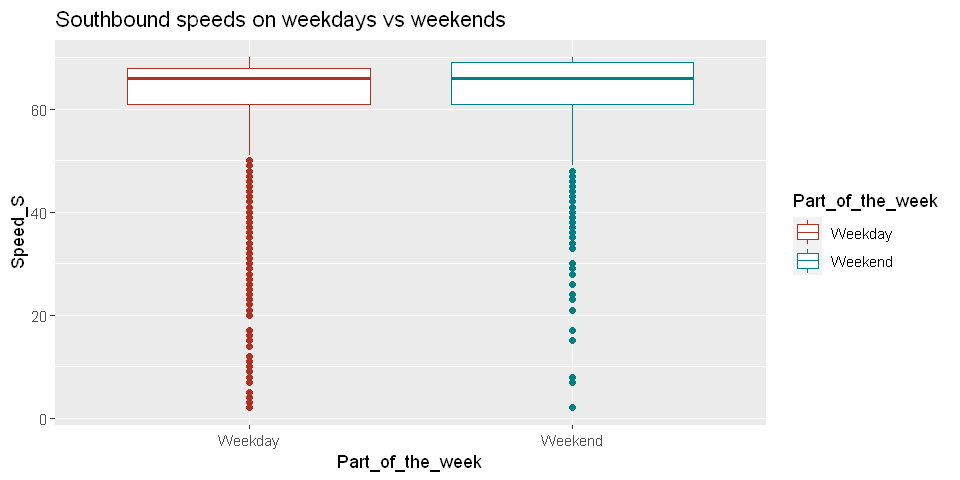

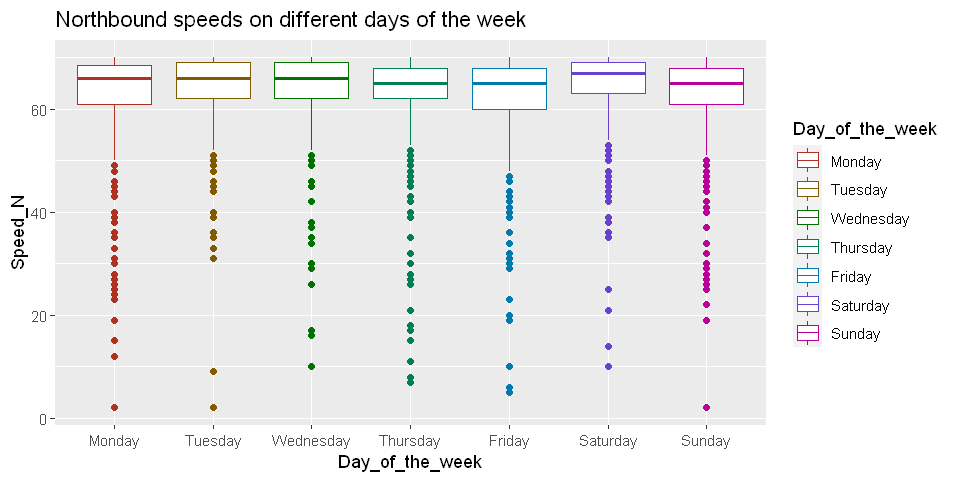

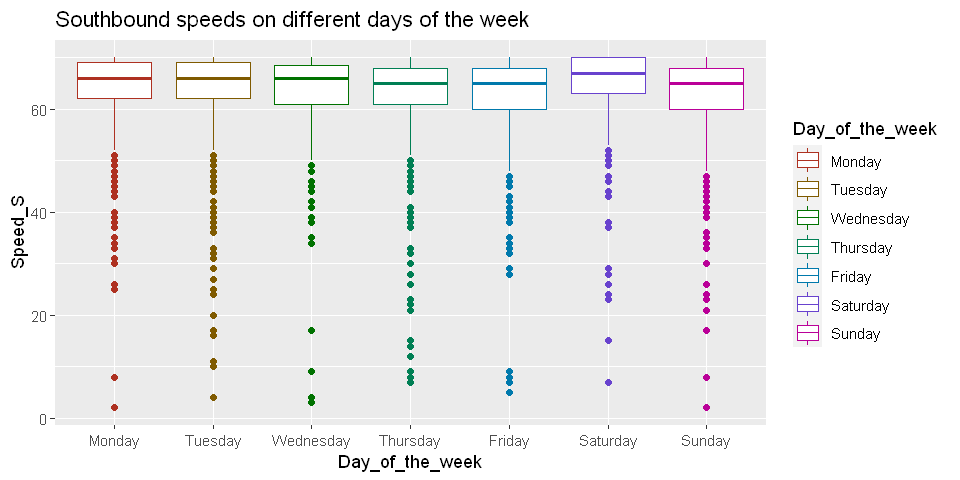

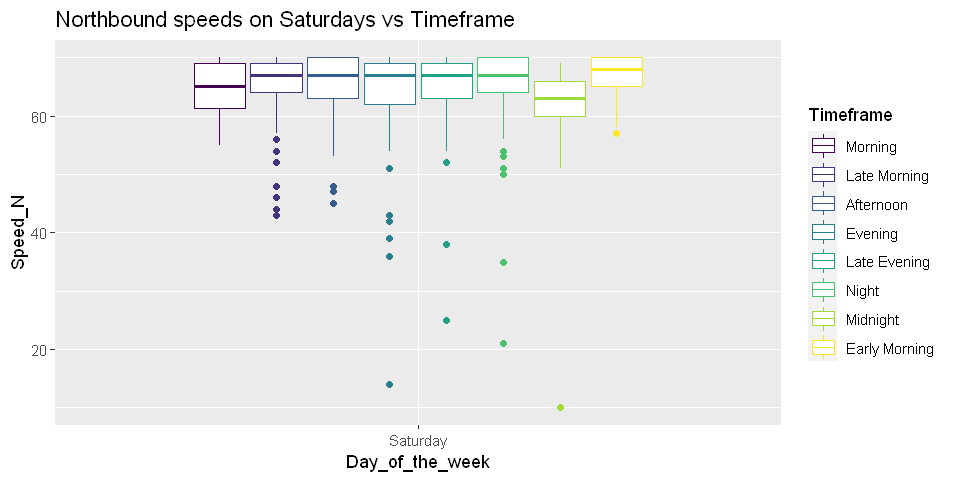

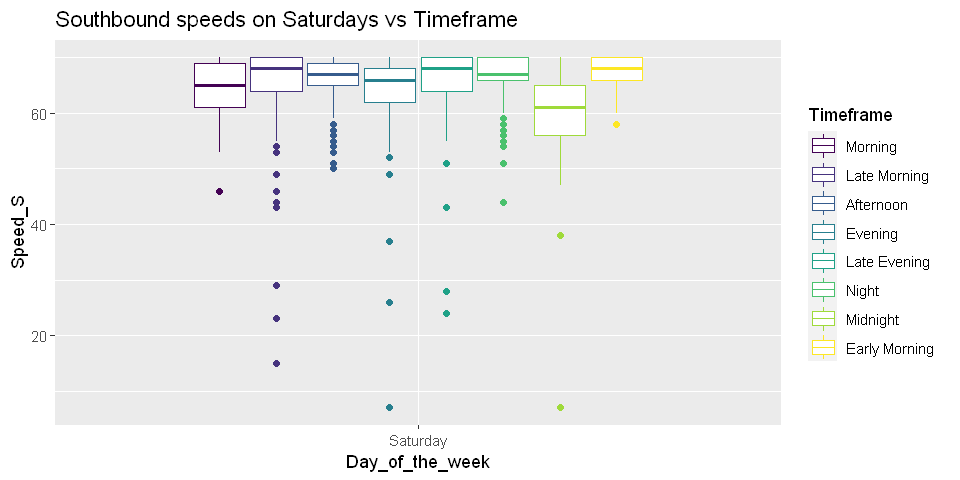

In [678]:
ggplot(dataset, aes(Part_of_the_week, Speed_N, color=Part_of_the_week))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Northbound speeds on weekdays vs weekends')

ggplot(dataset, aes(Part_of_the_week, Speed_S, color=Part_of_the_week))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Southbound speeds on weekdays vs weekends')

ggplot(dataset, aes(Day_of_the_week, Speed_N, color=Day_of_the_week)) +
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Northbound speeds on different days of the week')

ggplot(dataset, aes(Day_of_the_week, Speed_S, color=Day_of_the_week)) +
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Southbound speeds on different days of the week')

# Exploring Saturdays
saturday_speeds <- dataset %>%
subset(Day_of_the_week == 'Saturday')

ggplot(saturday_speeds, aes(Day_of_the_week, Speed_N, color=Timeframe)) +
geom_boxplot() +
labs(title = 'Northbound speeds on Saturdays vs Timeframe')

ggplot(saturday_speeds, aes(Day_of_the_week, Speed_S, color=Timeframe)) +
geom_boxplot() +
labs(title = 'Southbound speeds on Saturdays vs Timeframe')

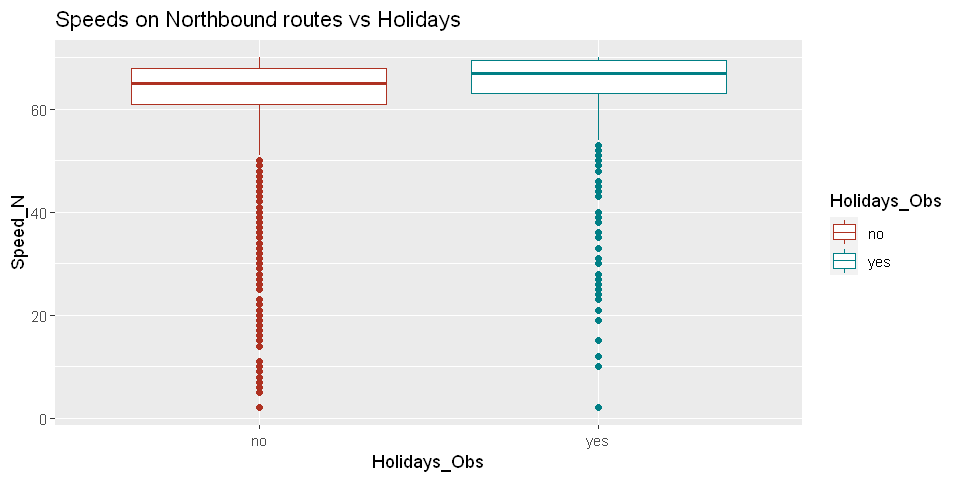

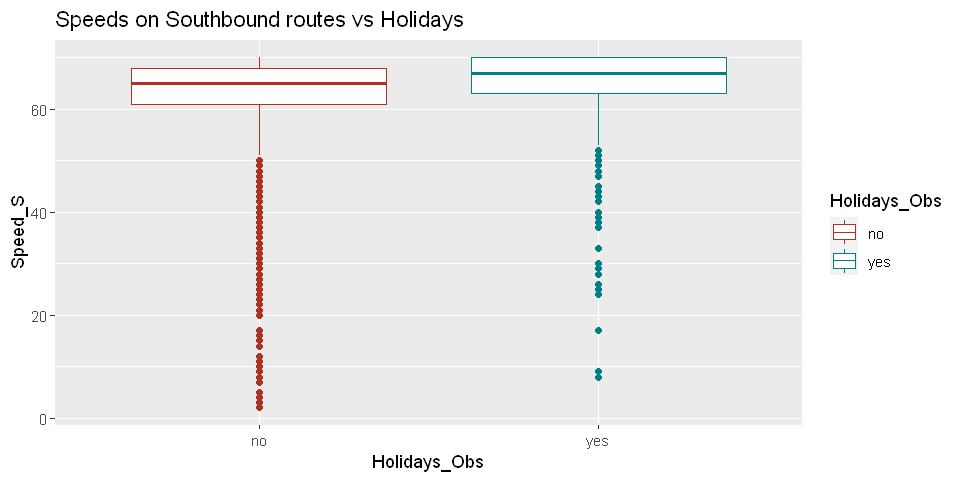

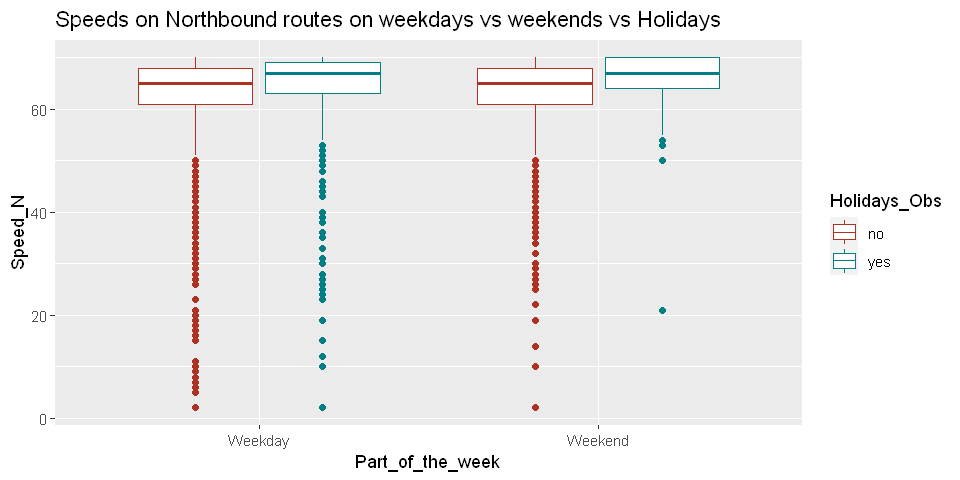

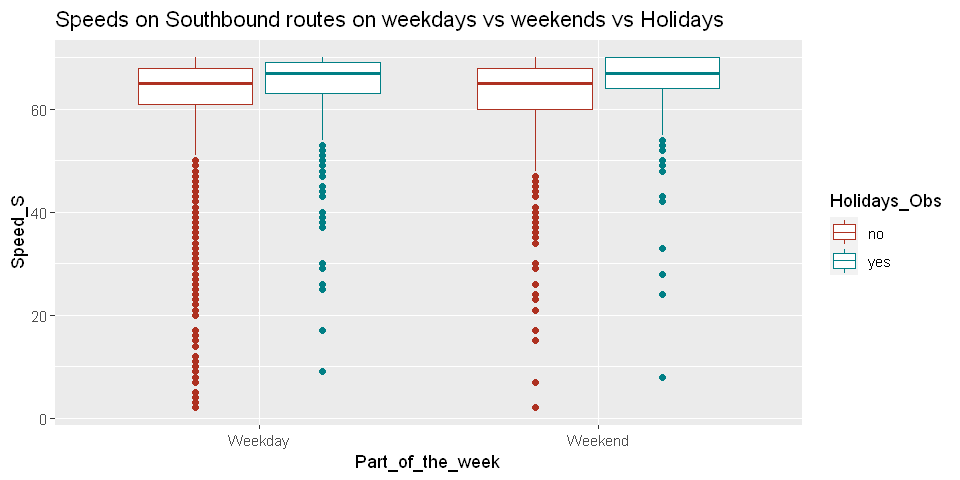

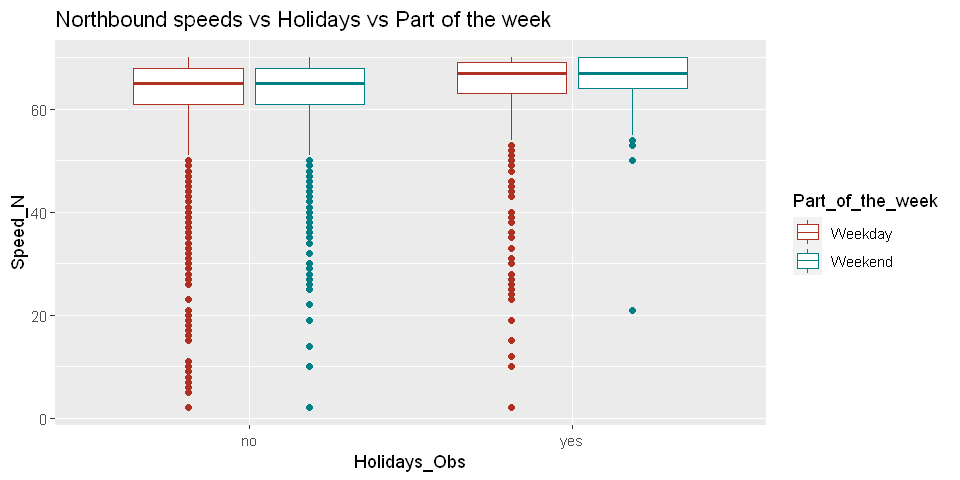

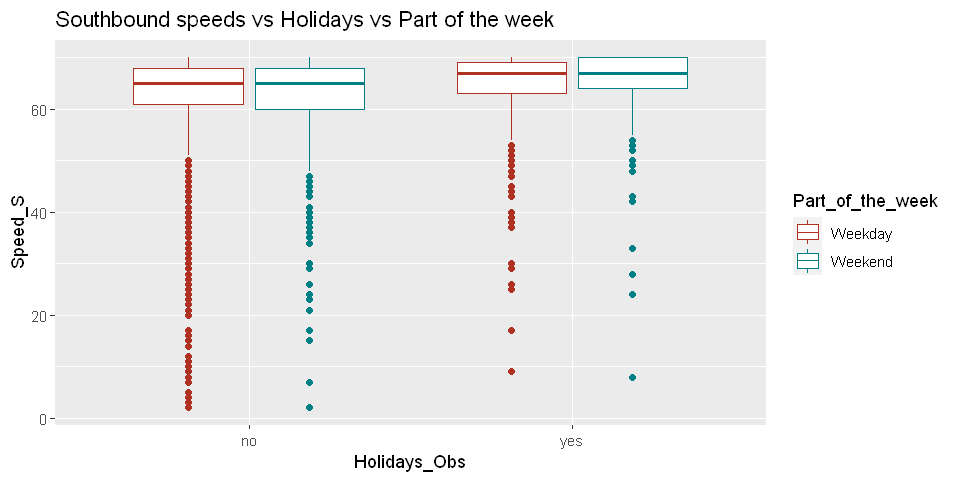

In [679]:
ggplot(dataset, aes(Holidays_Obs, Speed_N, color=Holidays_Obs))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speeds on Northbound routes vs Holidays')

ggplot(dataset, aes(Holidays_Obs, Speed_S, color=Holidays_Obs))+
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speeds on Southbound routes vs Holidays')

ggplot(dataset, aes(Part_of_the_week, Speed_N, color=Holidays_Obs)) +
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speeds on Northbound routes on weekdays vs weekends vs Holidays')

ggplot(dataset, aes(Part_of_the_week, Speed_S, color=Holidays_Obs)) +
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Speeds on Southbound routes on weekdays vs weekends vs Holidays')

ggplot(dataset, aes(Holidays_Obs, Speed_N, color=Part_of_the_week)) +
geom_boxplot() + 
scale_color_hue(l=40) +
labs(title = 'Northbound speeds vs Holidays vs Part of the week')

ggplot(dataset, aes(Holidays_Obs, Speed_S, color=Part_of_the_week)) +
geom_boxplot() +
scale_color_hue(l=40) +
labs(title = 'Southbound speeds vs Holidays vs Part of the week')


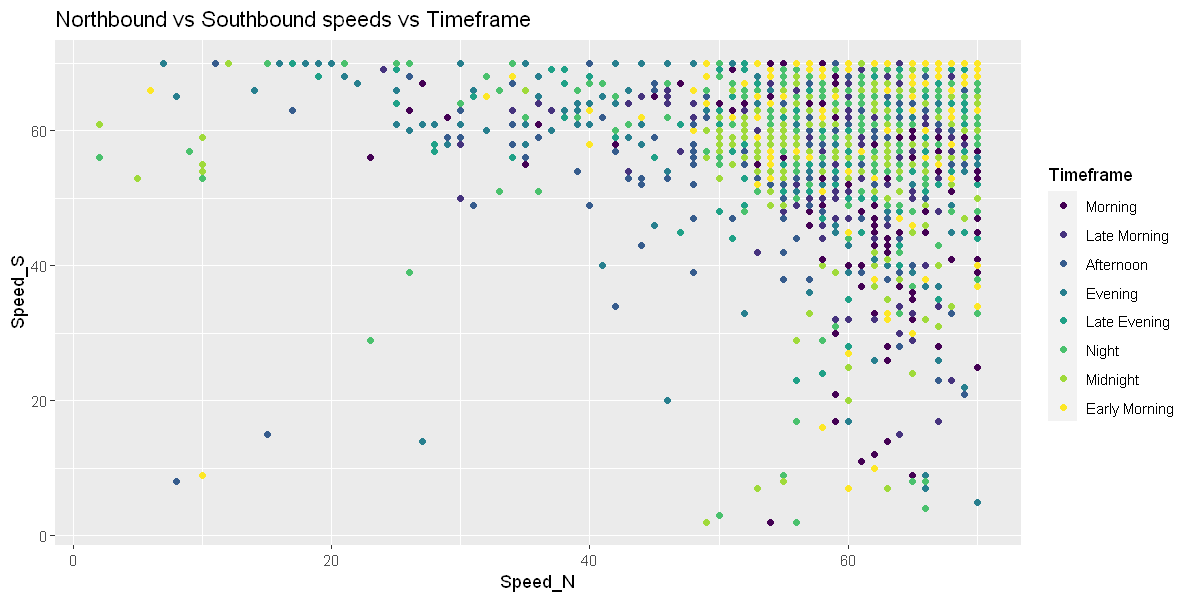

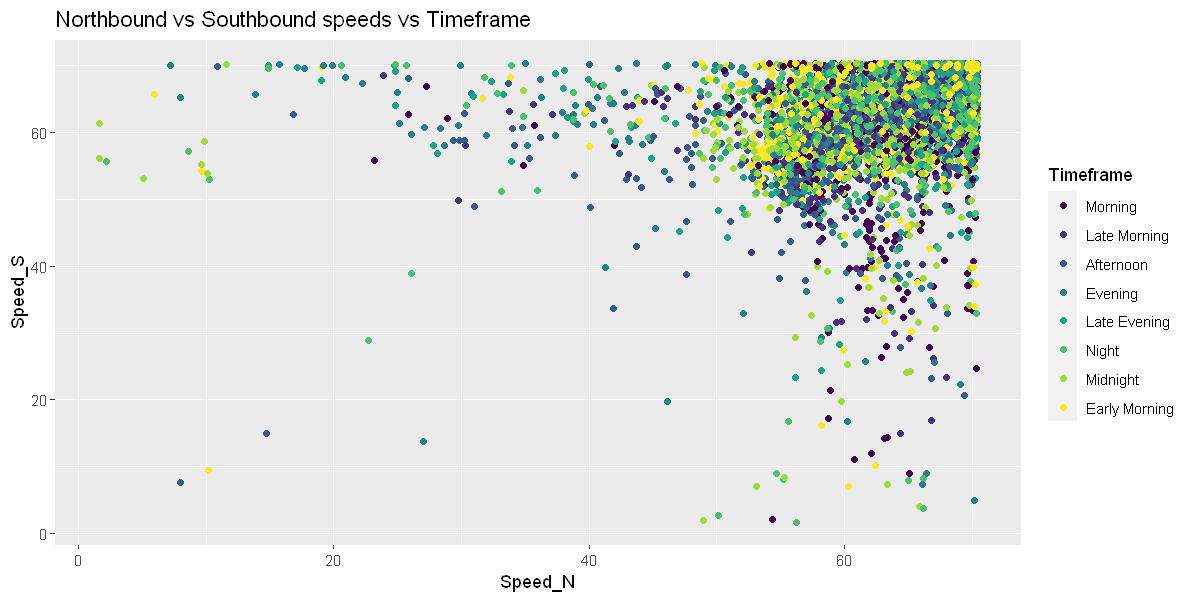

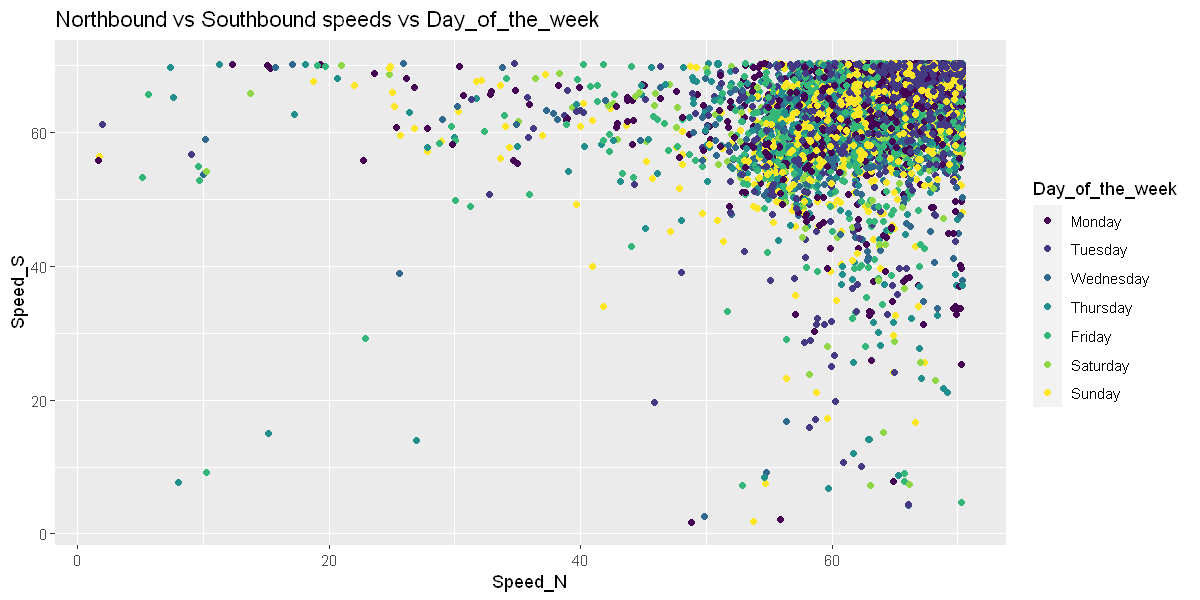

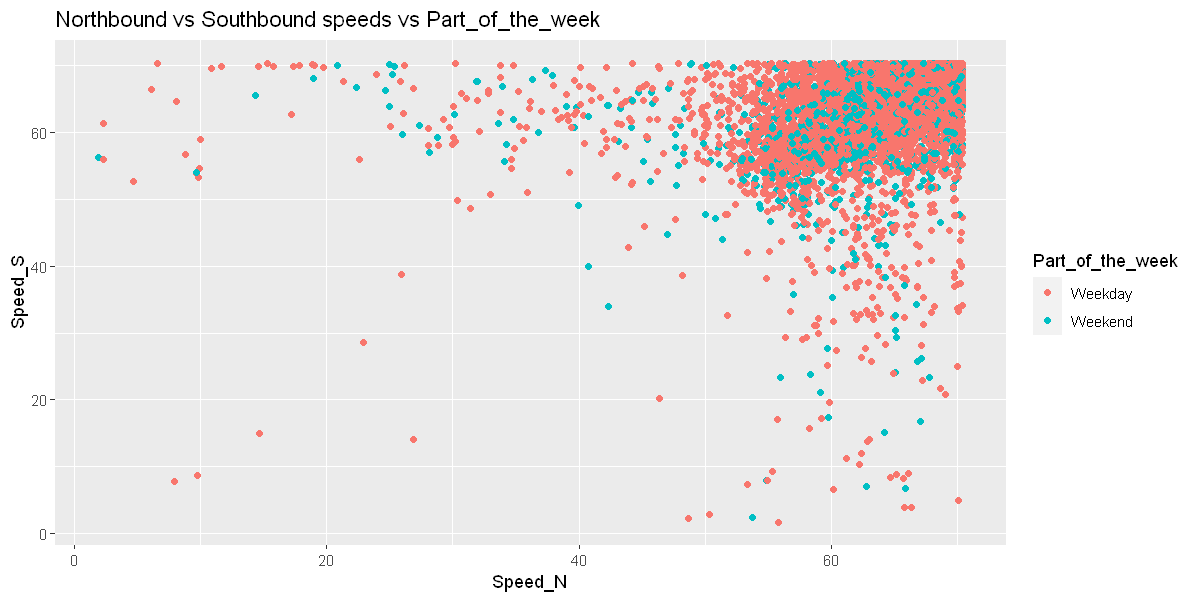

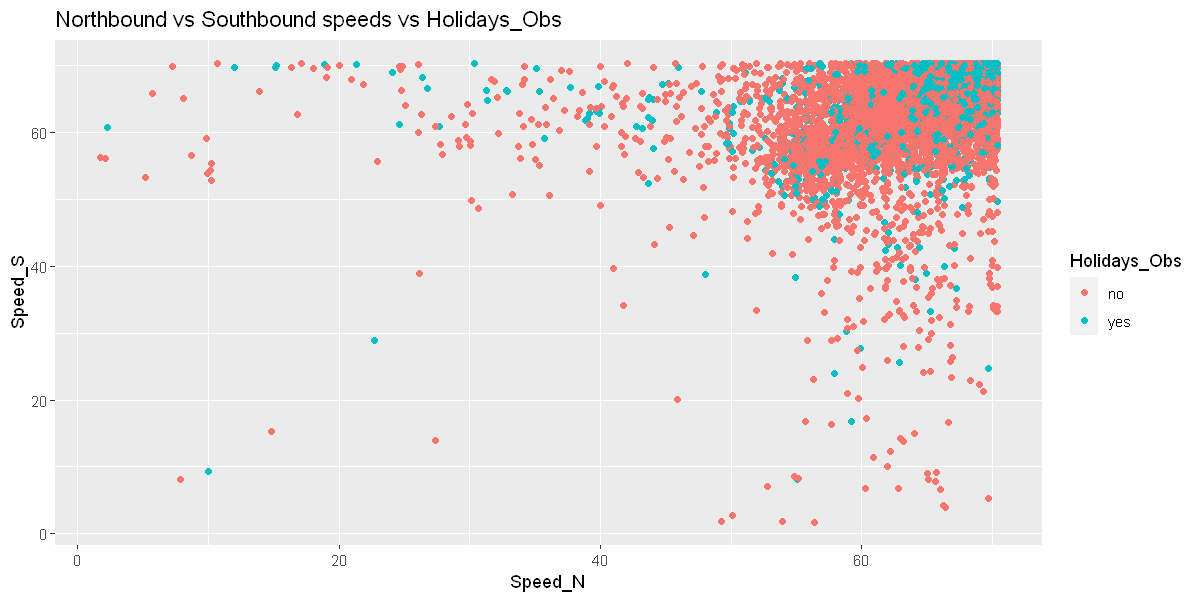

In [680]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(dataset, aes(Speed_N, Speed_S, color = Timeframe)) +
geom_point() +
labs(title = 'Northbound vs Southbound speeds vs Timeframe') # overplotting; consider geom_jitter()

# using geom_jitter() 
ggplot(dataset, aes(Speed_N, Speed_S, color = Timeframe)) +
geom_jitter() +
labs(title = 'Northbound vs Southbound speeds vs Timeframe')

ggplot(dataset, aes(Speed_N, Speed_S, color = Day_of_the_week)) +
geom_jitter() +
labs(title = 'Northbound vs Southbound speeds vs Day_of_the_week')

ggplot(dataset, aes(Speed_N, Speed_S, color = Part_of_the_week)) +
geom_jitter() +
labs(title = 'Northbound vs Southbound speeds vs Part_of_the_week')

ggplot(dataset, aes(Speed_N, Speed_S, color = Holidays_Obs)) +
geom_jitter() +
labs(title = 'Northbound vs Southbound speeds vs Holidays_Obs')

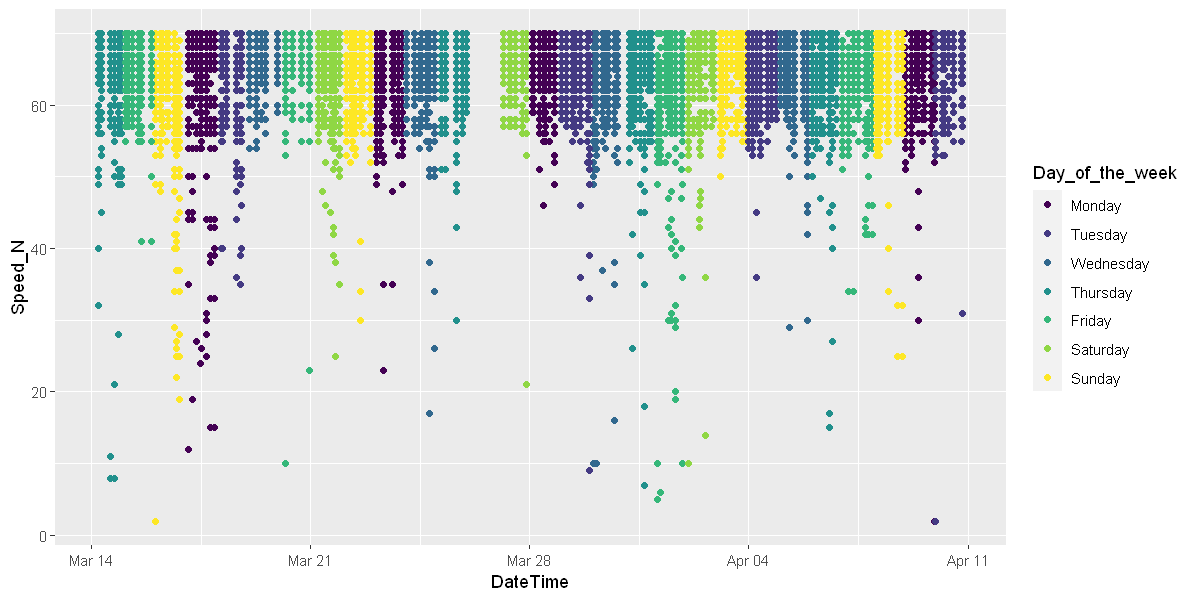

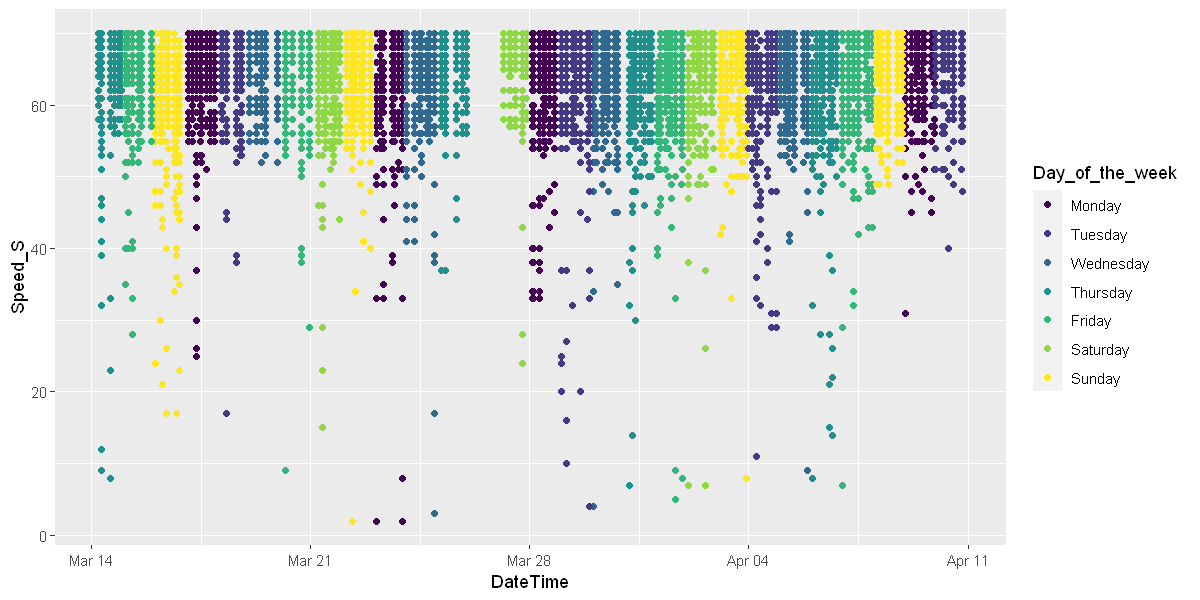

In [683]:
# Checking for patterns in DateTime
ggplot(dataset, aes(DateTime, Speed_N, color=Day_of_the_week)) +
geom_point()

ggplot(dataset, aes(DateTime, Speed_S, color=Day_of_the_week)) +
geom_point()

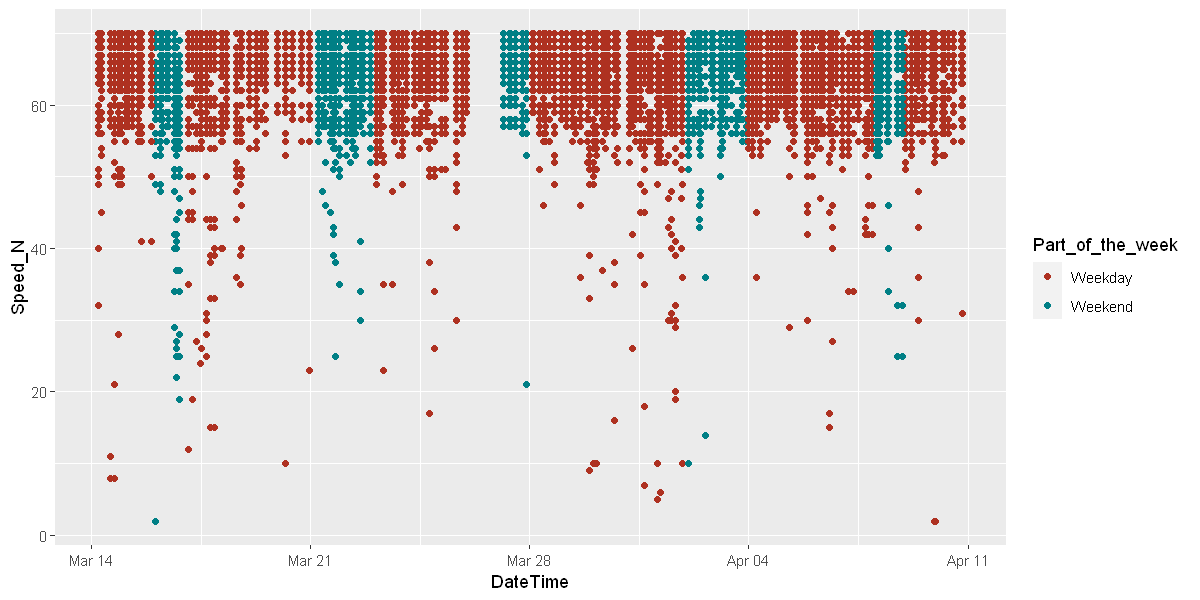

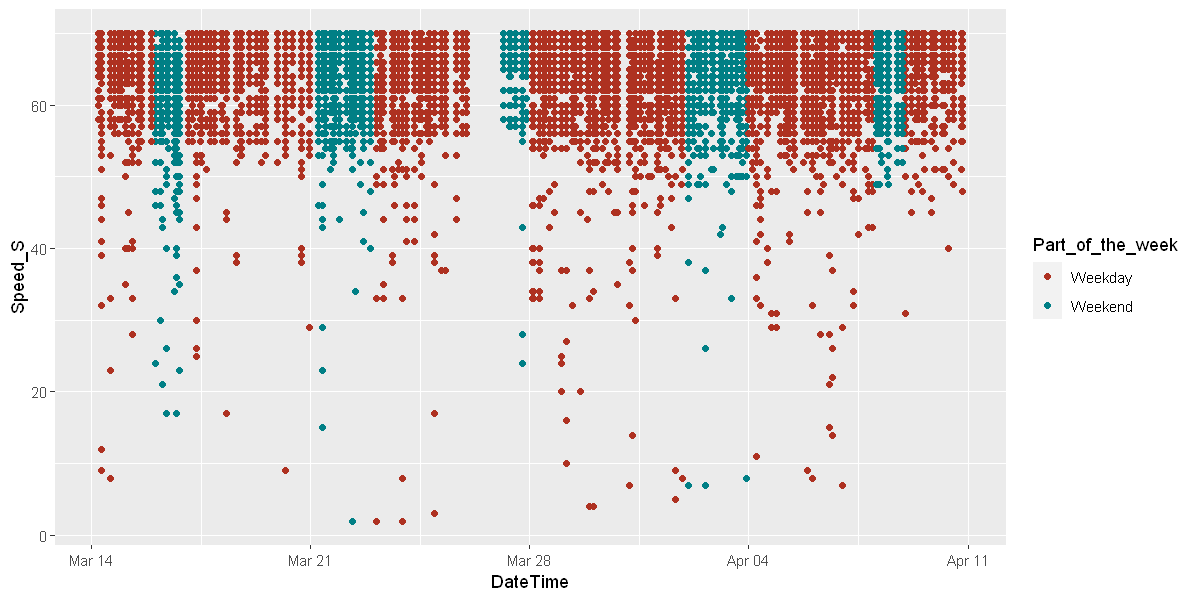

In [684]:
ggplot(dataset, aes(DateTime, Speed_N, color=Part_of_the_week)) +
scale_color_hue(l=40) +
geom_point()

ggplot(dataset, aes(DateTime, Speed_S, color=Part_of_the_week)) +
scale_color_hue(l=40) +
geom_point()

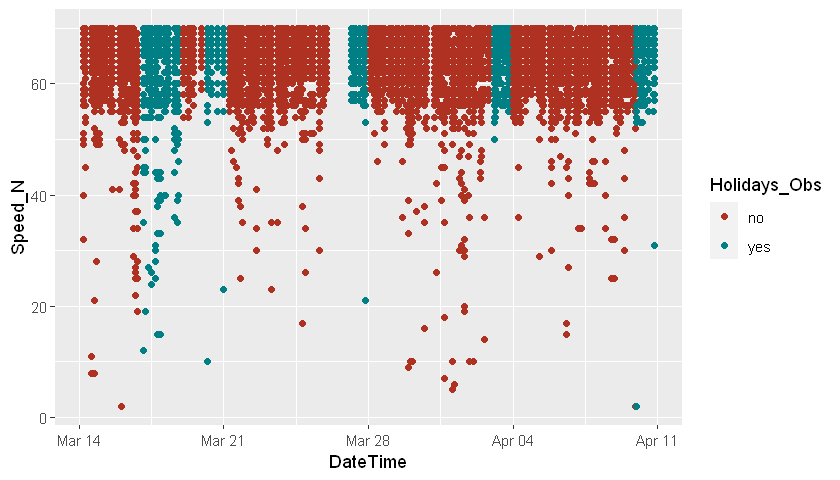

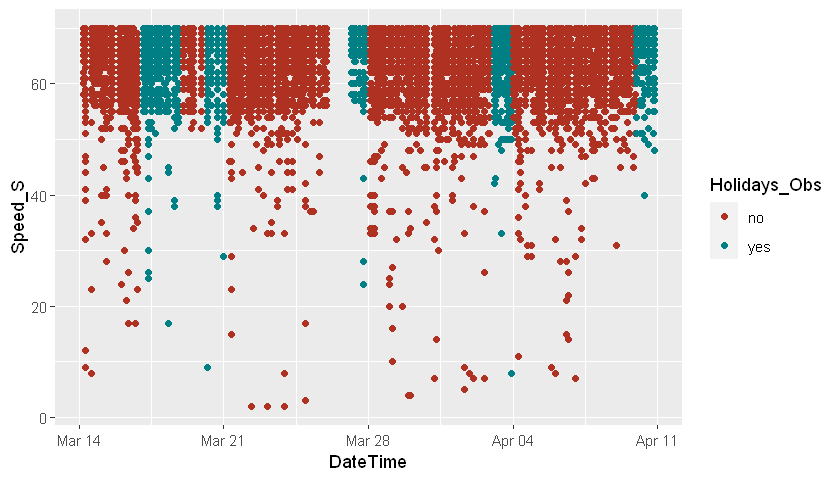

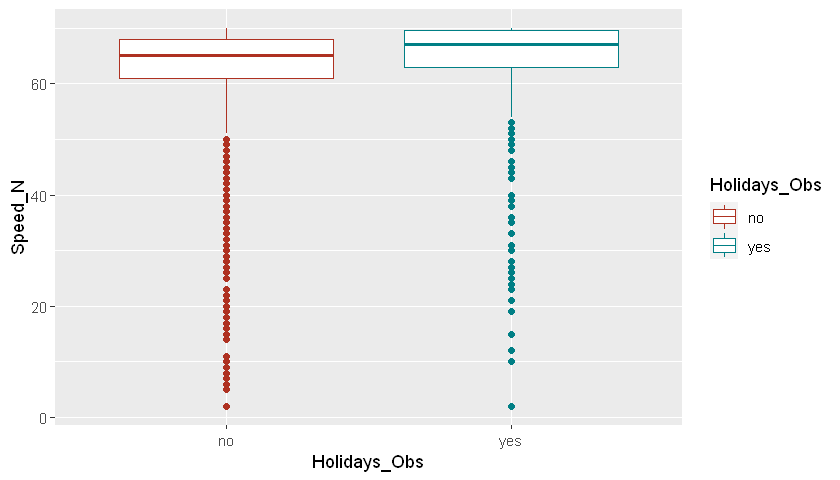

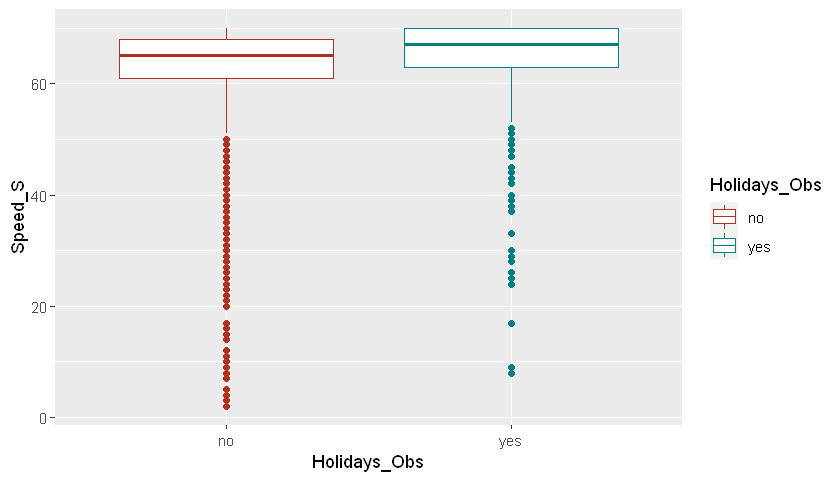

In [685]:
options(repr.plot.width=7, repr.plot.height=4)
ggplot(dataset, aes(DateTime, Speed_N, color=Holidays_Obs)) +
scale_color_hue(l=40) +
geom_point()

ggplot(dataset, aes(DateTime, Speed_S, color=Holidays_Obs)) +
scale_color_hue(l=40) +
geom_point() 

ggplot(dataset, aes(Holidays_Obs, Speed_N, color = Holidays_Obs)) +
scale_color_hue(l=40) +
geom_boxplot()

ggplot(dataset, aes(Holidays_Obs, Speed_S, color = Holidays_Obs)) +
scale_color_hue(l=40) +
geom_boxplot()

**Exploring average speeds**

In [788]:
average_speed_N <- read.csv('Northbound Average Speeds.csv', stringsAsFactors = FALSE)
average_speed_S <- read.csv('Southbound Average Speeds.csv', stringsAsFactors = FALSE)

In [789]:
str(average_speed_N)

'data.frame':	54 obs. of  31 variables:
 $ Road           : chr  "J1J2" "J2J4" "J4J5" "J5J6" ...
 $ X14.Mar        : num  68.8 64.5 65.2 66 68.3 ...
 $ X15.Mar        : num  67.2 67.8 68.8 70 68.2 ...
 $ X16.Mar        : num  65 58.9 55 63.6 54.2 ...
 $ X17.Mar        : num  68 68.6 69.8 55.5 37.2 ...
 $ X18.Mar        : num  69 68.7 67.5 68.8 54.3 ...
 $ X19.Mar        : num  68 68.8 69.2 69.6 69.8 64.4 62 67.4 65.6 62.4 ...
 $ X20.Mar        : num  69 67.2 68.8 67.5 66.2 ...
 $ X21.Mar        : num  67.6 68.9 66.3 67 64.4 ...
 $ X22.Mar        : num  65.4 66.6 67 65.6 66.9 ...
 $ X23.Mar        : num  67.4 65.4 66.2 66.2 61.5 ...
 $ X24.Mar        : num  69 68.4 67.7 66.6 57.4 ...
 $ X25.Mar        : num  68.6 69.8 69.2 64.8 63.8 63.6 57.6 61.8 61 60 ...
 $ X27.Mar        : num  64.8 64.8 65 69.7 65.8 ...
 $ X28.Mar        : num  67.3 69.3 68.6 68.1 64.4 ...
 $ X29.Mar        : num  64.9 67.3 66.1 62.9 61.2 ...
 $ X30.Mar        : num  65.4 66.3 68.6 65.4 57 ...
 $ X31.Mar        : n

In [790]:
head(average_speed_N)

Road,X14.Mar,X15.Mar,X16.Mar,X17.Mar,X18.Mar,X19.Mar,X20.Mar,X21.Mar,X22.Mar,...,X03.Apr,X04.Apr,X05.Apr,X06.Apr,X07.Apr,X08.Apr,X09.Apr,X10.Apr,April.Average,Overall.Average
J1J2,68.83333,67.16667,65.00000,68.000,69.00000,68.0,69.00,67.57143,65.42857,...,66.625,64.42857,66.875,66.28571,65.85714,67.28571,66.125,67.14286,66.20000,66.76344
J2J4,64.50000,67.83333,58.87500,68.625,68.66667,68.8,67.25,68.85714,66.57143,...,66.500,65.28571,66.500,67.28571,66.71429,68.42857,66.250,66.71429,66.76000,66.83871
J4J5,65.16667,68.83333,55.00000,69.750,67.50000,69.2,68.75,66.28571,67.00000,...,68.375,67.85714,69.125,67.71429,65.28571,68.71429,67.500,68.14286,67.88000,67.10160
J5J6,66.00000,70.00000,63.55556,55.500,68.83333,69.6,67.50,67.00000,65.57143,...,67.125,68.42857,68.875,66.71429,66.71429,66.57143,65.250,69.00000,67.24000,66.33690
J6J6A,68.33333,68.16667,54.22222,37.250,54.33333,69.8,66.25,64.42857,66.85714,...,63.125,62.28571,63.500,62.71429,60.28571,63.85714,62.250,64.71429,61.85333,60.92432
J6AJ7,61.83333,62.66667,50.77778,45.375,44.66667,64.4,66.00,60.85714,62.85714,...,64.625,64.71429,65.500,60.57143,58.42857,62.28571,65.625,66.85714,63.09333,60.72727


In [791]:
sum(is.na(average_speed_N))
sum(is.na(average_speed_S))

[1] 0

[1] 0

In [792]:
#Re-code column names as names starting with numbers was problematic
names = c('Road','March_14', 'March_15', 'March_16', 'March_17', 'March_18', 'March_19', 'March_20', 'March_21', 'March_22',
         'March_23', 'March_24', 'March_25', 'March_27', 'March_28', 'March_29', 'March_30', 'March_31', 'March_Average',
          'April_01', 'April_02', 'April_03', 'April_04', 'April_05', 'April_06', 'April_07', 'April_08', 'April_09', 
          'April_10', 'April_Average', 'Overall_Average')
colnames(average_speed_N) <- names
colnames(average_speed_S) <- names

In [793]:
head(average_speed_N)

Road,March_14,March_15,March_16,March_17,March_18,March_19,March_20,March_21,March_22,...,April_03,April_04,April_05,April_06,April_07,April_08,April_09,April_10,April_Average,Overall_Average
J1J2,68.83333,67.16667,65.00000,68.000,69.00000,68.0,69.00,67.57143,65.42857,...,66.625,64.42857,66.875,66.28571,65.85714,67.28571,66.125,67.14286,66.20000,66.76344
J2J4,64.50000,67.83333,58.87500,68.625,68.66667,68.8,67.25,68.85714,66.57143,...,66.500,65.28571,66.500,67.28571,66.71429,68.42857,66.250,66.71429,66.76000,66.83871
J4J5,65.16667,68.83333,55.00000,69.750,67.50000,69.2,68.75,66.28571,67.00000,...,68.375,67.85714,69.125,67.71429,65.28571,68.71429,67.500,68.14286,67.88000,67.10160
J5J6,66.00000,70.00000,63.55556,55.500,68.83333,69.6,67.50,67.00000,65.57143,...,67.125,68.42857,68.875,66.71429,66.71429,66.57143,65.250,69.00000,67.24000,66.33690
J6J6A,68.33333,68.16667,54.22222,37.250,54.33333,69.8,66.25,64.42857,66.85714,...,63.125,62.28571,63.500,62.71429,60.28571,63.85714,62.250,64.71429,61.85333,60.92432
J6AJ7,61.83333,62.66667,50.77778,45.375,44.66667,64.4,66.00,60.85714,62.85714,...,64.625,64.71429,65.500,60.57143,58.42857,62.28571,65.625,66.85714,63.09333,60.72727


In [794]:
average_speed_N$Road

[1] "J1J2"          "J2J4"          "J4J5"          "J5J6"         
 [5] "J6J6A"         "J6AJ7"         "J7J8"          "J8J9"         
 [9] "J9J10"         "J10J11"        "J11J11A"       "J11AJ12"      
[13] "J12J13"        "J13J14"        "J14J15"        "J15J15A"      
[17] "J15AJ16"       "J16J17"        "J17J18"        "J18J19"       
[21] "J19J20"        "J20J21"        "J21J21A"       "J21AJ22"      
[25] "J22J23"        "J23J23A"       "J23AJ24"       "J24J24A"      
[29] "J24AJ25"       "J25J26"        "J26J27"        "J27J28"       
[33] "J28J29"        "J29J29A"       "J29AJ30"       "J30J31"       
[37] "J31J32"        "J32J33"        "J33J34"        "J34J35"       
[41] "J35J35A"       "J35AJ36"       "J36J37"        "J37J38"       
[45] "J38J39"        "J39J40"        "J40J41"        "J41J42"       
[49] "J42J43/44"     "J43/44J45"     "J45J46"        "J46J47"       
[53] "J47J48"        "Daily Average"

In [795]:
average_speed_S$Road

[1] "J48J47"        "J47J46"        "J46J45"        "J45J44/43"    
 [5] "J44/43J42"     "J42J41"        "J41J40"        "J40J39"       
 [9] "J39J38"        "J38J37"        "J37J36"        "J36J35A"      
[13] "J35AJ35"       "J35J34"        "J34J33"        "J33J32"       
[17] "J32J31"        "J31J30"        "J30J29A"       "J29AJ29"      
[21] "J29J28"        "J28J27"        "J27J26"        "J26J25"       
[25] "J25J24A"       "J24AJ24"       "J24J23A"       "J23AJ23"      
[29] "J23J22"        "J22J21A"       "J21AJ21"       "J21J20"       
[33] "J20J19"        "J19J18"        "J18J17"        "J17J16"       
[37] "J16J15A"       "J15AJ15"       "J15J14"        "J14J13"       
[41] "J13J12"        "J12J11A"       "J11AJ11"       "J11J10"       
[45] "J10J9"         "J9J8"          "J8J7"          "J7J6A"        
[49] "J6AJ6"         "J6J5"          "J5J4"          "J4J2"         
[53] "J2J1"          "Daily Average"

In [796]:
#Recode Road column as an ordered factor to reflect the flow of traffic/arrangement of junctions along M1
average_speed_N$Road <- as.factor(average_speed_N$Road)
average_speed_N$Road <- factor(average_speed_N$Road, ordered = TRUE, levels = c('J1J2', 'J2J4', 'J4J5', 'J5J6', 'J6J6A',
                             'J6AJ7', 'J7J8', 'J8J9', 'J9J10', 'J10J11', 'J11J11A', 'J11AJ12', 'J12J13', 'J13J14','J14J15', 
                            'J15J15A', 'J15AJ16', 'J16J17','J17J18', 'J18J19', 'J19J20', 'J20J21','J21J21A', 'J21AJ22', 
                            'J22J23', 'J23J23A', 'J23AJ24','J24J24A', 'J24AJ25', 'J25J26', 'J26J27','J27J28', 'J28J29', 'J29J29A', 
                            'J29AJ30', 'J30J31', 'J31J32', 'J32J33', 'J33J34', 'J34J35', 'J35J35A', 'J35AJ36', 'J36J37',
                            'J37J38', 'J38J39', 'J39J40', 'J40J41', 'J41J42', 'J42J43/44', 'J43/44J45', 'J45J46', 'J46J47',
                                                                            'J47J48', 'Daily Average'))

average_speed_S$Road <- as.factor(average_speed_S$Road)
average_speed_S$Road <- factor(average_speed_S$Road, ordered = TRUE, levels = c('J48J47', 'J47J46', 'J46J45', 'J45J43/44',
                            'J43/44J42', 'J42J41', 'J41J40', 'J40J39', 'J39J38', 'J38J37', 'J37J36', 'J36J35A', 'J35AJ35',
                            'J35J34', 'J34J33', 'J33J32', 'J32J31', 'J31J30', 'J30J29A', 'J29AJ29', 'J29J28', 'J28J27',
                            'J27J26', 'J26J25', 'J25J24A', 'J24AJ24', 'J24J23A', 'J23AJ23', 'J23J22', 'J22J21A', 'J21AJ21',
                            'J21J20', 'J20J19', 'J19J18', 'J18J17', 'J17J16', 'J16J15A', 'J15AJ15', 'J15J14', 'J14J13',
                            'J13J12', 'J12J11A', 'J11AJ11', 'J11J10', 'J10J9', 'J9J8', 'J8J7', 'J7J6A', 'J6AJ6', 'J6J5',
                                                                                'J5J4', 'J4J2', 'J2J1', 'Daily Average'))

In [797]:
str(average_speed_N)

'data.frame':	54 obs. of  31 variables:
 $ Road           : Ord.factor w/ 54 levels "J1J2"<"J2J4"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ March_14       : num  68.8 64.5 65.2 66 68.3 ...
 $ March_15       : num  67.2 67.8 68.8 70 68.2 ...
 $ March_16       : num  65 58.9 55 63.6 54.2 ...
 $ March_17       : num  68 68.6 69.8 55.5 37.2 ...
 $ March_18       : num  69 68.7 67.5 68.8 54.3 ...
 $ March_19       : num  68 68.8 69.2 69.6 69.8 64.4 62 67.4 65.6 62.4 ...
 $ March_20       : num  69 67.2 68.8 67.5 66.2 ...
 $ March_21       : num  67.6 68.9 66.3 67 64.4 ...
 $ March_22       : num  65.4 66.6 67 65.6 66.9 ...
 $ March_23       : num  67.4 65.4 66.2 66.2 61.5 ...
 $ March_24       : num  69 68.4 67.7 66.6 57.4 ...
 $ March_25       : num  68.6 69.8 69.2 64.8 63.8 63.6 57.6 61.8 61 60 ...
 $ March_27       : num  64.8 64.8 65 69.7 65.8 ...
 $ March_28       : num  67.3 69.3 68.6 68.1 64.4 ...
 $ March_29       : num  64.9 67.3 66.1 62.9 61.2 ...
 $ March_30       : num  65.4 66.3 68.6 65.

In [798]:
summary(average_speed_N)

      Road       March_14        March_15        March_16        March_17    
 J1J2   : 1   Min.   :44.50   Min.   :56.00   Min.   :49.56   Min.   :34.50  
 J2J4   : 1   1st Qu.:61.71   1st Qu.:63.25   1st Qu.:60.53   1st Qu.:60.06  
 J4J5   : 1   Median :65.42   Median :64.92   Median :62.67   Median :65.69  
 J5J6   : 1   Mean   :63.67   Mean   :64.83   Mean   :61.67   Mean   :62.95  
 J6J6A  : 1   3rd Qu.:67.50   3rd Qu.:67.33   3rd Qu.:64.42   3rd Qu.:67.97  
 J6AJ7  : 1   Max.   :69.67   Max.   :70.00   Max.   :68.22   Max.   :70.00  
 (Other):48                                                                  
    March_18        March_19        March_20        March_21    
 Min.   :44.67   Min.   :56.40   Min.   :36.50   Min.   :55.86  
 1st Qu.:61.38   1st Qu.:65.60   1st Qu.:65.50   1st Qu.:61.82  
 Median :65.92   Median :67.30   Median :66.50   Median :65.29  
 Mean   :64.09   Mean   :66.54   Mean   :65.62   Mean   :63.93  
 3rd Qu.:67.96   3rd Qu.:69.20   3rd Qu.:68.00   3r

In [799]:
summary(average_speed_S)

      Road       March_14        March_15        March_16        March_17    
 J48J47 : 1   Min.   :51.33   Min.   :47.83   Min.   :44.67   Min.   :52.75  
 J47J46 : 1   1st Qu.:61.29   1st Qu.:62.25   1st Qu.:58.53   1st Qu.:62.44  
 J46J45 : 1   Median :64.83   Median :65.58   Median :63.17   Median :65.44  
 J42J41 : 1   Mean   :63.92   Mean   :63.81   Mean   :61.39   Mean   :64.40  
 J41J40 : 1   3rd Qu.:67.42   3rd Qu.:67.46   3rd Qu.:64.81   3rd Qu.:67.34  
 (Other):47   Max.   :69.33   Max.   :69.17   Max.   :67.33   Max.   :70.00  
 NA's   : 2                                                                  
    March_18        March_19        March_20        March_21    
 Min.   :52.00   Min.   :55.80   Min.   :38.25   Min.   :51.86  
 1st Qu.:62.04   1st Qu.:64.95   1st Qu.:61.06   1st Qu.:62.32  
 Median :66.17   Median :67.70   Median :66.50   Median :65.71  
 Mean   :64.38   Mean   :66.12   Mean   :64.10   Mean   :64.12  
 3rd Qu.:67.96   3rd Qu.:68.95   3rd Qu.:67.50   3r

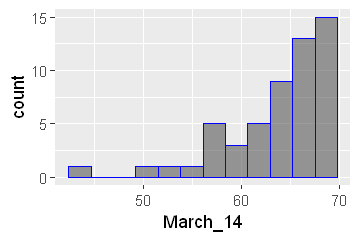

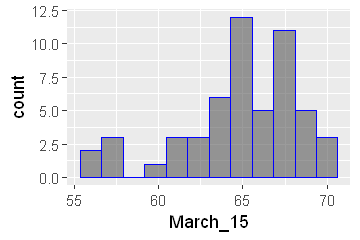

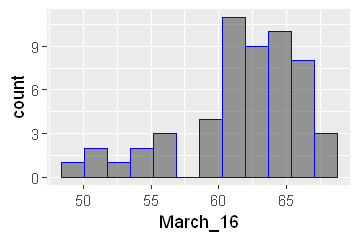

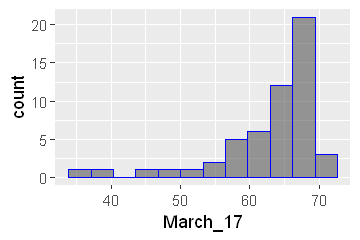

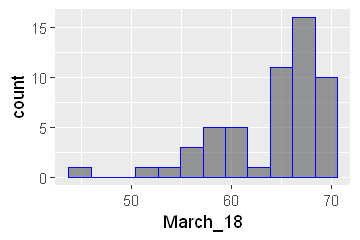

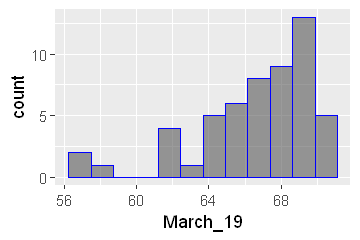

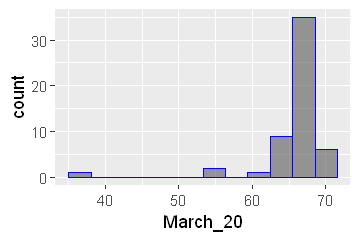

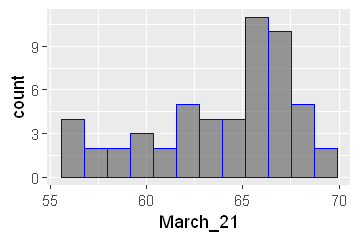

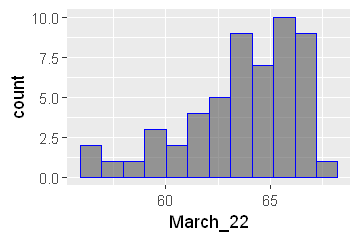

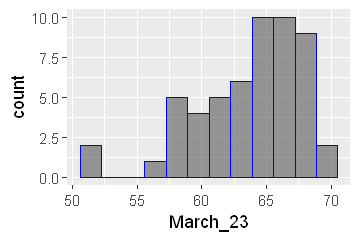

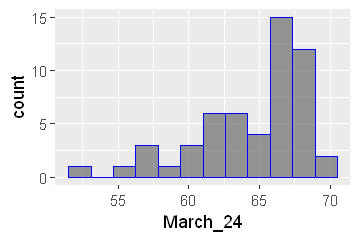

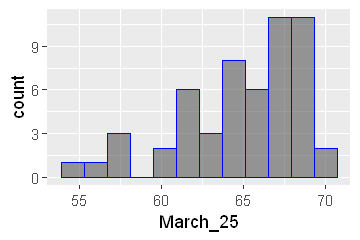

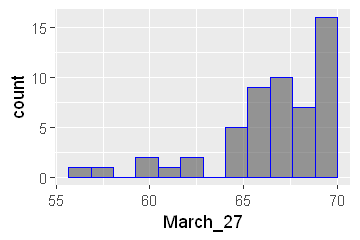

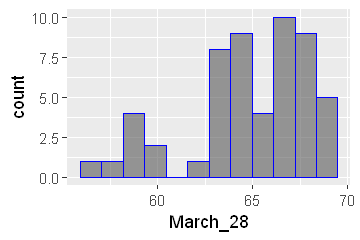

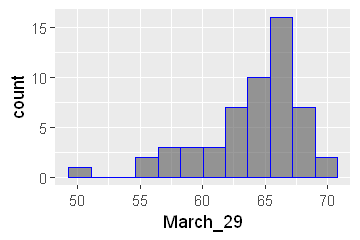

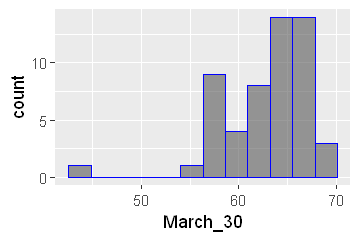

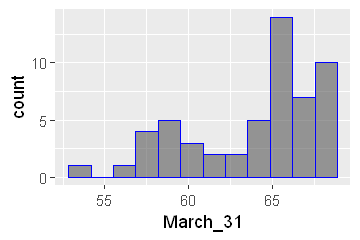

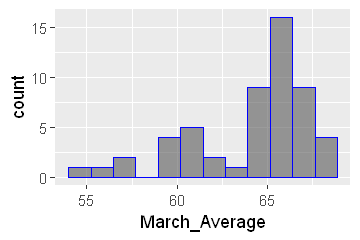

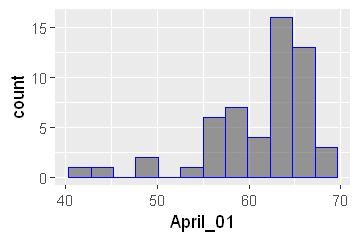

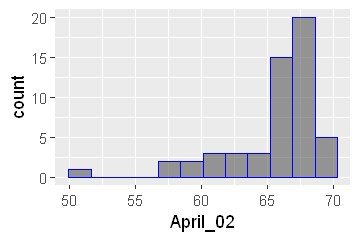

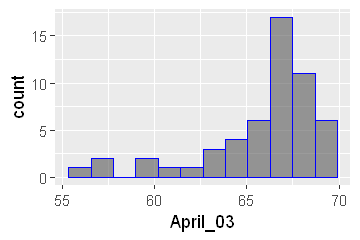

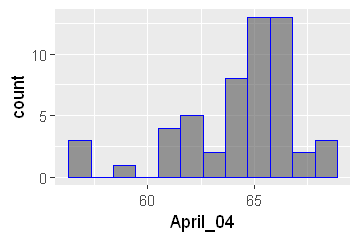

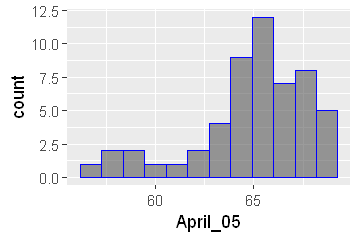

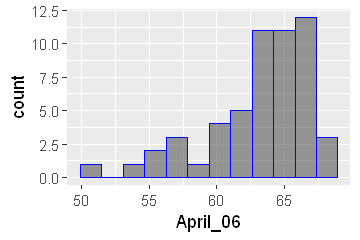

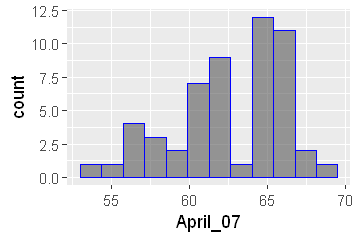

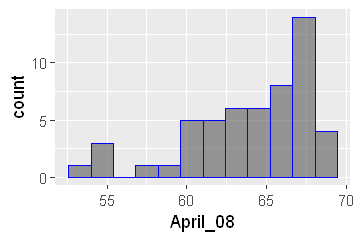

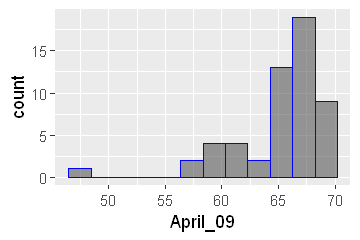

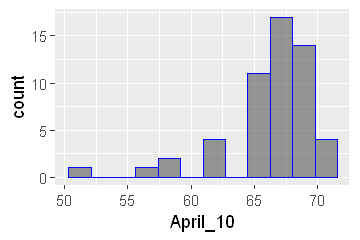

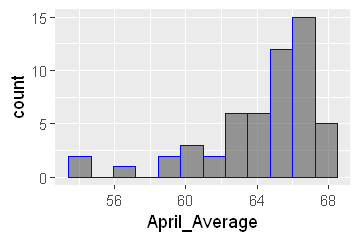

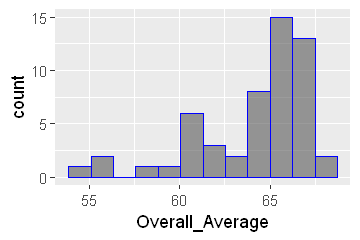

In [800]:
num_cols = names

plot_hist = function(df, num_cols, bins = 10){
    options(repr.plot.width=3, repr.plot.height=2) # Set the initial plot area dimensions
    for(col in num_cols){
        if(is.numeric(df[,col])){
            bw = (max(df[,col]) - min(df[,col]))/(bins + 1)
            p = ggplot(df, aes_string(col)) + 
            geom_histogram(alpha = 0.6, binwidth = bw, color = 'blue')          
            print(p)
        }
    }
}

plot_hist(average_speed_N, num_cols)

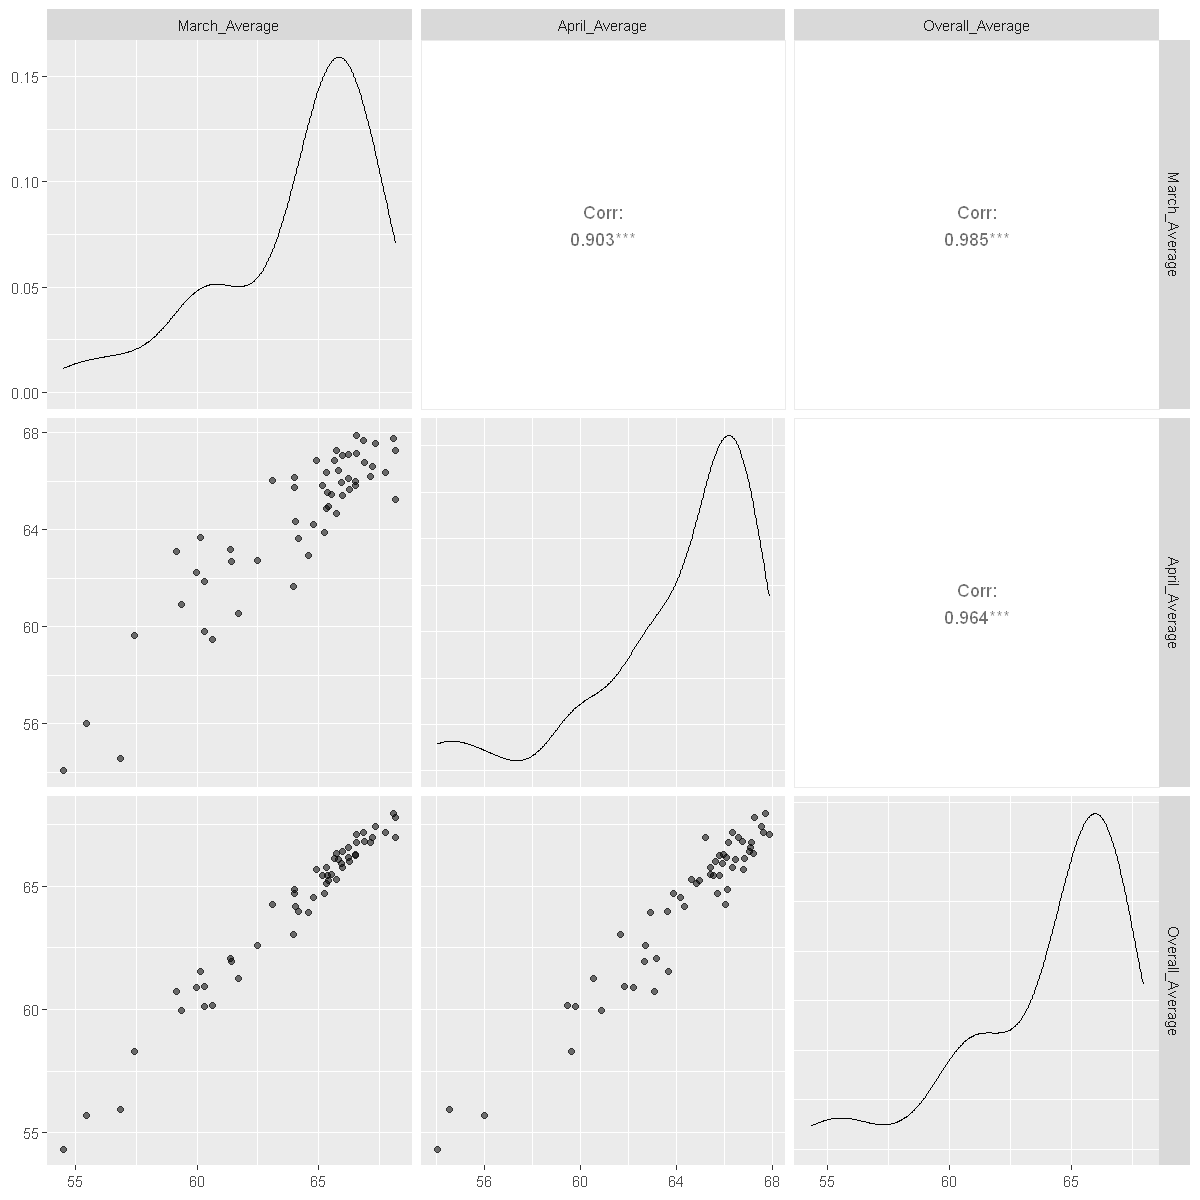

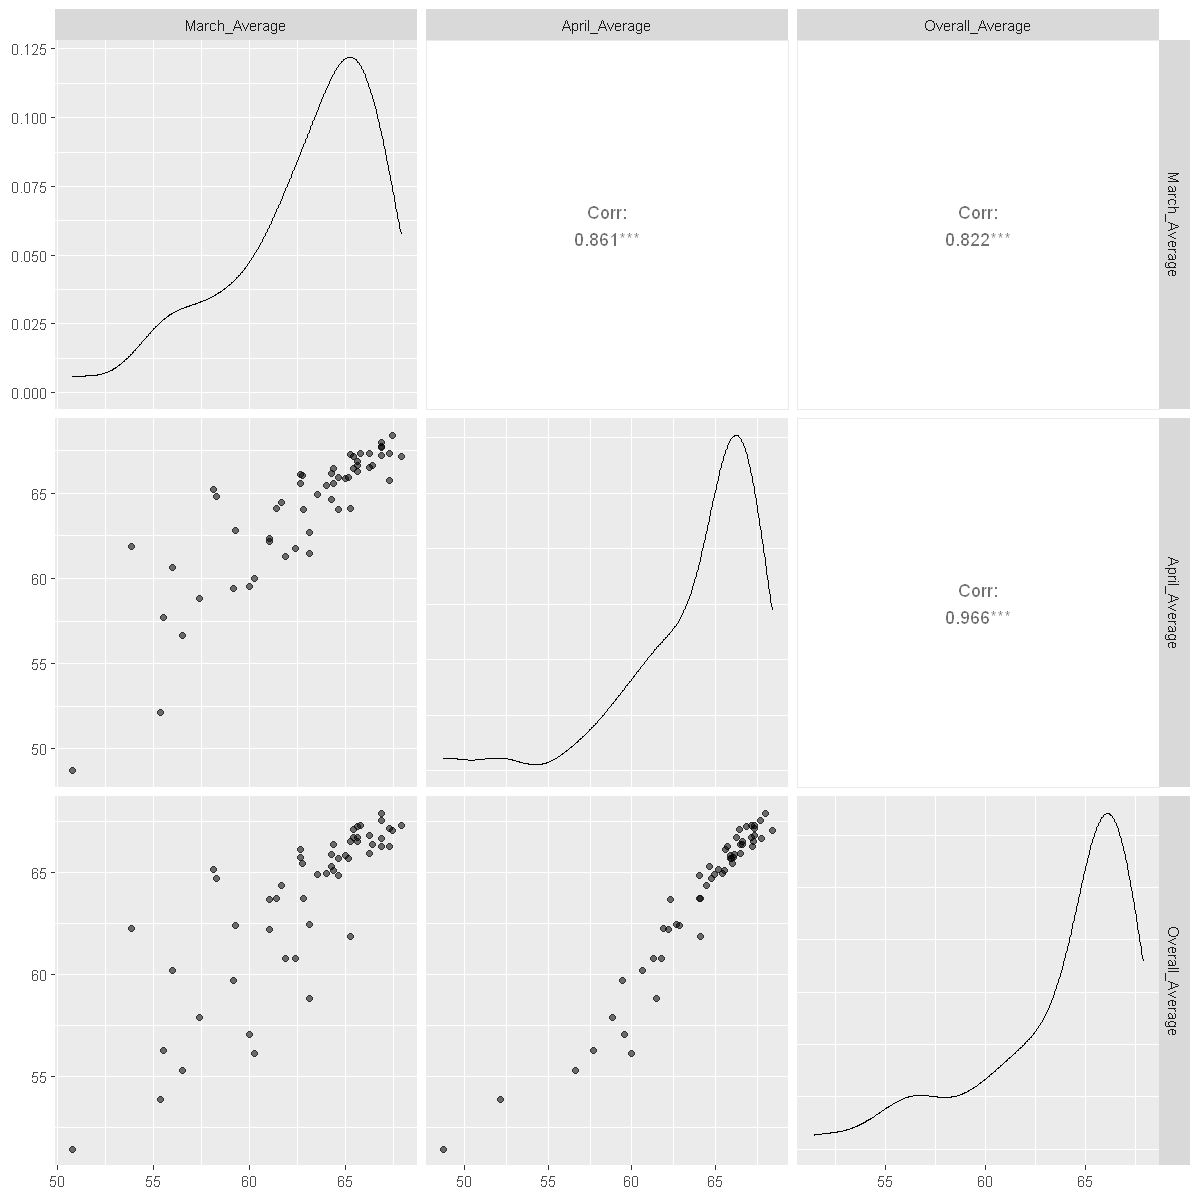

In [801]:
numcols = c( 'March_Average', 'April_Average', 'Overall_Average')

options(repr.plot.width=10, repr.plot.height=10)
ggpairs(average_speed_N, columns = numcols, aes(alpha = 0.1), lower=list(combo=wrap("facethist",  
binwidth=0.5)))

ggpairs(average_speed_S, columns = numcols, aes(alpha = 0.1), lower=list(combo=wrap("facethist",  
binwidth=0.5)))

March_Average, April_Average and Overall_Average are highly positively correlated with each other. This means that, similar speeds were recorded on each road in March and in April. However, note that the correlation between April_Average and March_Average is slightly lower on Southbound lane (0.894) while it is 0.920 on the Northbound lane. 

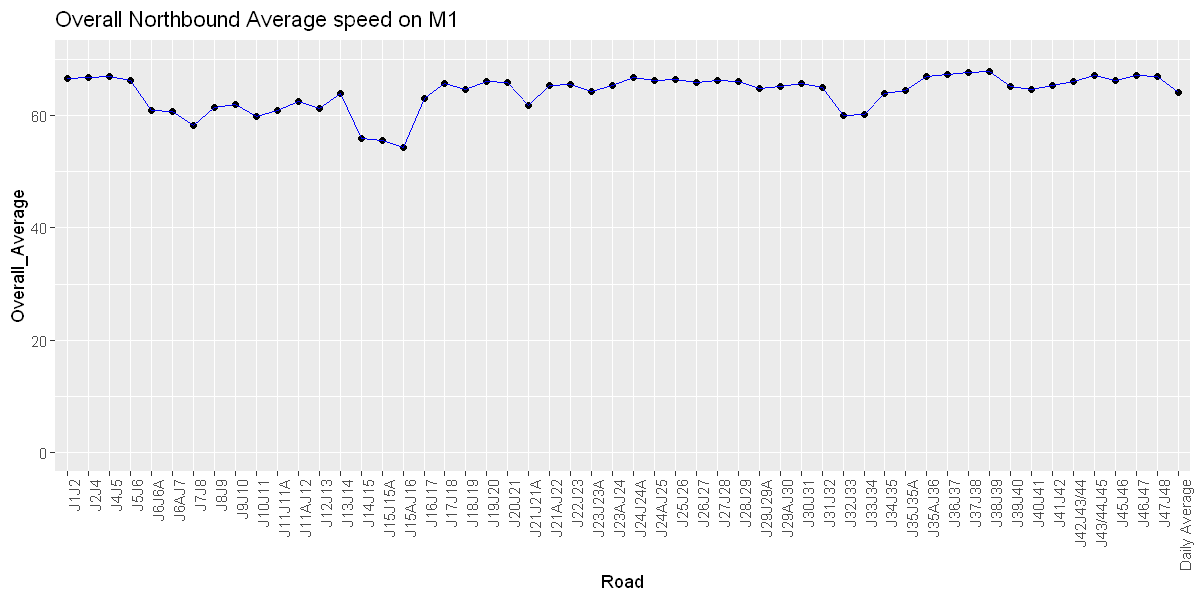

In [802]:
options(repr.plot.width=10, repr.plot.height=5) # set plot dimensions
ggplot(average_speed_N, aes(Road, Overall_Average, group = 1)) +
geom_point() +
geom_line(color = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Overall Northbound Average speed on M1') +
ylim(0, 70)

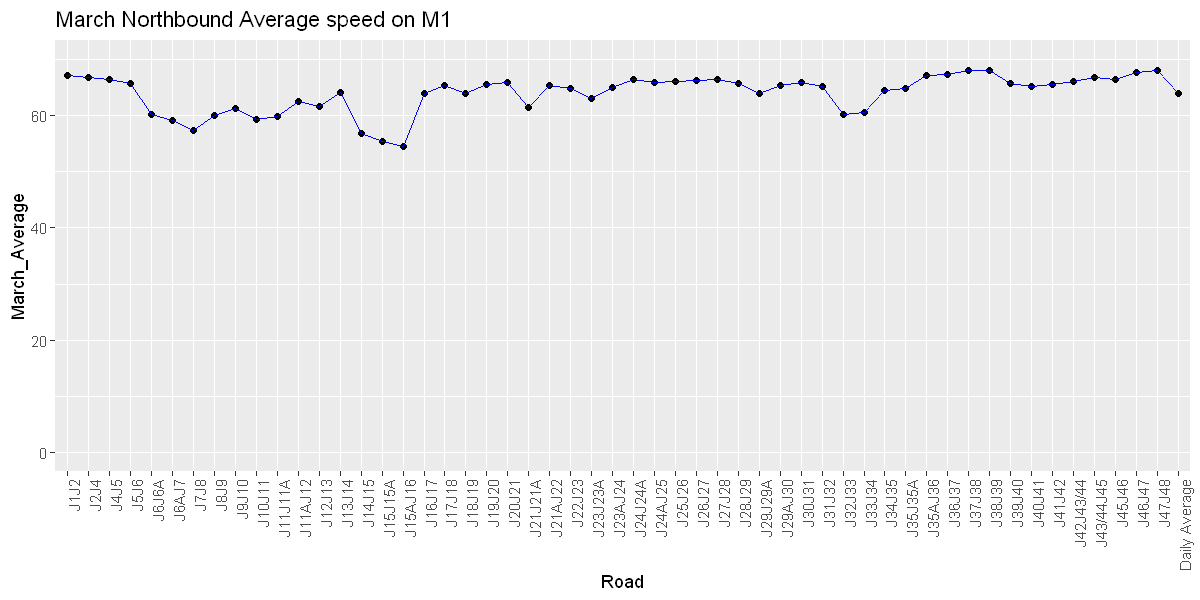

In [803]:
ggplot(average_speed_N, aes(Road, March_Average, group = 1)) +
geom_point() +
geom_line(color = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'March Northbound Average speed on M1') +
ylim(0, 70)

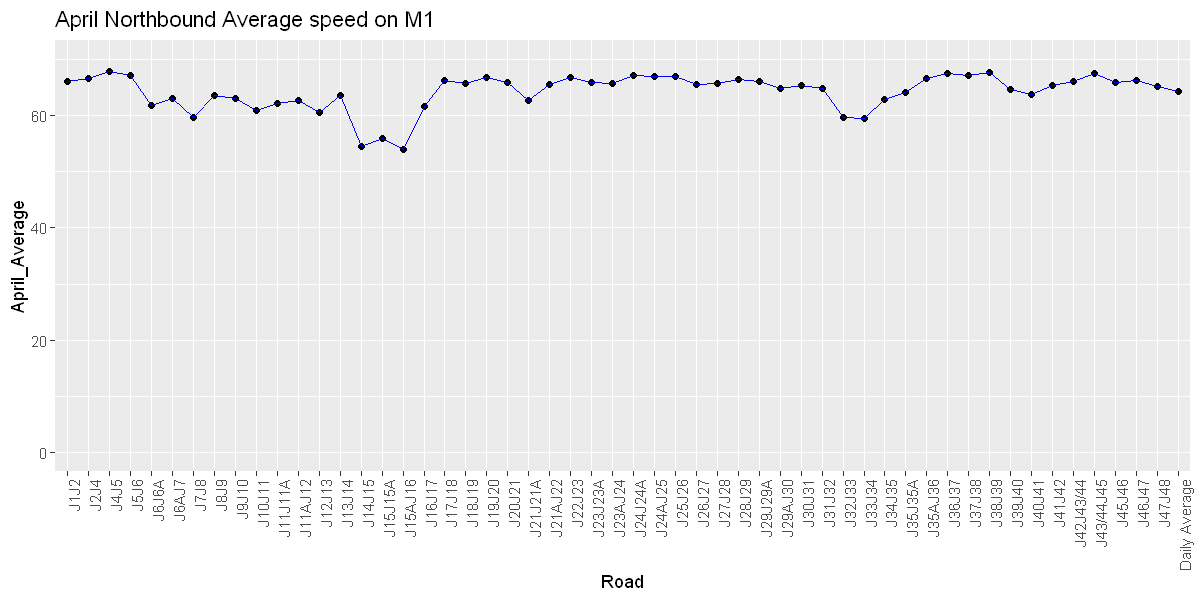

In [804]:
ggplot(average_speed_N, aes(Road, April_Average, group = 1)) +
geom_point() +
geom_line(color = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'April Northbound Average speed on M1') +
ylim(0, 70)

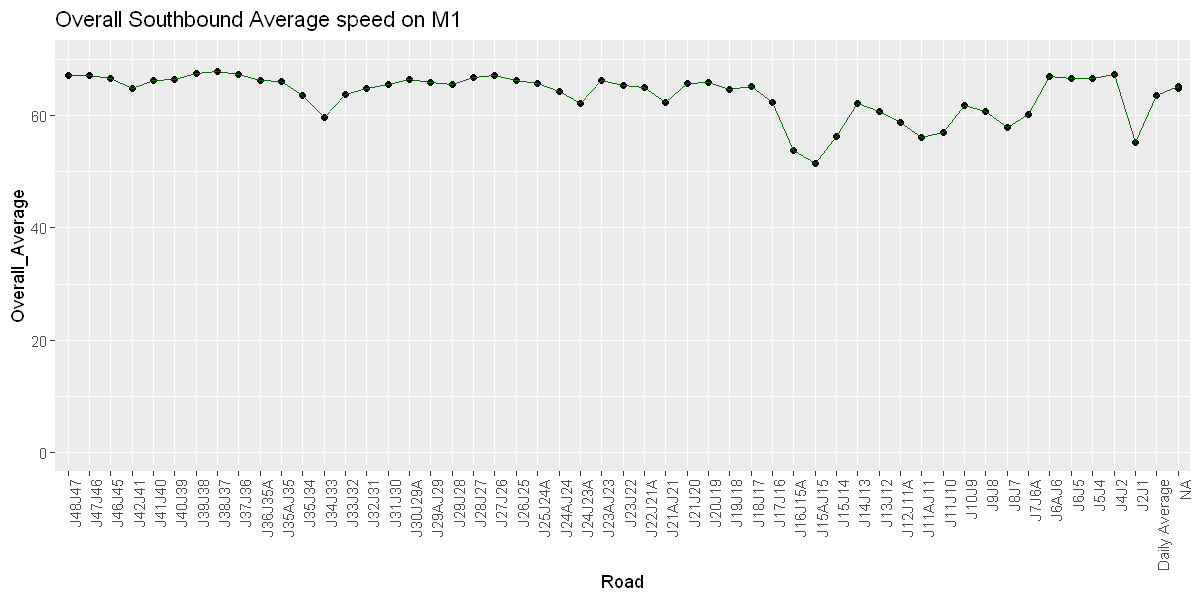

In [805]:
ggplot(average_speed_S, aes(Road, Overall_Average, group = 1)) +
geom_point() +
geom_line(color = 'Dark green') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Overall Southbound Average speed on M1') +
ylim(0, 70)

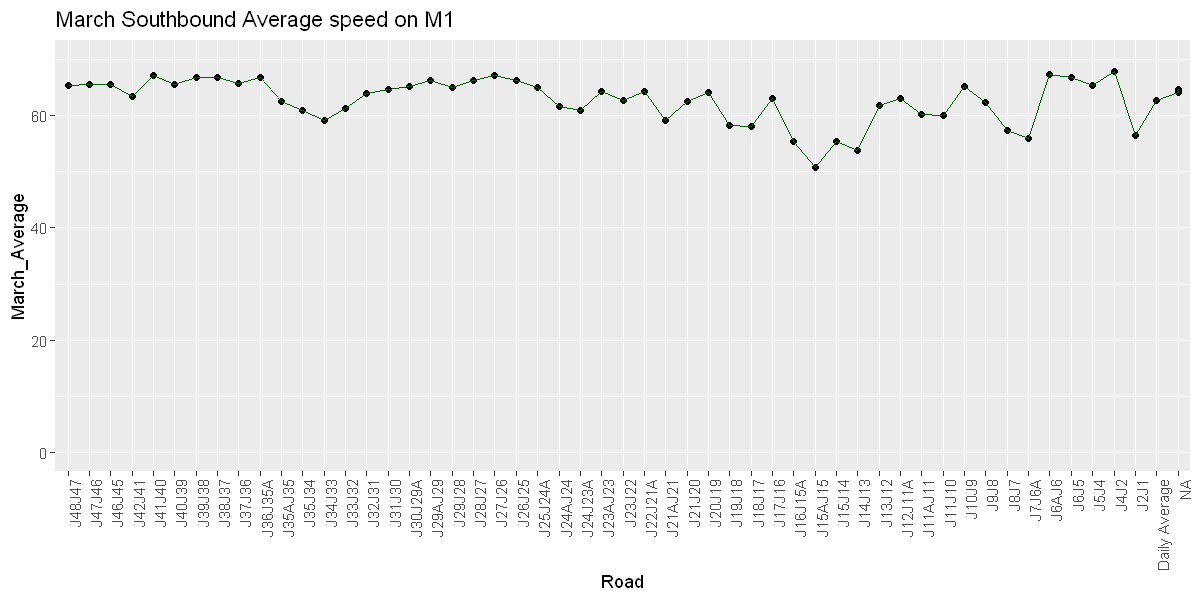

In [806]:
ggplot(average_speed_S, aes(Road, March_Average, group = 1)) +
geom_point() +
geom_line(color = 'Dark green') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'March Southbound Average speed on M1') +
ylim(0, 70)

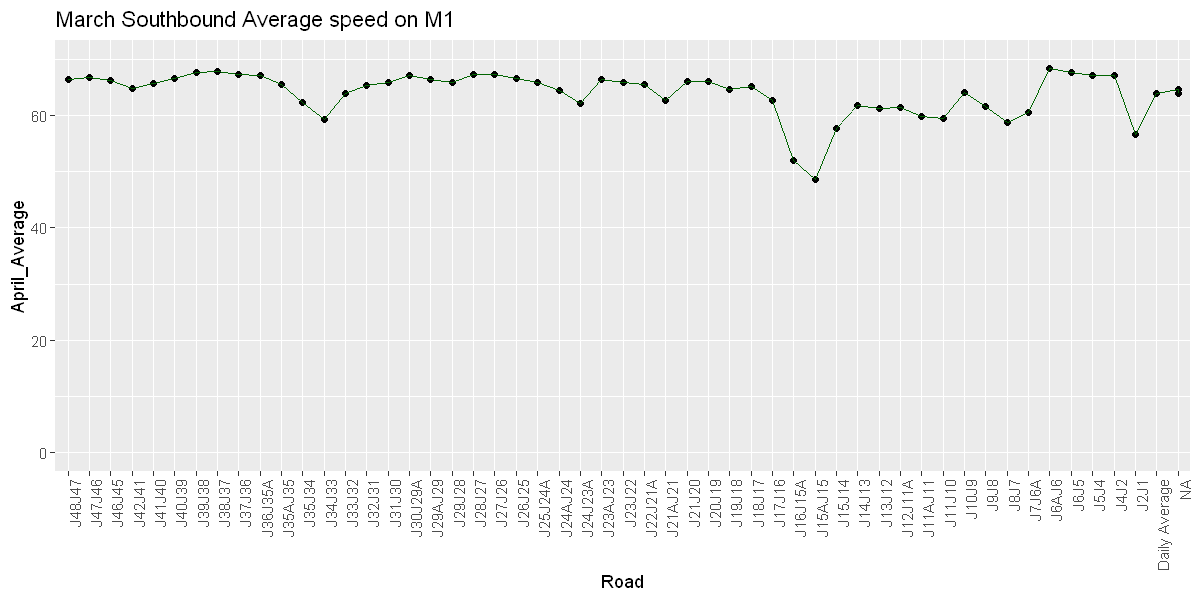

In [807]:
ggplot(average_speed_S, aes(Road, April_Average, group = 1)) +
geom_point() +
geom_line(color = 'Dark green') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'March Southbound Average speed on M1') +
ylim(0, 70)

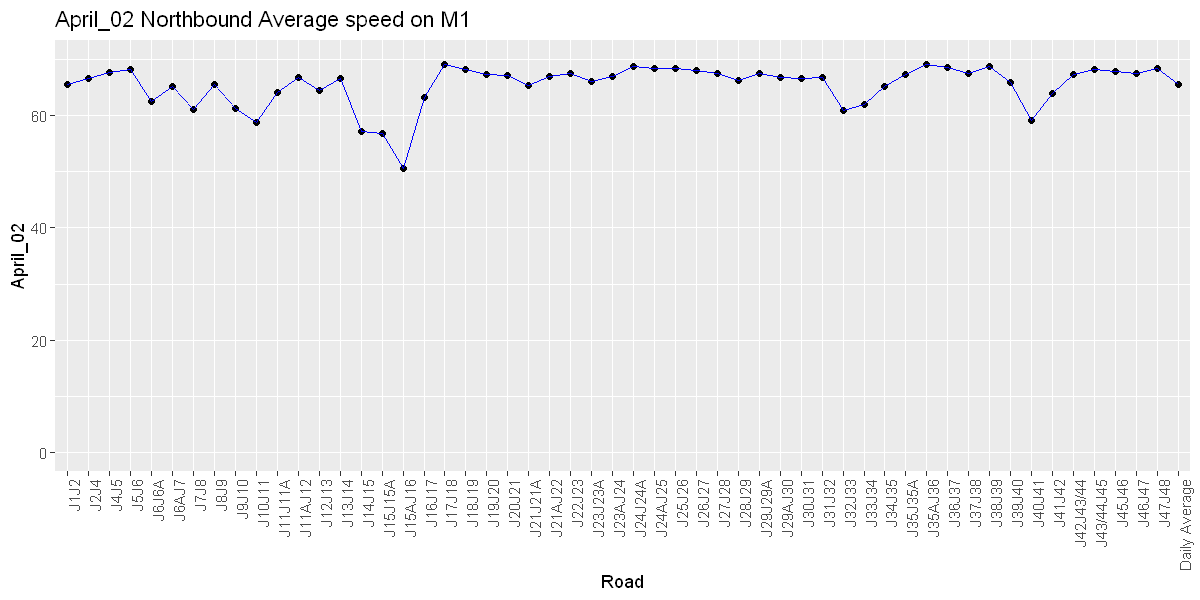

In [808]:
# Looking at Saturdays 02_APRIL
ggplot(average_speed_N, aes(Road, April_02, group = 1)) +
geom_point() +
geom_line(color = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'April_02 Northbound Average speed on M1') +
ylim(0, 70)

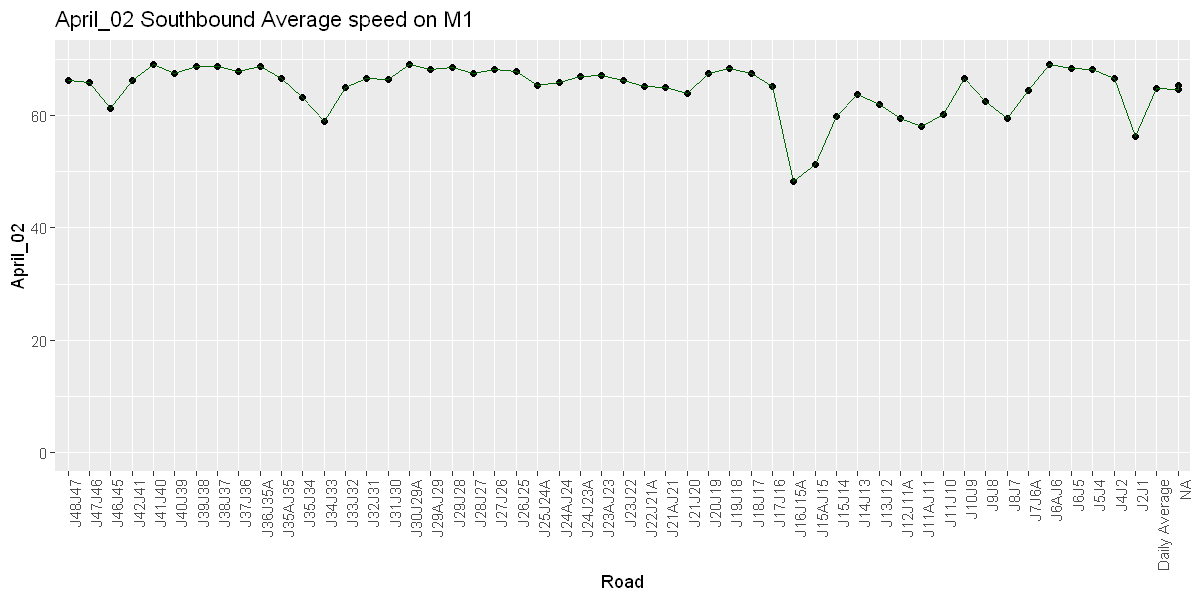

In [809]:
# Looking at Saturdays 02_APRIL
ggplot(average_speed_S, aes(Road, April_02, group = 1)) +
geom_point() +
geom_line(color = 'Dark green') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'April_02 Southbound Average speed on M1') +
ylim(0, 70)

In [810]:
# looking at daily average speeds
# This is saved on the last row of daily_average_N and daily_average_S
daily_average_N <- average_speed_N[average_speed_N$Road == 'Daily Average', ]
daily_average_S <- average_speed_S[average_speed_S$Road == 'Daily Average', ]


In [811]:
daily_average_N
daily_average_S

,Road,March_14,March_15,March_16,March_17,March_18,March_19,March_20,March_21,March_22,...,April_03,April_04,April_05,April_06,April_07,April_08,April_09,April_10,April_Average,Overall_Average
54,Daily Average,63.67296,64.82704,61.66526,62.94811,64.08805,66.53962,65.61792,63.93514,63.69919,...,65.81132,64.27493,64.91981,63.0813,62.60976,63.91328,65.18203,66.33962,64.33434,64.17587


,Road,March_14,March_15,March_16,March_17,March_18,March_19,March_20,March_21,March_22,...,April_03,April_04,April_05,April_06,April_07,April_08,April_09,April_10,April_Average,Overall_Average
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
54,Daily Average,63.91824,63.81447,61.38025,64.4033,64.37736,66.12453,64.09906,64.12399,63.48378,...,62.96226,64.25768,62.22222,62.62331,64.2965,65.57346,66.61725,63.95187,64.01916,63.71558


In [812]:
# transpose the data
daily_average_N <- t(daily_average_N)
daily_average_S <- t(daily_average_S)

head(daily_average_N)

,54
Road,Daily Average
March_14,63.67296
March_15,64.82704
March_16,61.66526
March_17,62.94811
March_18,64.08805


In [813]:
# convert this to a dataframe
daily_average_N <- as.data.frame(daily_average_N)
daily_average_S <- as.data.frame(daily_average_S)
str(daily_average_N)

'data.frame':	31 obs. of  1 variable:
 $ 54: Factor w/ 31 levels "61.45714","61.66526",..: 31 8 21 2 5 15 30 26 12 9 ...
  ..- attr(*, "names")= chr  "Road" "March_14" "March_15" "March_16" ...


In [814]:
# attach days as a column. This is presently the rownames
copy_daily_average_N <- daily_average_N
copy_daily_average_N$Day <- row.names(copy_daily_average_N)

copy_daily_average_S <- daily_average_S
copy_daily_average_S$Day <- row.names(copy_daily_average_S)

daily_average_N <- copy_daily_average_N
daily_average_S <- copy_daily_average_N

colnames(daily_average_N) <- c('Daily_Average', 'Date')
colnames(daily_average_S) <- c('Daily_Average', 'Date')

#drop irrelevant rows
daily_average_N <- daily_average_N[-c(1, 19, 30), ]
daily_average_S <- daily_average_S[-c(1, 19, 30), ]

In [815]:
#inspect
daily_average_S

,Daily_Average,Date
March_14,63.67296,March_14
March_15,64.82704,March_15
March_16,61.66526,March_16
March_17,62.94811,March_17
March_18,64.08805,March_18
March_19,66.53962,March_19
March_20,65.61792,March_20
March_21,63.93514,March_21
March_22,63.69919,March_22
March_23,63.57683,March_23


In [816]:
str(daily_average_S)

'data.frame':	28 obs. of  2 variables:
 $ Daily_Average: Factor w/ 31 levels "61.45714","61.66526",..: 8 21 2 5 15 30 26 12 9 7 ...
  ..- attr(*, "names")= chr  "March_14" "March_15" "March_16" "March_17" ...
 $ Date         : chr  "March_14" "March_15" "March_16" "March_17" ...


In [817]:
# convert speeds columns as a numeric
daily_average_N$Daily_Average <- as.numeric(as.character(daily_average_N$Daily_Average))
daily_average_S$Daily_Average <- as.numeric(as.character(daily_average_S$Daily_Average))

# convert Date to an ordered factor
daily_average_N$Date <- factor(daily_average_N$Date, levels = daily_average_N$Date)
daily_average_S$Date <- factor(daily_average_S$Date, levels = daily_average_S$Date)

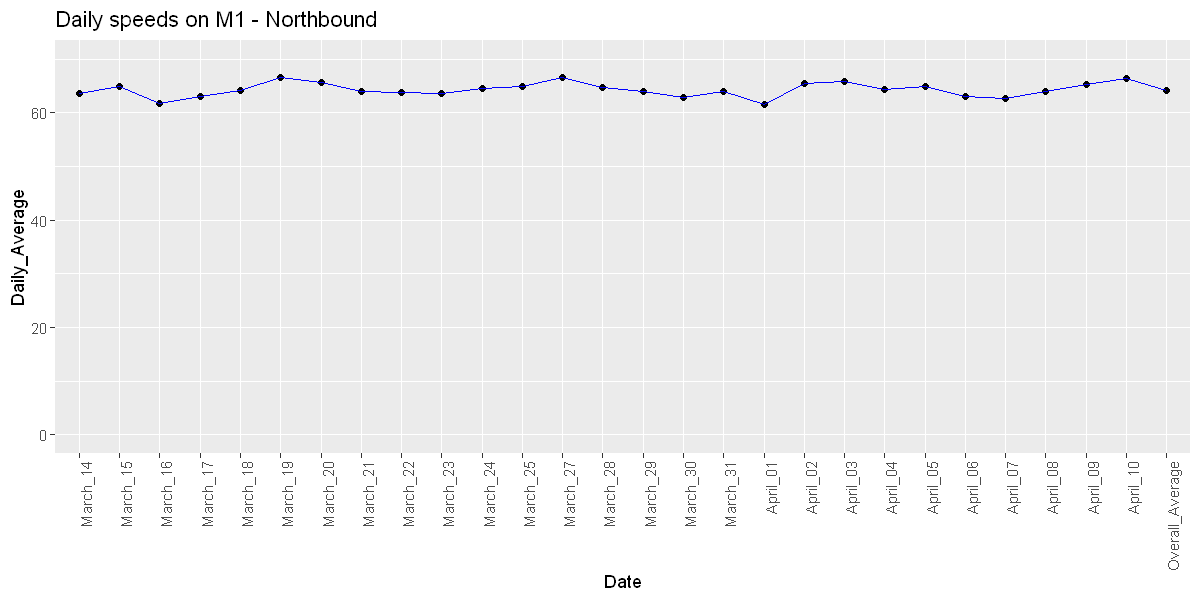

In [820]:
ggplot(daily_average_N, aes(Date, Daily_Average, group = 1)) +
geom_point() +
geom_line(color = 'blue') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Daily speeds on M1 - Northbound') +
ylim(0, 70)

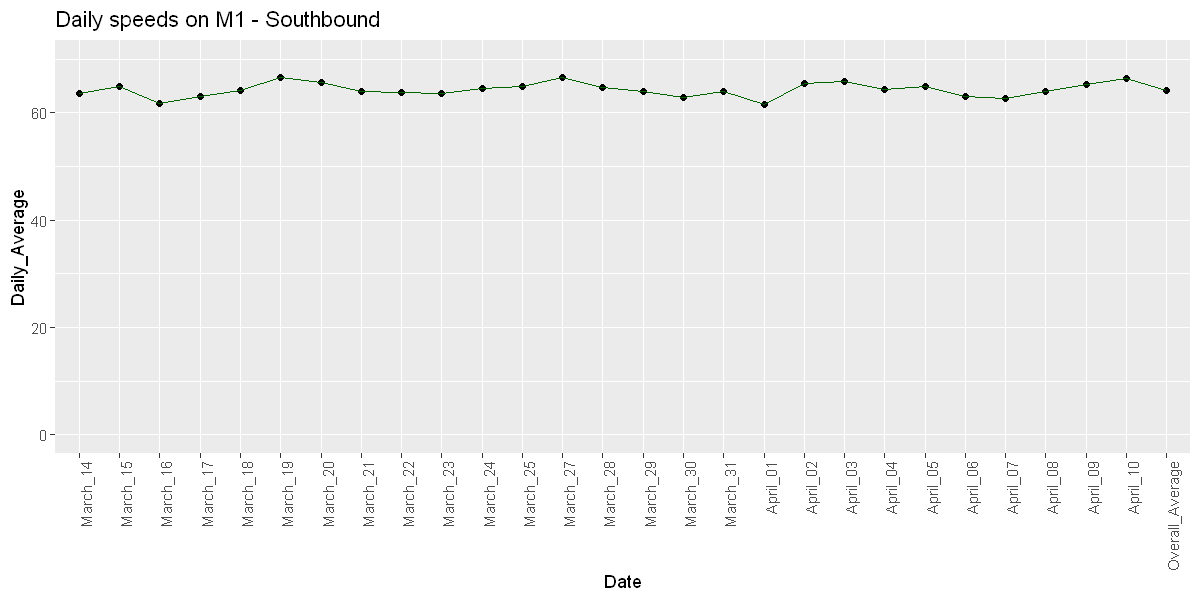

In [821]:
ggplot(daily_average_S, aes(Date, Daily_Average, group = 1)) +
geom_point() +
geom_line(color = 'Dark green') +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title = 'Daily speeds on M1 - Southbound') +
ylim(0, 70)

In [ ]:
Part 2: Inferential Analysis

In [835]:
# 1. Average speed on Weekdays vs Weekend
str(average_speed_N)
str(average_speed_S)

'data.frame':	54 obs. of  31 variables:
 $ Road           : Ord.factor w/ 54 levels "J1J2"<"J2J4"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ March_14       : num  68.8 64.5 65.2 66 68.3 ...
 $ March_15       : num  67.2 67.8 68.8 70 68.2 ...
 $ March_16       : num  65 58.9 55 63.6 54.2 ...
 $ March_17       : num  68 68.6 69.8 55.5 37.2 ...
 $ March_18       : num  69 68.7 67.5 68.8 54.3 ...
 $ March_19       : num  68 68.8 69.2 69.6 69.8 64.4 62 67.4 65.6 62.4 ...
 $ March_20       : num  69 67.2 68.8 67.5 66.2 ...
 $ March_21       : num  67.6 68.9 66.3 67 64.4 ...
 $ March_22       : num  65.4 66.6 67 65.6 66.9 ...
 $ March_23       : num  67.4 65.4 66.2 66.2 61.5 ...
 $ March_24       : num  69 68.4 67.7 66.6 57.4 ...
 $ March_25       : num  68.6 69.8 69.2 64.8 63.8 63.6 57.6 61.8 61 60 ...
 $ March_27       : num  64.8 64.8 65 69.7 65.8 ...
 $ March_28       : num  67.3 69.3 68.6 68.1 64.4 ...
 $ March_29       : num  64.9 67.3 66.1 62.9 61.2 ...
 $ March_30       : num  65.4 66.3 68.6 65.

ON NR

In [836]:
# subset average speeds on weekdays and on weekends
weekends_N <- average_speed_N %>%
select(Road, March_19, March_20, March_27, April_02, April_03, April_09, April_10)
weekdays_N <- average_speed_N %>%
select(-March_19, -March_20, -March_27, -April_02, -April_03, -April_09, -April_10, -March_Average, -April_Average, 
       -Overall_Average)

In [837]:
# convert to tibble
weekends_N <- as.tibble(weekends_N)
weekdays_N <- as.tibble(weekdays_N)

In [838]:
head(weekends_N)
head(weekdays_N)

Road,March_19,March_20,March_27,April_02,April_03,April_09,April_10
J1J2,68.0,69.00,64.83333,65.625,66.625,66.125,67.14286
J2J4,68.8,67.25,64.83333,66.625,66.500,66.250,66.71429
J4J5,69.2,68.75,65.00000,67.750,68.375,67.500,68.14286
J5J6,69.6,67.50,69.66667,68.250,67.125,65.250,69.00000
J6J6A,69.8,66.25,65.83333,62.625,63.125,62.250,64.71429
J6AJ7,64.4,66.00,68.50000,65.250,64.625,65.625,66.85714


Road,March_14,March_15,March_16,March_17,March_18,March_21,March_22,March_23,March_24,...,March_28,March_29,March_30,March_31,April_01,April_04,April_05,April_06,April_07,April_08
J1J2,68.83333,67.16667,65.00000,68.000,69.00000,67.57143,65.42857,67.375,69.00000,...,67.28571,64.85714,65.42857,67.85714,65.750,64.42857,66.875,66.28571,65.85714,67.28571
J2J4,64.50000,67.83333,58.87500,68.625,68.66667,68.85714,66.57143,65.375,68.42857,...,69.28571,67.28571,66.28571,68.28571,67.375,65.28571,66.500,67.28571,66.71429,68.42857
J4J5,65.16667,68.83333,55.00000,69.750,67.50000,66.28571,67.00000,66.250,67.71429,...,68.57143,66.14286,68.57143,68.28571,68.125,67.85714,69.125,67.71429,65.28571,68.71429
J5J6,66.00000,70.00000,63.55556,55.500,68.83333,67.00000,65.57143,66.250,66.57143,...,68.14286,62.85714,65.42857,65.42857,65.625,68.42857,68.875,66.71429,66.71429,66.57143
J6J6A,68.33333,68.16667,54.22222,37.250,54.33333,64.42857,66.85714,61.500,57.42857,...,64.42857,61.16667,57.00000,57.14286,53.750,62.28571,63.500,62.71429,60.28571,63.85714
J6AJ7,61.83333,62.66667,50.77778,45.375,44.66667,60.85714,62.85714,60.000,60.00000,...,63.28571,62.71429,58.57143,59.42857,56.750,64.71429,65.500,60.57143,58.42857,62.28571


In [839]:
# get daily average speeds
daily_average_weekends_N <- weekends_N[54, ]
daily_average_weekdays_N <- weekdays_N[54, ]

In [840]:
# calculate means: x1 and x2
x_one <- rowMeans(daily_average_weekdays_N[, 2:21])
x_two <- rowMeans(daily_average_weekends_N[, 2:8])

In [841]:
# calculate standard deviation: s1 and s2
s_one <- sd(daily_average_weekdays_N[, 2:21])
s_two <- sd(daily_average_weekends_N[, 2:8])

In [842]:
# assign counts: n1 and n2
n_one <- 20
n_two <- 7

In [843]:
print(x_one)
print(x_two)
print(s_one)
print(s_two)
print(n_one)
print(n_two)

[1] 63.68352
[1] 65.93256
[1] 0.9897633
[1] 0.5315707
[1] 20
[1] 7


In [844]:
# create degree of freedom function
degree_of_freedom <- function(x_one, x_two, s_one, s_two, n_one, n_two){
df <- (((s_one**2)/n_one + (s_two**2)/n_two)**2)/(((s_one**4)/((n_one**2)*(n_one-1))) + ((s_two**4)/((n_two**2)*(n_two-1))))
    return(df)
}

In [845]:
degree_of_freedom(x_one, x_two, s_one, s_two, n_one, n_two)

[1] 20.06553

In [846]:
# create t_test function
t_test <- function(x_one, x_two, s_one, s_two, n_one, n_two){
    t_test <- (x_one - x_two)/(sqrt(((s_one**2)/n_one) + ((s_two**2)/n_two)))
    return(t_test)
    }

In [847]:
t_test(x_one, x_two, s_one, s_two, n_one, n_two)

[1] -7.52409

df = 20 @ alpha = 0.05 gives a test statistic of -1.7247 (left tailed t-test), hence t_test < -1.7247 is the rejection region. 
we reject the null hypothesis.

ON SR

In [848]:
# subset average speeds on weekdays and on weekends
weekends_S <- average_speed_S %>%
select(Road, March_19, March_20, March_27, April_02, April_03, April_09, April_10)
weekdays_S <- average_speed_S %>%
select(-March_19, -March_20, -March_27, -April_02, -April_03, -April_09, -April_10, -March_Average, -April_Average, 
       -Overall_Average)

In [849]:
weekends_S <- as.tibble(weekends_S)
weekdays_S <- as.tibble(weekdays_S)

In [850]:
# get daily average speeds
daily_average_weekends_S <- weekends_S[54, ]
daily_average_weekdays_S <- weekdays_S[54, ]

In [851]:
# calculate means: x1 and x2
x_one <- rowMeans(daily_average_weekdays_S[, 2:21])
x_two <- rowMeans(daily_average_weekends_S[, 2:8])

In [852]:
# calculate standard deviation: s1 and s2
s_one <- sd(daily_average_weekdays_S[, 2:21])
s_two <- sd(daily_average_weekends_S[, 2:8])

In [853]:
# assign counts: n1 and n2
n_one <- 20
n_two <- 7

In [854]:
print(x_one)
print(x_two)
print(s_one)
print(s_two)
print(n_one)
print(n_two)

[1] 63.70669
[1] 65.05529
[1] 1.005846
[1] 1.470836
[1] 20
[1] 7


In [855]:
degree_of_freedom(x_one, x_two, s_one, s_two, n_one, n_two)

[1] 8.056777

In [856]:
t_test(x_one, x_two, s_one, s_two, n_one, n_two)

[1] -2.248806

df = 20 @ alpha = 0.05 gives a test statistic of -1.7247 (left tailed t-test), hence t_test < -1.7247 is the rejection region. 
we reject the null hypothesis.

In [394]:
# 2. Average speed on Saturdays vs Sundays
str(average_speed_N)
str(average_speed_S)

'data.frame':	54 obs. of  31 variables:
 $ Road           : Ord.factor w/ 54 levels "J1J2"<"J2J4"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ March_14       : num  69 69 67.3 67.7 68.7 ...
 $ March_15       : num  65.3 66.3 67.7 70 68.3 ...
 $ March_16       : num  65 58.4 53.8 63.5 54.1 ...
 $ March_17       : num  66.8 68.4 69.8 62.4 50.4 49.4 53.4 51 61.6 59 ...
 $ March_18       : num  68 67.3 68 68.7 54 ...
 $ March_19       : num  67.3 68 69.3 69.7 69.7 ...
 $ March_20       : num  69.3 67.3 68.7 67.3 66 ...
 $ March_21       : num  67.6 68.9 66.3 67 64.4 ...
 $ March_22       : num  65.4 66.6 67 65.6 66.9 ...
 $ March_23       : num  67.3 65.3 66.1 65.7 62 ...
 $ March_24       : num  68.8 68.2 67.3 66 55.8 ...
 $ March_25       : num  68.7 69.7 69.3 65 64 ...
 $ March_27       : num  65.7 66 66 69.3 65.7 ...
 $ March_28       : num  66.2 69 68.4 68.6 64.6 62.6 58.6 62.8 63.2 59.2 ...
 $ March_29       : num  64.3 67.3 66.2 62.3 61 ...
 $ March_30       : num  65.4 66.3 68.6 65.4 57 ...
 $ 

ON NR

In [396]:
# subset average speeds on weekdays and on weekends
saturdays_N <- average_speed_N %>%
select(Road, March_19, April_02, April_09)
sundays_N <- average_speed_N %>%
select(Road, March_20, March_27, April_03, April_10)

In [397]:
head(saturdays_N)
head(sundays_N)

Road,March_19,April_02,April_09
J1J2,67.33333,65.625,66.125
J2J4,68.00000,66.625,66.250
J4J5,69.33333,67.750,67.500
J5J6,69.66667,68.250,65.250
J6J6A,69.66667,62.625,62.250
J6AJ7,64.66667,65.250,65.625


Road,March_20,March_27,April_03,April_10
J1J2,69.33333,65.66667,66.625,67.33333
J2J4,67.33333,66.00000,66.500,66.50000
J4J5,68.66667,66.00000,68.375,68.33333
J5J6,67.33333,69.33333,67.125,69.16667
J6J6A,66.00000,65.66667,63.125,64.66667
J6AJ7,65.33333,67.66667,64.625,66.33333


In [398]:
# get daily average speeds
daily_average_saturdays_N <- saturdays_N[54, ]
daily_average_sundays_N <- sundays_N[54, ]

In [400]:
daily_average_saturdays_N
daily_average_sundays_N

,Road,March_19,April_02,April_09
54,Daily Average,66.38994,65.53428,65.18203


,Road,March_20,March_27,April_03,April_10
54,Daily Average,65.91195,66.16981,65.81132,66.56604


In [ ]:
# calculate means: x1 and x2
x_one <- rowMeans(daily_average_saturdays_N[, 2:4])
x_two <- rowMeans(daily_average_sundays_N[, 2:5])

In [ ]:
# calculate standard deviation: s1 and s2
s_one <- sd(daily_average_saturdays_N[, 2:4])
s_two <- sd(daily_average_sundays_N[, 2:5])

In [ ]:
n_one <- 3
n_two <- 4

In [ ]:
# 3. Daytime vs Nighttime

In [822]:
head(dataset)

Date,Time,Northbound,Speed_N,Roadworks_N,Congestion_N,Incidents_N,Southbound,Speed_S,Roadworks_S,Congestion_S,Incidents_S,DateTime,Day_of_the_week,Part_of_the_week,Holidays_Obs,Timeframe,Speed_bracket_N,Speed_bracket_S,Day_Night
14/03/2022,07:00:00,J1J2,70,0,0,0,J2J1,39,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Moderate,Daytime
14/03/2022,07:00:00,J2J4,70,0,0,0,J4J2,65,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime
14/03/2022,07:00:00,J4J5,68,1,0,0,J5J4,51,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime
14/03/2022,07:00:00,J5J6,70,0,0,0,J6J5,59,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime
14/03/2022,07:00:00,J6J6A,69,0,0,0,J6AJ6,68,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime
14/03/2022,07:00:00,J6AJ7,65,0,0,0,J7J6A,57,0,0,0,2022-03-14 07:00:00,Thursday,Weekday,no,Morning,Fast,Fast,Daytime


ON NR

In [868]:
# subset data for Daytime and nighttime
day_speeds_N <- dataset %>%
subset(Day_Night == 'Daytime') %>%
group_by(Date) %>%
summarise(average_speed_N = mean(Speed_N))

night_speeds_N <- dataset %>%
subset(Day_Night == 'Nighttime') %>%
group_by(Date) %>%
summarise(average_speed_N = mean(Speed_N))

In [869]:
str(day_speeds_N)
night_speeds_N

tibble [27 x 2] (S3: tbl_df/tbl/data.frame)
 $ Date           : chr [1:27] "01/04/2022" "02/04/2022" "03/04/2022" "04/04/2022" ...
 $ average_speed_N: num [1:27] 62.1 65.8 66.9 64.6 65 ...


Date,average_speed_N
01/04/2022,60.86792
02/04/2022,65.16981
03/04/2022,64.76415
04/04/2022,63.83019
05/04/2022,64.85849
06/04/2022,62.64151
07/04/2022,61.48585
08/04/2022,63.51887
09/04/2022,64.07547
10/04/2022,66.13679


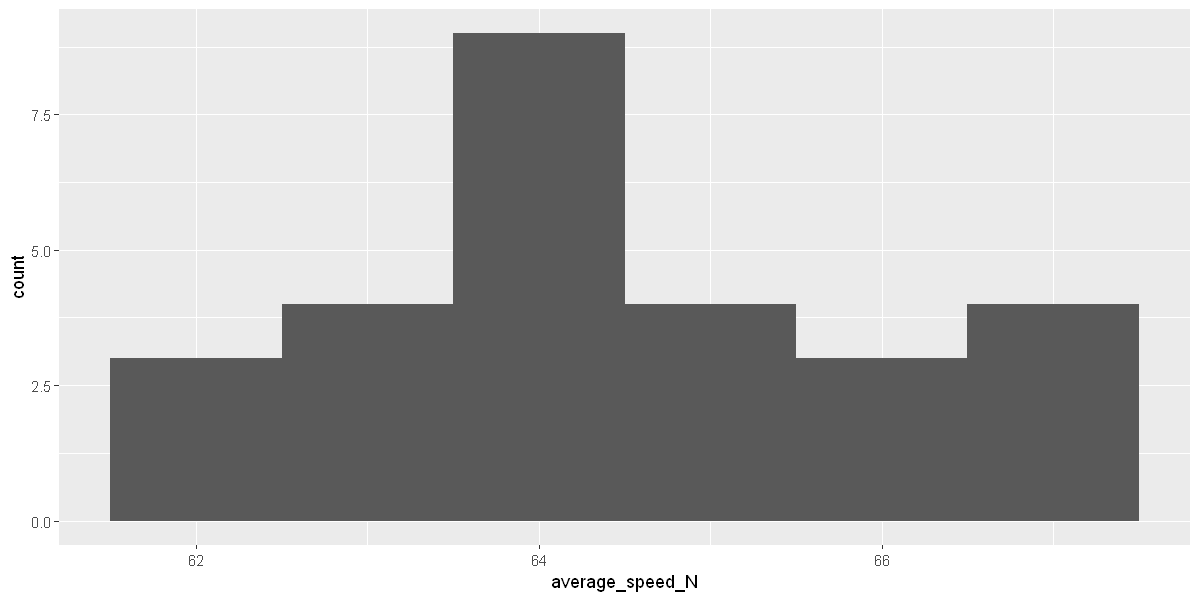

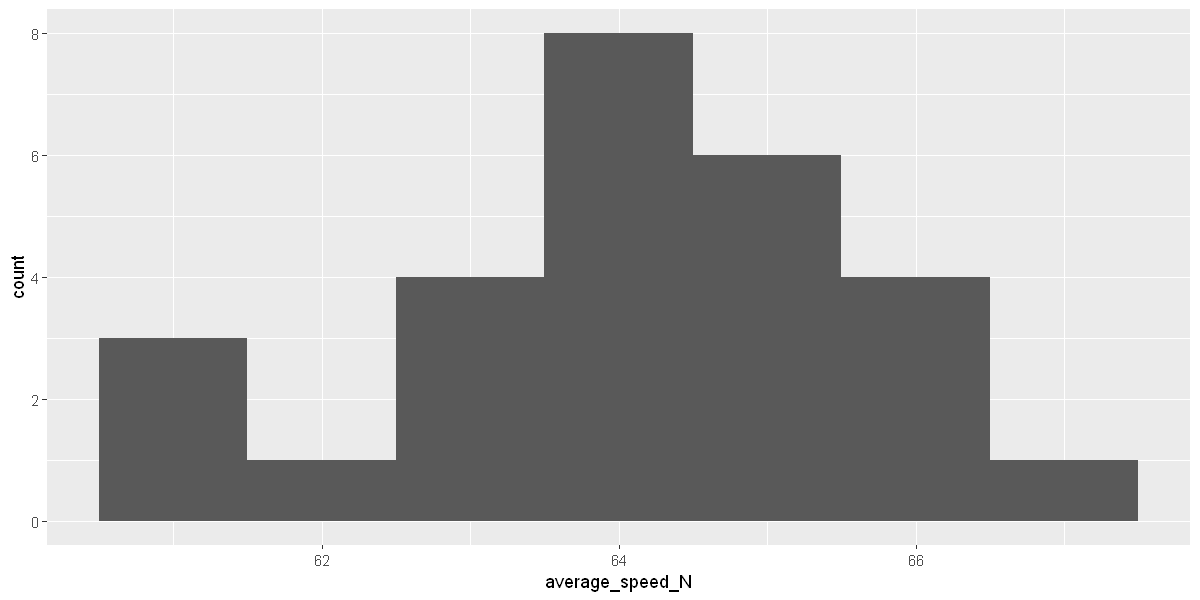

In [870]:
# check normality
ggplot(day_speeds_N, aes(x=average_speed_N)) +
geom_histogram(binwidth = 1)

ggplot(night_speeds_N, aes(x=average_speed_N)) +
geom_histogram(binwidth = 1)

#both distributions are normally distributed

In [865]:
day_speeds_N <- as.tibble(day_speeds_N)
night_speeds_N <- as.tibble(night_speeds_N)

In [872]:
x_one <- mean(day_speeds_N$average_speed_N)
x_two <- mean(night_speeds_N$average_speed_N)

In [873]:
# calculate standard deviation: s1 and s2
s_one <- sd(day_speeds_N$average_speed_N)
s_two <- sd(day_speeds_N$average_speed_N)

In [874]:
n_one <- 27
n_two <- 27

In [875]:
print(x_one)
print(x_two)
print(s_one)
print(s_two)
print(n_one)
print(n_two)

[1] 64.50252
[1] 64.00035
[1] 1.430328
[1] 1.430328
[1] 27
[1] 27


In [876]:
degree_of_freedom(x_one, x_two, s_one, s_two, n_one, n_two)

[1] 52

In [877]:
t_test(x_one, x_two, s_one, s_two, n_one, n_two)

[1] 1.289967

In [ ]:
Recommendations